In [1]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.ticker as ticker
from collections import OrderedDict
from scipy import stats
from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import pylab as plot
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)



# Here are my rc parameters for matplotlibf
fsize = 20
mpl.rc('font', serif='Helvetica Neue')
#mpl.rc('font', serif='Times New Roman')
mpl.rcParams.update({'font.size': fsize})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5
# Set x tick params
mpl.rcParams['xtick.major.size'] = 4.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 3.
mpl.rcParams['xtick.minor.width'] = 1.25
# Set y tick params
mpl.rcParams['ytick.major.size'] = 4.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 3.
mpl.rcParams['ytick.minor.width'] = 1.25
mpl.rcParams['legend.fontsize']= 20.
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "Times New Roman"
# Load LaTeX and amsmath
# mpl.rc('text', usetex=True)
# mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [2]:
# Get the current path
if first:
    parent = os.getcwd()
print(parent)
# Grab file names from data folder
dens = os.listdir('../../../../../../../../Volumes/External/txt_files/all_txt_files/Align_press_CoM')

try:
    dens.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
  
# Grab the MCS data
pres = os.listdir('../../../../../../../../Volumes/External/txt_files/all_txt_files/Interpart_press')
try:
    pres.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres2 = os.listdir('../../../../../../../../Volumes/External/txt_files/all_txt_files/BubComp2')
try:
    pres2.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
# Grab the MCS data
pres3 = os.listdir('../../../../../../../../Volumes/External/txt_files/all_txt_files/PhaseComp2')
try:
    pres3.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
# Grab the MCS data
pres4 = os.listdir('../../../../../../../../Volumes/External/txt_files/all_txt_files/radial')
try:
    pres4.remove('.DS_Store')
except:
    print(".DS_Store not in directory")    
    
# Grab the MCS data
pres5 = os.listdir('../../../../../../../../Volumes/External/txt_files/all_txt_files/lat')
try:
    pres5.remove('.DS_Store')
except:
    print(".DS_Store not in directory")    
    

/Users/nicklauersdorf/klotsa/ABPs/post_proc/Jupyter
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory


In [3]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in range(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in range(len(fname)):
        if fname[i] == string[0]:
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in range(len(cpy1)):
        for j in range(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in range(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [4]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in dens:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(dens, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_dens = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/all_txt_files/Align_press_CoM')
for i in dens:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_dens.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_dens[0])

tauB   sizeBin  clust_size  press_align  press_alignA  press_alignB
0       0.0  5.016308       28099  1197.337839           0.0   1197.337839
1       0.1  5.016308       28929  1488.390209           0.0   1488.390209
2       0.2  5.016308       29941  1623.780096           0.0   1623.780096
3       0.3  5.016308       30913  1745.489949           0.0   1745.489949
4       0.4  5.016308       31789  1831.510797           0.0   1831.510797
...     ...       ...         ...          ...           ...           ...
1994  199.4  5.016308       26063  1013.931161           0.0   1013.931161
1995  199.5  5.016308       25887  1021.301795           0.0   1021.301795
1996  199.6  5.016308       26207  1022.161780           0.0   1022.161780
1997  199.7  5.016308       26192  1020.173247           0.0   1020.173247
1998  199.8  5.016308       26407  1027.350844           0.0   1027.350844

[1999 rows x 6 columns]

In [5]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params = pd.DataFrame(columns=headers)
for i in range(0, len(all_dens)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

pe  peA  peB    xA  eps   phi  tauPer_dt
0    0    0  200  50.0  1.0  60.0   0.000001
1    0    0  250  50.0  1.0  60.0   0.000001
2    0    0  350  50.0  1.0  60.0   0.000001
3    0    0  450  50.0  1.0  60.0   0.000001
4    0   50   50  50.0  1.0  60.0   0.000001
..  ..  ...  ...   ...  ...   ...        ...
104  0  450    0  50.0  1.0  60.0   0.000001
105  0  450  100  50.0  1.0  60.0   0.000001
106  0  450  450  50.0  1.0  60.0   0.000001
107  0  450  450  50.0  1.0  60.0   0.000001
108  0  450  200  50.0  1.0  60.0   0.000001

[109 rows x 7 columns]

In [6]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_dens)):
    # Ger rid of NaN in favor of 0
    all_dens[i].fillna(0, inplace=True)

headers=list(all_dens[0])
display(all_dens[0])
print(all_dens[0][headers[1]][0])
print(all_dens[0][headers[2]][0])

tauB   sizeBin  clust_size  press_align  press_alignA  press_alignB
0       0.0  5.016308       28099  1197.337839           0.0   1197.337839
1       0.1  5.016308       28929  1488.390209           0.0   1488.390209
2       0.2  5.016308       29941  1623.780096           0.0   1623.780096
3       0.3  5.016308       30913  1745.489949           0.0   1745.489949
4       0.4  5.016308       31789  1831.510797           0.0   1831.510797
...     ...       ...         ...          ...           ...           ...
1994  199.4  5.016308       26063  1013.931161           0.0   1013.931161
1995  199.5  5.016308       25887  1021.301795           0.0   1021.301795
1996  199.6  5.016308       26207  1022.161780           0.0   1022.161780
1997  199.7  5.016308       26192  1020.173247           0.0   1020.173247
1998  199.8  5.016308       26407  1027.350844           0.0   1027.350844

[1999 rows x 6 columns]

5.016308
28099


In [7]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/all_txt_files/Interpart_press')
for i in pres:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres[-1])

Timestep    gasArea    gasSigXX  gasSigXY  gasSigYX    gasSigYY  \
0          0.0  38128.814    5289.217  -375.981  -375.981    5599.305   
1          0.1  41667.469  104695.712  -117.579  -117.579  105031.060   
2          0.2  41572.207   92813.685   800.308   800.308   88322.844   
3          0.3  40984.125   93489.723  1667.597  1667.597   94564.120   
4          0.4  40347.777   85514.389  -708.469  -708.469   85020.943   
...        ...        ...         ...       ...       ...         ...   
1995     199.5  41549.345  340988.474  6212.995  6212.995  332344.213   
1996     199.6  41587.449  355246.959  5705.634  5705.634  343136.018   
1997     199.7  41678.901  370454.046 -7136.611 -7136.611  372324.027   
1998     199.8  41593.800  377661.168  9330.153  9330.153  386468.124   
1999     199.9  41800.836  373429.176  -948.043  -948.043  371372.707   

        gasTrace   bulkArea     bulkSigXX   bulkSigXY   bulkSigYX  \
0       5068.280  24975.078  5.151596e+07   10609.245   10609.245   
1     104745.808  21518.984  1.513097e+08  411057.557  411057.557   
2      91368.573  21513.903  1.586553e+08 -508281.594 -508281.594   
3      95694.519  22013.074  1.405829e+08  612391.019  612391.019   
4      84559.197  22632.911  1.196954e+08  644602.982  644602.982   
...          ...        ...           ...         ...         ...   
1995  342879.339  21057.917  9.110894e+07  109034.301  109034.301   
1996  354897.123  20971.547  9.147952e+07  322790.568  322790.568   
1997  364252.426  20969.006  8.866868e+07 -721954.063 -721954.063   
1998  391394.799  20885.176  8.749864e+07 -183587.386 -183587.386   
1999  371452.899  20852.152  8.901612e+07 -584779.136 -584779.136   

         bulkSigYY     bulkTrace  Length  NDense  
0     5.150253e+07  5.151986e+07   534.2   43749  
1     1.514106e+08  1.517712e+08   504.9   43850  
2     1.573985e+08  1.575186e+08   534.2   44147  
3     1.404564e+08  1.411320e+08   564.6   44372  
4     1.200699e+08  1.205272e+08   568.0   44474  
...            ...           ...     ...     ...  
1995  9.194906e+07  9.163804e+07   664.9   40701  
1996  8.946631e+07  9.079571e+07   695.4   40531  
1997  8.875391e+07  8.798934e+07   641.3   40392  
1998  8.906587e+07  8.809867e+07   721.3   40362  
1999  8.983652e+07  8.884154e+07   654.8   40259  

[2000 rows x 15 columns]

In [8]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params2 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params2 = params2.append(df, ignore_index = True)
display(params2)

pe  peA  peB    xA  eps   phi  tauPer_dt
0    0    0  200  50.0  1.0  60.0   0.000001
1    0    0  250  50.0  1.0  60.0   0.000001
2    0    0  350  50.0  1.0  60.0   0.000001
3    0    0  450  50.0  1.0  60.0   0.000001
4    0   50  350  50.0  1.0  60.0   0.000001
..  ..  ...  ...   ...  ...   ...        ...
104  0  450   50  50.0  1.0  60.0   0.000001
105  0  450  450  50.0  1.0  60.0   0.000001
106  0  450    0  50.0  1.0  60.0   0.000001
107  0  450  100  50.0  1.0  60.0   0.000001
108  0  450  200  50.0  1.0  60.0   0.000001

[109 rows x 7 columns]

In [9]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres)):
    # Ger rid of NaN in favor of 0
    all_pres[i].fillna(0, inplace=True)

headers=list(all_pres[0])
display(all_pres[0])
print(all_pres[0][headers[1]][0])
print(all_pres[0][headers[2]][0])

Timestep    gasArea     gasSigXX   gasSigXY   gasSigYX     gasSigYY  \
0          0.0  44844.129    92316.065   -456.802   -456.802    88362.645   
1          0.1  45857.714  1397651.897   8745.932   8745.932  1419559.533   
2          0.2  45653.219  1293193.957 -19261.956 -19261.956  1291883.940   
3          0.3  45372.514  1150175.593   8319.723   8319.723  1153303.840   
4          0.4  45098.161  1038939.876   7485.587   7485.587  1037802.598   
...        ...        ...          ...        ...        ...          ...   
1995     199.5  47994.116  1358566.314  -2450.036  -2450.036  1372793.009   
1996     199.6  47281.559  1299652.346  10087.574  10087.574  1298506.750   
1997     199.7  47483.514  1295001.420  -5172.023  -5172.023  1293273.514   
1998     199.8  47188.838  1274935.358  -7899.448  -7899.448  1260914.551   
1999     199.9  47258.696  1265492.313   1414.851   1414.851  1266629.739   

         gasTrace   bulkArea     bulkSigXX   bulkSigXY   bulkSigYX  \
0       89882.553  18450.287  1.162858e+07    1454.371    1454.371   
1     1417351.647  17413.839  2.167519e+07  -24853.220  -24853.220   
2     1273276.992  17519.262  2.712373e+07 -116010.457 -116010.457   
3     1160059.439  17730.108  3.207330e+07 -206595.301 -206595.301   
4     1045856.824  17899.039  3.670095e+07 -386406.385 -386406.385   
...           ...        ...           ...         ...         ...   
1995  1363229.625  14552.178  2.712346e+07 -175486.731 -175486.731   
1996  1309167.122  14477.239  2.709283e+07 -104773.775 -104773.775   
1997  1288965.444  14590.283  2.707175e+07   80544.832   80544.832   
1998  1260025.507  14672.843  2.729809e+07  316871.268  316871.268   
1999  1267475.877  14763.024  2.751659e+07  117186.348  117186.348   

         bulkSigYY     bulkTrace  Length  NDense  
0     1.162806e+07  1.162978e+07   489.1   28099  
1     2.192005e+07  2.177277e+07   500.4   28929  
2     2.735465e+07  2.712318e+07   522.9   29941  
3     3.236815e+07  3.201413e+07   556.7   30913  
4     3.668538e+07  3.630676e+07   590.6   31789  
...            ...           ...     ...     ...  
1995  2.784309e+07  2.730778e+07   725.8   25887  
1996  2.759999e+07  2.724164e+07   991.8   26207  
1997  2.738462e+07  2.730873e+07   844.1   26192  
1998  2.722713e+07  2.757948e+07   953.5   26407  
1999  2.711447e+07  2.743272e+07   884.7   26498  

[2000 rows x 15 columns]

44844.129
92316.065


In [10]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres2:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres2, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/all_txt_files/BubComp2')
for i in pres2:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new[-1])
print(storeVals)

tauB   sizeBin  clust_size  int_id  bub_id     Na     Nb     radius  \
0       0.0  5.016308       42651       1       1   6647  18354  94.161009   
1       0.1  5.016308       42696       1       1   6380  18145  91.591220   
2       0.1  5.016308       42696       1       4    369      0   5.302671   
3       0.1  5.016308       42696       1       5    369      0   4.642710   
4       0.2  5.016308       42807       1       1   5362  18450  97.859355   
...     ...       ...         ...     ...     ...    ...    ...        ...   
2235  199.5  5.016308       31828       1       1  11813   8606  83.746766   
2236  199.6  5.016308       31693       1       1  12023   8621  84.022612   
2237  199.6  5.016308       31693       1       2     35    151   7.163674   
2238  199.7  5.016308       31530       2       2  11595   8327  83.493161   
2239  199.8  5.016308       31470       1       1  11077   7960  83.548476   

      radius_err      sa_ext      sa_int  edge_width  edge_width_err  \
0       1.216715  611.180966  399.659987   32.266163        1.788011   
1       2.384943  594.909385  433.342241   30.377556        3.324280   
2       2.221200   40.523849    0.000000    0.000000        0.000000   
3       1.422925   37.589696    0.000000    0.000000        0.000000   
4      32.741957  607.415514   83.439809   89.119730       33.289572   
...          ...         ...         ...         ...             ...   
2235   15.861620  595.269030  384.665330   30.643629        6.483743   
2236   17.768463  594.599746  370.996107   32.486913        9.187860   
2237    1.207087   48.576151    0.000000    0.000000        0.000000   
2238   16.110552  599.929397  378.423927   30.406892        6.823248   
2239   16.947474  594.054451  389.847351   29.611368        7.615565   

      edge_begin   edge_end  NBin  
0      61.894846  94.161009   753  
1      61.213664  91.591220   701  
2       0.000000   0.000000    11  
3       0.000000   0.000000    11  
4       8.739625  97.859355   703  
...          ...        ...   ...  
2235   53.103138  83.746766   636  
2236   51.535699  84.022612   635  
2237    0.000000   0.000000    16  
2238   53.086269  83.493161   624  
2239   53.937108  83.548476   591  

[2240 rows x 16 columns]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 20

In [11]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params3 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params3 = params3.append(df, ignore_index = True)
display(params3)

pe  peA  peB    xA  eps   phi  tauPer_dt
0    0    0  200  50.0  1.0  60.0   0.000001
1    0    0  250  50.0  1.0  60.0   0.000001
2    0    0  350  50.0  1.0  60.0   0.000001
3    0    0  450  50.0  1.0  60.0   0.000001
4    0   50  350  50.0  1.0  60.0   0.000001
..  ..  ...  ...   ...  ...   ...        ...
104  0  450  450  50.0  1.0  60.0   0.000001
105  0  450  450  50.0  1.0  60.0   0.000001
106  0  450   50  50.0  1.0  60.0   0.000001
107  0  450    0  50.0  1.0  60.0   0.000001
108  0  450  100  50.0  1.0  60.0   0.000001

[109 rows x 7 columns]

In [12]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new)):
    # Ger rid of NaN in favor of 0
    all_pres_new[i].fillna(0, inplace=True)

headers=list(all_pres_new[0])
display(all_pres_new[0])
print(all_pres_new[0][headers[1]][0])
print(all_pres_new[0][headers[2]][0])

tauB   sizeBin  clust_size  int_id  bub_id    Na     Nb     radius  \
0       0.0  5.016308       28099       2       2  9027   5785  86.218605   
1       0.1  5.016308       28929       1       1  7852   5657  84.067983   
2       0.2  5.016308       29941       1       1  7579   7363  88.756423   
3       0.3  5.016308       30913       1       1  7021   8289  88.878930   
4       0.4  5.016308       31789       1       1  6391   8626  86.769166   
...     ...       ...         ...     ...     ...   ...    ...        ...   
3045  199.4  5.016308       26063       2       3    42     66   3.752094   
3046  199.5  5.016308       25887       2       2  2914  11525  75.962884   
3047  199.6  5.016308       26207       1       1  2728  11253  74.939718   
3048  199.7  5.016308       26192       1       1  2734  11217  75.352481   
3049  199.8  5.016308       26407       3       3  3484  11905  77.814927   

      radius_err      sa_ext      sa_int  edge_width  edge_width_err  \
0       2.551449  566.002157  418.600835   23.901379        4.373878   
1       2.676787  596.115110  403.342331   21.517395        2.760762   
2       3.102743  617.403904  399.559683   26.929242        3.239495   
3       5.133081  633.238223  399.668279   27.042091        5.420300   
4       5.375895  634.991305  403.383937   24.482083        5.756743   
...          ...         ...         ...         ...             ...   
3045    1.404111   35.085886    0.000000    0.000000        0.000000   
3046    8.133624  549.784054  372.148288   22.821240       12.627990   
3047    6.961902  524.270605  366.977504   21.727100       11.687968   
3048    7.165606  523.211632  372.679724   21.496875        5.240507   
3049    7.682916  556.982223  365.445778   25.109338        5.008510   

      edge_begin   edge_end  NBin  
0      62.317226  86.218605   567  
1      62.550588  84.067983   524  
2      61.827182  88.756423   638  
3      61.836839  88.878930   641  
4      62.287083  86.769166   575  
...          ...        ...   ...  
3045    0.000000   0.000000    10  
3046   53.290843  75.962884   482  
3047   53.308468  74.939718   457  
3048   53.855606  75.352481   457  
3049   52.705589  77.814927   520  

[3050 rows x 16 columns]

5.016308
28099


In [13]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres3:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres3, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new2 = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/all_txt_files/PhaseComp2')
for i in pres3:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new2.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new2[-1])
print(storeVals)

tauB   sizeBin  clust_size  Na_bulk  Nb_bulk  NBin_bulk  Na_gas  Nb_gas  \
0   0.0  5.016308       45357    17031        0        373       0    4285   

   NBin_gas  Na_int  Nb_int  NBin_int  Na_bub  Nb_bub  NBin_bub  
0      1429    7942   20742       799       0       0         0

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 20

In [14]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params4 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params4 = params4.append(df, ignore_index = True)
display(params4)

pe  peA  peB    xA  eps   phi  tauPer_dt
0    0    0  200  50.0  1.0  60.0   0.000001
1    0    0  250  50.0  1.0  60.0   0.000001
2    0    0  350  50.0  1.0  60.0   0.000001
3    0    0  450  50.0  1.0  60.0   0.000001
4    0   50  350  50.0  1.0  60.0   0.000001
..  ..  ...  ...   ...  ...   ...        ...
104  0  450  350  50.0  1.0  60.0   0.000001
105  0  450  450  50.0  1.0  60.0   0.000001
106  0  450   50  50.0  1.0  60.0   0.000001
107  0  450  450  50.0  1.0  60.0   0.000001
108  0  450  450  50.0  1.0  60.0   0.000001

[109 rows x 7 columns]

In [15]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new2)):
    # Ger rid of NaN in favor of 0
    all_pres_new2[i].fillna(0, inplace=True)

headers=list(all_pres_new2[0])
display(all_pres_new2[0])
print(all_pres_new2[0][headers[1]][0])
print(all_pres_new2[0][headers[2]][0])

tauB   sizeBin  clust_size  Na_bulk  Nb_bulk  NBin_bulk  Na_gas  \
0       0.0  5.016308       28099    15946        0        434       0   
1       0.1  5.016308       28929    17121        0        442       0   
2       0.2  5.016308       29941    17394        0        431       0   
3       0.3  5.016308       30913    17952        0        431       0   
4       0.4  5.016308       31789    18582        0        437       0   
...     ...       ...         ...      ...      ...        ...     ...   
1994  199.4  5.016308       26063    11205     1221        292   10380   
1995  199.5  5.016308       25887    11414     1437        302   10645   
1996  199.6  5.016308       26207    11473     1563        307   10772   
1997  199.7  5.016308       26192    11528     1745        313   10711   
1998  199.8  5.016308       26407    11102     1513        298   10387   

      Nb_gas  NBin_gas  Na_int  Nb_int  NBin_int  Na_bub  Nb_bub  NBin_bub  
0      19242      1600    9027    5785       567       0       0         0  
1      19370      1635    7852    5657       524       0       0         0  
2      17664      1532    7579    7363       638       0       0         0  
3      16738      1529    7021    8289       641       0       0         0  
4      16401      1589    6391    8626       575       0       0         0  
...      ...       ...     ...     ...       ...     ...     ...       ...  
1994   11703      1763    3146   11838       503     242     265        43  
1995   12065      1817    2914   11525       482       0       0         0  
1996   12211      1837    2728   11253       457       0       0         0  
1997   12065      1831    2734   11217       457       0       0         0  
1998   11609      1783    3484   11905       520       0       0         0  

[1999 rows x 15 columns]

5.016308
28099


In [16]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres4:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres4, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new3 = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/all_txt_files/radial')
for i in pres4:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new3.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new3[-1])
print(storeVals)

tauB   sizeBin  clust_size  interface_id  bub_id       r_min  \
0        0.0  5.016308           2             1       0    0.000000   
1        0.0  5.016308           2             1       0    3.045615   
2        0.0  5.016308           2             1       0    6.091230   
3        0.0  5.016308           2             1       0    9.136846   
4        0.0  5.016308           2             1       0   12.182461   
...      ...       ...         ...           ...     ...         ...   
83953  199.8  5.016308          10             1       0  112.687764   
83954  199.8  5.016308          10             1       0  115.733379   
83955  199.8  5.016308          10             1       0  118.778994   
83956  199.8  5.016308          10             1       0  121.824610   
83957  199.8  5.016308          10             1       0  124.870225   

            r_max     align    alignA    alignB  num_dens  num_densA  \
0        3.045615 -0.031793 -0.031793       NaN  1.887395   1.887395   
1        6.091230 -0.018133 -0.018133       NaN  1.647181   1.647181   
2        9.136846  0.009736  0.009736       NaN  1.729540   1.729540   
3       12.182461  0.017634  0.017634       NaN  1.794251   1.794251   
4       15.228076 -0.012462 -0.012462       NaN  1.727252   1.727252   
...           ...       ...       ...       ...       ...        ...   
83953  115.733379 -0.031386 -0.019026 -0.038086  0.167921   0.059024   
83954  118.778994  0.002211 -0.073373  0.041372  0.186734   0.063730   
83955  121.824610 -0.024318  0.015381 -0.043706  0.194604   0.063854   
83956  124.870225  0.007431 -0.024560  0.025777  0.185986   0.067785   
83957  127.915840 -0.033816 -0.068882 -0.010559  0.198042   0.078969   

       num_densB      press     pressA    pressB  
0       0.000000 -27.002508 -27.002508  0.000000  
1       0.000000 -13.440651 -13.440651  0.000000  
2       0.000000   7.577512   7.577512  0.000000  
3       0.000000  14.237899  14.237899  0.000000  
4       0.000000  -9.686508  -9.686508  0.000000  
...          ...        ...        ...       ...  
83953   0.108897  -1.542187  -0.505335 -1.036852  
83954   0.123004  -0.832003  -2.104230  1.272227  
83955   0.130749  -0.986664   0.441965 -1.428629  
83956   0.118200   0.012544  -0.749174  0.761719  
83957   0.119073  -2.762132  -2.447793 -0.314338  

[83958 rows x 16 columns]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 20

In [17]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params5 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new3)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params5 = params5.append(df, ignore_index = True)
display(params5)

pe  peA  peB    xA  eps   phi  tauPer_dt
0    0    0  200  50.0  1.0  60.0   0.000001
1    0    0  250  50.0  1.0  60.0   0.000001
2    0    0  350  50.0  1.0  60.0   0.000001
3    0    0  450  50.0  1.0  60.0   0.000001
4    0   50  350  50.0  1.0  60.0   0.000001
..  ..  ...  ...   ...  ...   ...        ...
104  0  450    0  50.0  1.0  60.0   0.000001
105  0  450  100  50.0  1.0  60.0   0.000001
106  0  450  200  50.0  1.0  60.0   0.000001
107  0  450  450  50.0  1.0  60.0   0.000001
108  0  450  250  50.0  1.0  60.0   0.000001

[109 rows x 7 columns]

In [18]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new3)):
    # Ger rid of NaN in favor of 0
    all_pres_new3[i].fillna(0, inplace=True)

headers=list(all_pres_new3[0])
display(all_pres_new3[0])
print(all_pres_new3[0][headers[1]][0])
print(all_pres_new3[0][headers[2]][0])

tauB   sizeBin  clust_size  interface_id  bub_id       r_min  \
0        0.0  5.016308           4             2       0    0.000000   
1        0.0  5.016308           4             2       0    3.045615   
2        0.0  5.016308           4             2       0    6.091230   
3        0.0  5.016308           4             2       0    9.136846   
4        0.0  5.016308           4             2       0   12.182461   
...      ...       ...         ...           ...     ...         ...   
83953  199.8  5.016308          75             3       0  112.687764   
83954  199.8  5.016308          75             3       0  115.733379   
83955  199.8  5.016308          75             3       0  118.778994   
83956  199.8  5.016308          75             3       0  121.824610   
83957  199.8  5.016308          75             3       0  124.870225   

            r_max     align    alignA    alignB  num_dens  num_densA  \
0        3.045615 -0.187748 -0.187748  0.000000  1.338334   1.338334   
1        6.091230  0.106669  0.106669  0.000000  1.429845   1.429845   
2        9.136846 -0.001591 -0.001591  0.000000  1.475600   1.475600   
3       12.182461 -0.036186 -0.036186  0.000000  1.455990   1.455990   
4       15.228076 -0.016714 -0.016714  0.000000  1.487038   1.487038   
...           ...       ...       ...       ...       ...        ...   
83953  115.733379  0.045804  0.071351  0.020731  0.489579   0.242502   
83954  118.778994  0.012749  0.004306  0.020042  0.505831   0.234420   
83955  121.824610  0.036924  0.034478  0.039021  0.504319   0.232829   
83956  124.870225  0.002864 -0.002821  0.007747  0.518981   0.239790   
83957  127.915840  0.008700 -0.001029  0.017109  0.517225   0.239800   

       num_densB     press  pressA    pressB  
0       0.000000  0.000000     0.0  0.000000  
1       0.000000  0.000000     0.0  0.000000  
2       0.000000  0.000000     0.0  0.000000  
3       0.000000  0.000000     0.0  0.000000  
4       0.000000  0.000000     0.0  0.000000  
...          ...       ...     ...       ...  
83953   0.247077  1.024447     0.0  1.024447  
83954   0.271410  1.087897     0.0  1.087897  
83955   0.271489  2.118783     0.0  2.118783  
83956   0.279190  0.432588     0.0  0.432588  
83957   0.277424  0.949294     0.0  0.949294  

[83958 rows x 16 columns]

5.016308
4


In [19]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres5:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres5, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new4 = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/all_txt_files/lat')
for i in pres5:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new4.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new4[-1])
print(storeVals)

tauB   sizeBin  clust_size  lat_mean_bulk  lat_mean_int  lat_mean_bub  \
0       0.0  5.016308       41910       0.834329      0.894856      0.000000   
1       0.1  5.016308       41876       0.834860      0.898706      0.964350   
2       0.2  5.016308       41723       0.817975      0.904075      0.951934   
3       0.3  5.016308       41713       0.816459      0.903639      0.000000   
4       0.4  5.016308       40685       0.831803      0.924408      0.000000   
...     ...       ...         ...            ...           ...           ...   
1994  199.4  5.016308       24273       0.771995      0.915355      0.000000   
1995  199.5  5.016308       24719       0.770097      0.905624      0.000000   
1996  199.6  5.016308       24345       0.770796      0.906250      1.443937   
1997  199.7  5.016308       24411       0.769530      0.897834      0.000000   
1998  199.8  5.016308       24489       0.769576      0.899668      0.000000   

      lat_mean_all  lat_std_bulk  lat_std_int  lat_std_bub  lat_std_all  
0         0.869718      0.003095     0.217630     0.000000     0.169073  
1         0.875023      0.052327     0.216824     0.153896     0.176359  
2         0.884201      0.064399     0.227463     0.179134     0.204464  
3         0.895442      0.043233     0.249734     0.000000     0.239428  
4         0.917671      0.057149     0.279350     0.000000     0.270509  
...            ...           ...          ...          ...          ...  
1994      0.869422      0.010230     0.218247     0.000000     0.192039  
1995      0.862078      0.010512     0.216303     0.000000     0.189195  
1996      0.865276      0.010656     0.220242     0.313716     0.197027  
1997      0.854589      0.010790     0.215483     0.000000     0.185742  
1998      0.856263      0.010182     0.219850     0.000000     0.189750  

[1999 rows x 11 columns]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 250.0, 250.0, 250.0, 250.0, 250.0,

In [20]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params6 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new4)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params6 = params6.append(df, ignore_index = True)
display(params6)

pe  peA  peB    xA  eps   phi  tauPer_dt
0    0    0  200  50.0  1.0  60.0   0.000001
1    0    0  250  50.0  1.0  60.0   0.000001
2    0    0  350  50.0  1.0  60.0   0.000001
3    0    0  450  50.0  1.0  60.0   0.000001
4    0   50  100  50.0  1.0  60.0   0.000001
..  ..  ...  ...   ...  ...   ...        ...
96   0  450  250  50.0  1.0  60.0   0.000001
97   0  450  350  50.0  1.0  60.0   0.000001
98   0  450  450  50.0  1.0  60.0   0.000001
99   0  450  450  50.0  1.0  60.0   0.000001
100  0  450   50  50.0  1.0  60.0   0.000001

[101 rows x 7 columns]

In [21]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new4)):
    # Ger rid of NaN in favor of 0
    all_pres_new4[i].fillna(0, inplace=True)

headers=list(all_pres_new4[0])
display(all_pres_new4[0])
print(all_pres_new4[0][headers[1]][0])
print(all_pres_new4[0][headers[2]][0])

tauB   sizeBin  clust_size  lat_mean_bulk  lat_mean_int  lat_mean_bub  \
0       0.0  5.016308       28099       0.888711      1.033403      0.000000   
1       0.1  5.016308       28929       0.865916      0.978652      0.000000   
2       0.2  5.016308       29941       0.848055      1.010342      0.000000   
3       0.3  5.016308       30913       0.835109      1.004637      0.000000   
4       0.4  5.016308       31789       0.826279      0.973256      0.000000   
...     ...       ...         ...            ...           ...           ...   
1994  199.4  5.016308       26063       0.826452      0.949344      1.479685   
1995  199.5  5.016308       25887       0.827092      0.948735      0.000000   
1996  199.6  5.016308       26207       0.827809      0.941057      0.000000   
1997  199.7  5.016308       26192       0.828334      0.943768      0.000000   
1998  199.8  5.016308       26407       0.829162      0.956319      0.000000   

      lat_mean_all  lat_std_bulk  lat_std_int  lat_std_bub  lat_std_all  
0         0.958390      0.004839     0.259691     0.000000     0.194205  
1         0.915637      0.014162     0.330030     0.000000     0.226458  
2         0.923045      0.010822     0.372984     0.000000     0.266258  
3         0.913140      0.007164     0.371285     0.000000     0.265742  
4         0.891970      0.005169     0.337018     0.000000     0.236896  
...            ...           ...          ...          ...          ...  
1994      0.904276      0.008769     0.231942     0.274467     0.200190  
1995      0.891453      0.008870     0.231908     0.000000     0.179385  
1996      0.886414      0.008929     0.221834     0.000000     0.169430  
1997      0.887489      0.009602     0.223031     0.000000     0.169897  
1998      0.899039      0.009417     0.231586     0.000000     0.183071  

[1999 rows x 11 columns]

5.016308
28099


In [22]:
# All data is loaded, now compute analytical aspects
r_cut = (2.**(1./6.))

# Get lattice spacing for particle size
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

# # Lennard-Jones pressure
# def ljPress(r, eps, sigma=1.):
#     phiCP = np.pi / (2. * np.sqrt(3.))
#     div = (sigma/r)
#     dU = (24. * eps / r) * ((2.*(div**12.)) - (div)**6.)
#     # This is just pressure divided by the area of a particle
# #     return (12. * dU / (np.pi * r))
#     return (12. * dU / (np.pi * r * phiCP))

def ljPress(r, pe, eps, sigma=1.):
    phiCP = np.pi / (2. * np.sqrt(3.))
    # This is off by a factor of 1.2...
    ljF = avgCollisionForce(pe)
    return (2. *np.sqrt(3) * ljF / r)
    
def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def fStar(pe, epsilon, sigma=1.):
    out = (avgCollisionForce(pe) * sigma) / (24.*epsilon)
    return out
    
def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out

def nonDimFLJ(r, sigma=1.):
    div = (sigma/r)
    dU = ((2*(div**13)) - (div)**7)
    return dU

def latForFStar(fstar):
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while nonDimFLJ(r) < fstar:
            r -= j
        r += j
    out = r
    return out
    
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

# From area fraction, get lattice spacing
def phiToLat(phiIn):
    '''Read in phi, output the lattice spacing'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return np.sqrt(phiCP / phiIn)
    
def compPhiG(pe, a, kap=4.5, sig=1.):
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    return num / den
    
def clustFrac(phi, phiG, a, sig=1.):
    phiL = latToPhi(a)
    ApL = np.pi * (sig**2) / 4.
    Ap = np.pi * (sig**2) / 4.
    num = (phiL*phiG) - (phiL*phi)
    den = (phi*phiG) - (phi*phiL)
    ans = num / den
    return ans

def radCurve(area):
    # From area of circle get curvature
    return np.sqrt(area/np.pi)

def radCirc(circ):
    return circ / (2. * np.pi)

In [23]:



def compPeNet(xf, pes, pef):
    "Given each species activity (pes and pef) and particle fraction (xf), compute net activity (peNet)"
    peNet = (pes * (1.-xf)) + (pef * xf)
    return peNet
def avgCollisionForce(peNet):
    '''Computed from the integral of possible angles'''
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
    return (magnitude * peNet) / (np.pi)  
def ljForce(r, eps, sigma=1.):
    '''Compute the Lennard-Jones force'''
    div = (sigma/r)
    dU = (24. * eps / r) * ((2*(div**12)) - (div)**6)
    return dU

# Lennard-Jones pressure
def ljPress(r, pe, eps, sigma=1.):
    '''
    Purpose: Take epsilon (magnitude of lennard-jones force), sigma (particle diameter),
    activity (pe), and separation distance (r) of 2 particles to compute pressure from
    avg compressive active forces from neighbors
    
    Inputs: 
        r: Separation distance in simulation units
        epsilon: magnitude of lennard-jones potential
        pe: activity (peclet number)
        sigma: particle diameter (default=1.0)
    
    Output: Analytical virial pressure (see monodisperse paper for derivation)
    '''
    #Area fraction at HCP
    phiCP = np.pi / (2. * np.sqrt(3.))
    
    # LJ force
    ljF = avgCollisionForce(pe)
    
    return (2. *np.sqrt(3) * ljF / r)

def getLat(peNet, eps):
    '''Get the lattice spacing for any pe'''
    if peNet == 0:
        return 2.**(1./6.)
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(peNet):
            r -= j
        r += j
    return r  
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

#Calculate gas phase area fraction
def compPhiG(pe, a, kap=4.5, sig=1.):
    '''
    Purpose: Compute analytical area fraction of the gas phase at steady state
    given activity and lattice spacing
    
    Inputs: 
        pe: net activity (peclet number)
        a: lattice spacing 
        kap: fitting parameter (default=4.5, shown by Redner)
        sig: particle diameter (default=1.0)
    
    Output: Area fraction of the gas phase at steady state
    '''
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    if den>0:
        return num / den
    else:
        return 0
# Calculate dense phase area fraction from lattice spacing
def latToPhi(latIn):
    '''
    Purpose: Compute analytical area fraction of the dense phase given the lattice
    spacing.
    
    Inputs: 
        latIn: lattice spacing
    
    Output: dense phase area fraction
    '''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)
def areaType(Nx, latx):
    Ax = Nx * np.pi * 0.25 * (latx**2)
    return Ax

In [67]:
align_peA=np.array([])
align_peB=np.array([])
align_peNet=np.array([])
first_align_peNet=np.array([])
first_interpart_peNet=np.array([])
first_interpart_peA=np.array([])
first_interpart_peB=np.array([])

align_xA=np.array([])
align_eps=np.array([])
align_pnum=np.array([])
align_phi=np.array([])
align_press_arr = np.array([])
first_align_press = np.array([])
first_bulk_press = np.array([])
first_align_peA=np.array([])
first_align_peB=np.array([])

width_peA=np.array([])
width_peB=np.array([])
width_peNet=np.array([])
width_xA=np.array([])
width_eps=np.array([])
width_pnum=np.array([])
width_phi=np.array([])

interpart_peA=np.array([])
interpart_peB=np.array([])
interpart_peNet=np.array([])
interpart_xA=np.array([])
interpart_eps=np.array([])
interpart_pnum=np.array([])
interpart_phi=np.array([])
interpart_press=np.array([])
interpart_press_expand=np.array([])
avg_shear=np.array([])
fastCol = '#e31a1c'
slowCol = '#081d58'

avg_rad = np.array([])
avg_width = np.array([])
avg_clust = np.array([])
avg_circularity = np.array([])

bulk_lat_time_mean = np.array([])
int_lat_time_mean = np.array([])
all_lat_time_mean = np.array([])
bulk_lat_time_std = np.array([])
int_lat_time_std = np.array([])
all_lat_time_std = np.array([])


avg_bulk_nA = np.array([])
avg_bulk_nB = np.array([])
avg_bulk_n = np.array([])
avg_dense_nA = np.array([])
avg_dense_nB = np.array([])
avg_dense_n = np.array([])
avg_int_n = np.array([])
avg_int_nA = np.array([])
avg_int_nB = np.array([])
avg_gas_nA = np.array([])
avg_gas_nB = np.array([])
avg_gas_n = np.array([])

align_type = np.array([])
interpart_type = np.array([])

width_type = np.array([])

avg_int_theory_arr = np.array([])
avg_bulk_theory_arr = np.array([])
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.92#3.0#1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out
def densProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    gas_dense_dif_phi = 0.866 * np.log10(activity_net - 46.993) - 0.443
    rate_decay = -6.151 * np.log10(activity_net-49.921) - 4.392
    mid_point = 0.044 * np.log10(activity_slow-49.893) + 0.836
    gas_phi = -0.26 * np.log10(activity_slow-41.742)+0.783
    
    num_dens_r = ((gas_dense_dif_phi / (1+np.exp(-rate_decay * (r-mid_point)))) + gas_phi)
    
    return num_dens_r

def alignProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    max_align = 0.2019 * np.log10(activity_net - 41.2803) - 0.1885
    mid_point = 0.0492 * np.log10(activity_slow - 47.0061) + 0.8220
    std_dev = 0.1057
    align_r = max_align * np.exp(-(r-mid_point)**2/(2*std_dev**2))
    
    return align_r

for i in range(0, len(all_dens)):
    if (dens[i][0:4]!='half'):
        if (params['peA'][i]>=50) & (params['peB'][i]>=50):
            if all_dens[i].empty:
                continue

            for k in range(0, len(all_pres)):
                if all_pres[k].empty:
                    continue
                if params2['peA'][k]==params['peA'][i]:
                    if params2['peB'][k]==params['peB'][i]:

                        if pres[k][0:4]==dens[i][0:4]:

                            for q in range(0, len(all_pres_new2)):

                                if all_pres_new2[q].empty:
                                    continue
                                if pres3[q][0:4]==dens[i][0:4]:
                                    if params4['peA'][q]==params['peA'][i]:
                                        if params4['peB'][q]==params['peB'][i]:
                                            for s in range(0, len(all_pres_new3)):

                                                if all_pres_new3[s].empty:
                                                    continue
                                                if params5['peA'][s]==params['peA'][i]:
                                                    if params5['peB'][s]==params['peB'][i]:
                                                        if pres4[s][0:4]==dens[i][0:4]:
                                                            for t in range(0, len(all_pres_new)):
                                                                if all_pres_new[t].empty:
                                                                        continue
                                                                if pres2[t][0:4]==dens[i][0:4]:
                                                                    if params3['peA'][t]==params['peA'][i]:
                                                                        if params3['peB'][t]==params['peB'][i]:
                                                                            for u in range(0, len(all_pres_new4)):
                                                                                if all_pres_new4[u].empty:
                                                                                    continue
                                                                                if params6['peA'][u]==params['peA'][i]:
                                                                                    if params6['peB'][u]==params['peB'][i]:
                                                                                        if pres5[u][0:4]==dens[i][0:4]:
                                                                                            print(pres5[u][0:4])
                                                                                            print(params['peA'][i])
                                                                                            print(params['peB'][i])
                                                                                            time_i = all_dens[i]['tauB']
                                                                                            time_k = all_pres[k]['Timestep']
                                                                                            time_q = all_pres_new2[q]['tauB']
                                                                                            time_s = all_pres_new3[s]['tauB']
                                                                                            time_t = all_pres_new[t]['tauB']
                                                                                            time_u = all_pres_new4[u]['tauB']

                                                                                            #Instantiate arrays for reading in interface pressure .txt file
                                                                                            final_time_i =np.array([])
                                                                                            final_align_press = np.array([])
                                                                                            align_press_total = 0
                                                                                            align_press_vals=0

                                                                                            #Instantiate arrays for reading in bulk pressure .txt file
                                                                                            bulk_time =np.array([])
                                                                                            bulk_press_time = np.array([])
                                                                                            bulk_press_total = 0
                                                                                            bulk_press_total_expand = 0
                                                                                            bulk_press_vals=0
                                                                                            shear_press_expand=0

                                                                                            #Instantiate arrays for reading in number density .txt file
                                                                                            bulk_nA_arr = np.array([])
                                                                                            bulk_nB_arr = np.array([])
                                                                                            bulk_n_arr = np.array([])
                                                                                            int_n_arr = np.array([])
                                                                                            int_nA_arr = np.array([])
                                                                                            int_nB_arr = np.array([])
                                                                                            gas_nA_arr = np.array([])
                                                                                            gas_n_arr = np.array([])
                                                                                            gas_nB_arr = np.array([])
                                                                                            dense_nA_arr = np.array([])
                                                                                            dense_nB_arr = np.array([])
                                                                                            dense_n_arr = np.array([])

                                                                                            #Instantiate arrays for reading in lattice spacing .txt file
                                                                                            bulk_lat_mean = np.array([])
                                                                                            int_lat_mean = np.array([])
                                                                                            all_lat_mean = np.array([])
                                                                                            bulk_lat_std = np.array([])
                                                                                            int_lat_std = np.array([])
                                                                                            all_lat_std = np.array([])

                                                                                            #Instantiate arrays for reading in radial measurement .txt file
                                                                                            num_dens_arr_temp = np.zeros(50)
                                                                                            align_arr_temp = np.zeros(50)
                                                                                            press_arr_temp = np.zeros(50)
                                                                                            xA_arr_temp = np.zeros(50)
                                                                                            xB_arr_temp = np.zeros(50)
                                                                                            temp_count = np.zeros(50)
                                                                                            temp_count_count = np.zeros(50)

                                                                                            radius_arr_final = np.linspace(0,1.6,num=50)
                                                                                            num_dens_arr_final = np.zeros(50)
                                                                                            align_arr_final = np.zeros(50)
                                                                                            xA_arr_final = np.zeros(50)
                                                                                            xB_arr_final = np.zeros(50)
                                                                                            press_arr_final = np.zeros(50)
                                                                                            final_count = np.zeros(50)
                                                                                            final_count_count = np.zeros(50)

                                                                                            press_theory_time = np.array([])
                                                                                            press_theory_val = np.array([])
                                                                                            time_arr = np.array([])

                                                                                            bub_width_arr = np.array([])
                                                                                            bub_area_arr = np.array([])
                                                                                            bub_surface_area_arr = np.array([])
                                                                                            int_width_arr = np.array([])
                                                                                            clust_arr = np.array([])

                                                                                            time_dens = np.array([])
                                                                                            time_width = np.array([])
                                                                                            #Loop over time in interface pressure .txt file
                                                                                            for j in range(0, len(time_i)):

                                                                                                #Current time in loop
                                                                                                time = time_i[j]

                                                                                                #Read values and set variables from interface pressure .txt file
                                                                                                align_press = all_dens[i]['press_align'][j]

                                                                                                if align_press > 0:
                                                                                                    final_time_i = np.append(final_time_i, all_dens[i]['tauB'].iloc[j])
                                                                                                    final_align_press = np.append(final_align_press, align_press)

                                                                                                    align_press_total += align_press
                                                                                                    align_press_vals += 1

                                                                                                #Read values and set variables from bulk pressure.txt files

                                                                                                time_id_k = np.where(time_k==time)[0]
                                                                                                if len(time_id_k)>0:
                                                                                                    time_id_k=time_id_k[0]

                                                                                                    bulk_trace = (all_pres[k]['bulkSigXX'].iloc[time_id_k]+all_pres[k]['bulkSigYY'].iloc[time_id_k])/2


                                                                                                    bulk_press = bulk_trace / (all_pres[k]['bulkArea'].iloc[time_id_k])

                                                                                                    bulk_trace_expand = (all_pres[k]['bulkSigXX'].iloc[time_id_k]+all_pres[k]['bulkSigXY'].iloc[time_id_k]+all_pres[k]['bulkSigYX'].iloc[time_id_k]+all_pres[k]['bulkSigYY'].iloc[time_id_k])/2
                                                                                                    bulk_press_expand = bulk_trace_expand / (all_pres[k]['bulkArea'].iloc[time_id_k])

                                                                                                    shear_stress = (all_pres[k]['bulkSigXY'].iloc[time_id_k]+all_pres[k]['bulkSigYX'].iloc[time_id_k])/2
                                                                                                    shear_press = shear_stress / (all_pres[k]['bulkArea'].iloc[time_id_k])
                                                                                                    if bulk_press>0:
                                                                                                        bulk_time = np.append(bulk_time, all_pres[k]['Timestep'].iloc[time_id_k])
                                                                                                        bulk_press_time = np.append(bulk_press_time, bulk_press/2)
                                                                                                        shear_press_expand +=shear_press
                                                                                                        bulk_press_total += bulk_press
                                                                                                        bulk_press_total_expand += bulk_press_expand
                                                                                                        bulk_press_vals += 1

                                                                                                #Read values and set variables from number density .txt files
                                                                                                time_id_q = np.where(time_q==time)[0]
                                                                                                if len(time_id_q)>0:
                                                                                                    time_dens = np.append(time_dens, time)
                                                                                                    bin_size = all_pres_new2[q]['sizeBin'][time_id_q]
                                                                                                    bin_area = bin_size**2
                                                                                                    bulk_nA_arr = np.append(bulk_nA_arr, all_pres_new2[q]['Na_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                                                    bulk_nB_arr = np.append(bulk_nB_arr, all_pres_new2[q]['Nb_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                                                    bulk_n_arr = np.append(bulk_n_arr, (all_pres_new2[q]['Nb_bulk'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                                                    int_n_arr = np.append(int_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                                                    int_nA_arr = np.append(int_nA_arr, all_pres_new2[q]['Na_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                                                    int_nB_arr = np.append(int_nB_arr, all_pres_new2[q]['Nb_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                                                    gas_n_arr = np.append(gas_n_arr, (all_pres_new2[q]['Na_gas'][time_id_q] + all_pres_new2[q]['Nb_gas'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                                                    gas_nA_arr = np.append(gas_nA_arr, all_pres_new2[q]['Na_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                                                    gas_nB_arr = np.append(gas_nB_arr, all_pres_new2[q]['Nb_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                                                    dense_n_arr = np.append(dense_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                                                                                                    dense_nA_arr = np.append(dense_nA_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                                                                                                    dense_nB_arr = np.append(dense_nB_arr, (all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))

                                                                                                #Read values and set variables from lattice spacing .txt files

                                                                                                time_id_u = np.where(time_u==time)[0]
                                                                                                if len(time_id_u)>0:
                                                                                                    time_id_u = time_id_u[0]
                                                                                                    bulk_lat_mean = np.append(bulk_lat_mean, all_pres_new4[u]['lat_mean_bulk'][time_id_u])
                                                                                                    bulk_lat_std = np.append(bulk_lat_std, all_pres_new4[u]['lat_std_bulk'][time_id_u])
                                                                                                    int_lat_mean = np.append(int_lat_mean, all_pres_new4[u]['lat_mean_int'][time_id_u])
                                                                                                    int_lat_std = np.append(int_lat_std, all_pres_new4[u]['lat_std_int'][time_id_u])
                                                                                                    all_lat_mean = np.append(all_lat_mean, all_pres_new4[u]['lat_mean_all'][time_id_u])
                                                                                                    all_lat_std = np.append(all_lat_std, all_pres_new4[u]['lat_std_all'][time_id_u])


                                                                                                #Read values and set variables from radial measurement .txt files
                                                                                                time_id_s = np.where(time_s==time)[0]
                                                                                                time_id_t = np.where(time_t==time)[0]

                                                                                                max_size = np.amax(all_pres_new[t]['clust_size'])
                                                                                                if len(time_id_t)>0:
                                                                                                    for z in range(0, len(time_id_t)):
                                                                                                        #if all_pres_new[t]['clust_size'][time_id_t[z]]>=0.95*max_size:
                                                                                                        if all_pres_new[t]['int_id'][time_id_t[z]] == all_pres_new[t]['bub_id'][time_id_t[z]]:
                                                                                                            time_width = np.append(time_width, time)
                                                                                                            bub_width_arr = np.append(bub_width_arr, all_pres_new[t]['radius'][time_id_t[z]])
                                                                                                            bub_surface_area_arr = np.append(bub_surface_area_arr, all_pres_new[t]['sa_ext'][time_id_t[z]])
                                                                                                            int_width_arr = np.append(int_width_arr, all_pres_new[t]['edge_width'][time_id_t[z]])
                                                                                                            clust_arr = np.append(clust_arr, all_pres_new[t]['clust_size'][time_id_t[z]])
                                                                                                    avg_rad_temp = np.mean(bub_width_arr)
                                                                                                    uncertain = np.where(((0.9*avg_rad_temp)<=bub_width_arr) & (bub_width_arr<=(1.1*avg_rad_temp)))[0]
                                                                                                    bub_width_arr = bub_width_arr[uncertain]
                                                                                                    time_width = time_width[uncertain]
                                                                                                    bub_surface_area_arr = bub_surface_area_arr[uncertain]
                                                                                                    int_width_arr = int_width_arr[uncertain]
                                                                                                    clust_arr = clust_arr[uncertain]

                                                                                                if (len(time_id_s)>0) & (len(time_id_t)>0):
                                                                                                    for y in time_id_s:


                                                                                                        if len(time_id_t)==1:
                                                                                                            edge_width = all_pres_new[t]['radius'][time_id_t[0]]
                                                                                                            nB = all_pres_new[t]['Nb'][time_id_t[0]]
                                                                                                            nA = all_pres_new[t]['Na'][time_id_t[0]]
                                                                                                        elif len(time_id_t)>1:
                                                                                                            edge_width = np.max(all_pres_new[t]['radius'][time_id_t])
                                                                                                            nB = np.max(all_pres_new[t]['Nb'][time_id_t])
                                                                                                            nA = np.max(all_pres_new[t]['Na'][time_id_t])
                                                                                                        if time not in time_arr:
                                                                                                            time_arr = np.append(time_arr, time)  
                                                                                                            if len(time_arr)>=2:

                                                                                                                for x in range(0, len(radius_arr_final)-1):
                                                                                                                    rad_where = np.where((radius_arr_final[x]<=radius_arr) & (radius_arr<radius_arr_final[x+1]))[0]
                                                                                                                    if len(rad_where)>0:
                                                                                                                        nonzero_align = np.where(align_arr[rad_where]!=0)[0]
                                                                                                                        if len(nonzero_align)>0:
                                                                                                                            press_arr_final[x]+=np.mean(press_arr[rad_where][nonzero_align])
                                                                                                                            align_arr_final[x]+=np.mean(align_arr[rad_where][nonzero_align])
                                                                                                                            num_dens_arr_final[x]+=np.mean(num_dens_arr[rad_where][nonzero_align])
                                                                                                                            xA_arr_final[x]+=np.mean(xA_arr[rad_where][nonzero_align])
                                                                                                                            xB_arr_final[x]+=np.mean(xB_arr[rad_where][nonzero_align])
                                                                                                                            final_count[x]+=1
                                                                                                                            final_count_count[x]+=len(rad_where)

                                                                                                                            press_arr_temp[x]=np.mean(press_arr[rad_where][nonzero_align])
                                                                                                                            align_arr_temp[x]=np.mean(align_arr[rad_where][nonzero_align])
                                                                                                                            xA_arr_temp[x]=np.mean(xA_arr[rad_where][nonzero_align])
                                                                                                                            xB_arr_temp[x]=np.mean(xB_arr[rad_where][nonzero_align])
                                                                                                                            num_dens_arr_temp[x]=np.mean(num_dens_arr[rad_where][nonzero_align])

                                                                                                                peNet_int = (int_nA_arr[-1]/int_n_arr[-1]) * float(params['peA'][i]) + (int_nB_arr[-1]/int_n_arr[-1]) * float(params['peB'][i])
                                                                                                                peNet = 0.5 * float(params['peA'][i]) + 0.5 * float(params['peB'][i])
                                                                                                                if dens[i][0:4]=='slow':
                                                                                                                    dens_temp = densProbability(radius_arr_final, peNet, params['peB'][i])
                                                                                                                    align_temp = alignProbability(radius_arr_final, peNet, params['peB'][i])
                                                                                                                else:
                                                                                                                    dens_temp = densProbability(radius_arr_final, peNet, params['peA'][i])
                                                                                                                    align_temp = alignProbability(radius_arr_final, peNet, params['peA'][i])

                                                                                                                press = dens_temp * align_temp * ((xA_arr_temp * params['peA'][i] + xB_arr_temp * params['peB'][i]))
                                                                                                                press_int = 0
                                                                                                                for m in range(1, len(press)):
                                                                                                                    press_int += ((press[m-1]+press[m])/2)*(radius_arr_final[m]-radius_arr_final[m-1]) * edge_width
                                                                                                                press_theory_val = np.append(press_theory_val, press_int)
                                                                                                                press_theory_time = np.append(press_theory_time, time)



                                                                                                            radius_arr = np.array([])
                                                                                                            align_arr = np.array([])
                                                                                                            num_dens_arr = np.array([])
                                                                                                            press_arr = np.array([])
                                                                                                            xA_arr = np.array([])
                                                                                                            xB_arr = np.array([])
                                                                                                            radius_arr = np.append(radius_arr, all_pres_new3[s]['r_max'][y]/edge_width)   
                                                                                                            align_arr = np.append(align_arr, all_pres_new3[s]['align'][y])   
                                                                                                            xA_arr = np.append(xA_arr, all_pres_new3[s]['num_densA'][y] / all_pres_new3[s]['num_dens'][y])  
                                                                                                            xB_arr = np.append(xB_arr, all_pres_new3[s]['num_densB'][y] / all_pres_new3[s]['num_dens'][y])  
                                                                                                            num_dens_arr = np.append(num_dens_arr, all_pres_new3[s]['num_dens'][y])   
                                                                                                            press_arr = np.append(press_arr, all_pres_new3[s]['press'][y])   
                                                                                                        else:
                                                                                                            radius_arr = np.append(radius_arr, all_pres_new3[s]['r_max'][y]/edge_width)   
                                                                                                            area_slice = np.pi*(all_pres_new3[s]['r_max'][j]**2 - all_pres_new3[s]['r_min'][y]**2)
                                                                                                            align_arr = np.append(align_arr, all_pres_new3[s]['align'][y])   
                                                                                                            num_dens_arr = np.append(num_dens_arr, all_pres_new3[s]['num_dens'][y])   
                                                                                                            xA_arr = np.append(xA_arr, all_pres_new3[s]['num_densA'][y] / all_pres_new3[s]['num_dens'][y])  
                                                                                                            xB_arr = np.append(xB_arr, all_pres_new3[s]['num_densB'][y] / all_pres_new3[s]['num_dens'][y])  
                                                                                                            press_arr = np.append(press_arr, all_pres_new3[s]['press'][y]) 



                                                                                            #Time-average values for sufficiently long interface pressure .txt files
                                                                                            if align_press_vals > 50:        
                                                                                                avg_press = (align_press_total/align_press_vals)
                                                                                                align_press_arr = np.append(align_press_arr, avg_press)
                                                                                                align_peA=np.append(align_peA, params['peA'][i])
                                                                                                align_peB=np.append(align_peB, params['peB'][i])
                                                                                                align_peNet=np.append(align_peNet, params['peB'][i] * (1-params['xA'][i]/100) + params['peA'][i] * (params['xA'][i]/100))
                                                                                                align_xA=np.append(align_xA, params['xA'][i])
                                                                                                align_phi=np.append(align_phi, params['phi'][i])
                                                                                                align_eps=np.append(align_eps, params['eps'][i])
                                                                                                if dens[i][0:4]=='fast':
                                                                                                    align_type = np.append(align_type, 0)
                                                                                                elif dens[i][0:4]=='rand':
                                                                                                    align_type = np.append(align_type, 1)
                                                                                                elif dens[i][0:4]=='slow':
                                                                                                    align_type = np.append(align_type, 2)

                                                                                            #Time-average values for sufficiently long bulk pressure .txt files
                                                                                            if bulk_press_vals > 50:        
                                                                                                avg_shear = np.append(avg_shear, shear_press_expand/bulk_press_vals)
                                                                                                avg_press = (bulk_press_total/(2*bulk_press_vals))
                                                                                                avg_press_expand = (bulk_press_total_expand/bulk_press_vals)
                                                                                                interpart_press=np.append(interpart_press, avg_press)
                                                                                                interpart_press_expand=np.append(interpart_press_expand, avg_press_expand)
                                                                                                interpart_peA=np.append(interpart_peA, params2['peA'][k])
                                                                                                interpart_peB=np.append(interpart_peB, params2['peB'][k])
                                                                                                interpart_peNet=np.append(interpart_peNet, params2['peB'][k] * (1-params2['xA'][k]/100) + params2['peA'][k] * (params2['xA'][k]/100))
                                                                                                interpart_xA=np.append(interpart_xA, params2['xA'][k])
                                                                                                interpart_phi=np.append(interpart_phi, params2['phi'][k])
                                                                                                interpart_eps=np.append(interpart_eps, params2['eps'][k])
                                                                                                if dens[i][0:4]=='fast':
                                                                                                    interpart_type = np.append(interpart_type, 0)
                                                                                                elif dens[i][0:4]=='rand':
                                                                                                    interpart_type = np.append(interpart_type, 1)
                                                                                                elif dens[i][0:4]=='slow':
                                                                                                    interpart_type = np.append(interpart_type, 2)
                                                                                            #Time-average values for sufficiently long bubble composition .txt files
                                                                                            print(len(bub_width_arr))
                                                                                            if len(bub_width_arr)>0:
                                                                                                width_peA=np.append(width_peA, params2['peA'][k])
                                                                                                width_peB=np.append(width_peB, params2['peB'][k])
                                                                                                width_peNet=np.append(width_peNet, params2['peB'][k] * (1-params2['xA'][k]/100) + params2['peA'][k] * (params2['xA'][k]/100))
                                                                                                width_xA=np.append(width_xA, params2['xA'][k])
                                                                                                width_phi=np.append(width_phi, params2['phi'][k])
                                                                                                width_eps=np.append(width_eps, params2['eps'][k])
                                                                                                nonzero = np.where(bub_surface_area_arr>0)[0]

                                                                                                avg_rad = np.append(avg_rad, np.mean(bub_width_arr[nonzero]))
                                                                                                avg_circularity = np.append(avg_circularity, np.mean((np.pi*(bub_width_arr[nonzero]**2)*4*np.pi)/bub_surface_area_arr[nonzero]**2))
                                                                                                avg_width = np.append(avg_width, np.mean(int_width_arr[nonzero]))
                                                                                                avg_clust = np.append(avg_clust, np.mean(clust_arr[nonzero]))
                                                                                                if dens[i][0:4]=='fast':
                                                                                                    width_type = np.append(width_type, 0)
                                                                                                elif dens[i][0:4]=='rand':
                                                                                                    width_type = np.append(width_type, 1)
                                                                                                elif dens[i][0:4]=='slow':
                                                                                                    width_type = np.append(width_type, 2)

                                                                                            bulk_lat_time_mean = np.append(bulk_lat_time_mean, np.mean(bulk_lat_mean))
                                                                                            int_lat_time_mean = np.append(int_lat_time_mean, np.mean(int_lat_mean))
                                                                                            all_lat_time_mean = np.append(all_lat_time_mean, np.mean(all_lat_mean))

                                                                                            bulk_lat_time_std = np.append(bulk_lat_time_std, np.mean(bulk_lat_std))
                                                                                            int_lat_time_std = np.append(int_lat_time_std, np.mean(int_lat_std))
                                                                                            all_lat_time_std = np.append(all_lat_time_std, np.mean(all_lat_std))

                                                                                            #Time-average values for sufficiently long phase composition .txt files
                                                                                            avg_bulk_nA = np.append(avg_bulk_nA, np.mean(bulk_nA_arr))
                                                                                            avg_bulk_n = np.append(avg_bulk_n, np.mean(bulk_n_arr))
                                                                                            avg_bulk_nB = np.append(avg_bulk_nB, np.mean(bulk_nB_arr))


                                                                                            avg_int_n = np.append(avg_int_n, np.mean(int_n_arr))
                                                                                            avg_int_nA = np.append(avg_int_nA, np.mean(int_nA_arr))
                                                                                            avg_int_nB = np.append(avg_int_nB, np.mean(int_nB_arr))

                                                                                            avg_gas_n = np.append(avg_gas_n, np.mean(gas_n_arr))
                                                                                            avg_gas_nA = np.append(avg_gas_nA, np.mean(gas_nA_arr))
                                                                                            avg_gas_nB = np.append(avg_gas_nB, np.mean(gas_nB_arr))

                                                                                            avg_dense_nA = np.append(avg_dense_nA, np.mean(dense_nA_arr))
                                                                                            avg_dense_n = np.append(avg_dense_n, np.mean(dense_n_arr))
                                                                                            avg_dense_nB = np.append(avg_dense_nB, np.mean(dense_nB_arr))

                                                                                            for m in range(0, len(align_arr_temp)):
                                                                                                if temp_count[m]>0:
                                                                                                    align_arr_final[m]=align_arr_final[m]/final_count[m]
                                                                                                    num_dens_arr_final[m]=num_dens_arr_final[m]/final_count[m]
                                                                                                    xA_arr_final[m]=xA_arr_final[m]/final_count[m]
                                                                                                    xB_arr_final[m]=xB_arr_final[m]/final_count[m]

                                                                                            peNet_int = (int_nA_arr/int_n_arr) * float(params['peA'][i]) + (int_nB_arr/int_n_arr) * float(params['peB'][i])
                                                                                            peNet_gas = (gas_nA_arr/gas_n_arr) * float(params['peA'][i]) + (gas_nB_arr/gas_n_arr) * float(params['peB'][i])
                                                                                            peNet_dense = (dense_nA_arr/dense_n_arr) * float(params['peA'][i]) + (dense_nB_arr/dense_n_arr) * float(params['peB'][i])
                                                                                            peNet_bulk = (bulk_nA_arr/bulk_n_arr) * float(params['peA'][i]) + (bulk_nB_arr/bulk_n_arr) * float(params['peB'][i])

                                                                                            latNet_int = np.zeros(len(peNet_int))

                                                                                            #dense_theory = np.zeros(len(peNet_int))
                                                                                            phi_cp = np.pi / (2*np.sqrt(3))
                                                                                            for z in range(0, len(peNet_int)):
                                                                                                latNet_int[z] = conForRClust(peNet_int[z]-50, 1.0)
                                                                                            dense_theory = phi_cp / latNet_int**2
                                                                                            gas_theory = (3 * np.pi**2 * 4.5/4) * ((latNet_int * peNet_gas) ** (-1))
                                                                                            clust_val = 50000* (((gas_theory-0.6)*dense_theory)/(0.6*(gas_theory-dense_theory)))
                                                                                            rad_val =  ((clust_val / (4*phi_cp))**0.5) * latNet_int
                                                                                            theoryss = (peNet_int-50) * 2 * 1.874 * np.sqrt(3) / latNet_int

                                                                                            fsize=10
                                                                                            mpl.rcParams.update({'font.size': 13})
                                                                                            mkSz = [0.1, 0.1, 0.15, 0.1, 0.1]
                                                                                            msz=40
                                                                                            yellow = ("#fec44f")
                                                                                            green = ("#77dd77")
                                                                                            red = ("#ff6961")

                                                                                            dens_sim2 = clust_arr * (np.pi/4) / (np.pi * bub_width_arr**2)


                                                                                            nonzero_bulk = np.where(bulk_press_time>0)[0]
                                                                                            nonzero_align = np.where(final_align_press>0)[0]

                                                                                            if len(nonzero_bulk)>10:
                                                                                                if len(nonzero_align)>10:
                                                                                                    fastSim = '#de2d26'
                                                                                                    fastTheory = '#fc9272'
                                                                                                    slowSim = '#3182bd'
                                                                                                    slowTheory = '#9ecae1'
                                                                                                    '''
                                                                                                    fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                                    interpart_max = np.max(peNet_int)
                                                                                                    align_max = np.max(peNet_bulk)
                                                                                                    if align_max >= interpart_max:
                                                                                                        plot_max = align_max + 100
                                                                                                    else:
                                                                                                        plot_max = interpart_max + 100

                                                                                                    plot_min = 0.0


                                                                                                    plt.plot(time_dens, peNet_int,
                                                                                                                   c=slowTheory, lw=1.8, ls='dotted', label='Interface')
                                                                                                    plt.plot(time_dens, peNet_bulk,
                                                                                                                   c=fastTheory, lw=1.8, ls='dotted', label='Bulk')
                                                                                                    plt.plot(time_dens, peNet_dense,
                                                                                                                   c=slowSim, lw=1.8, ls='dotted', label='Dense')
                                                                                                    ax1.set_xlim(0, 200)        
                                                                                                    # y limits


                                                                                                    ax1.set_ylim(plot_min, plot_max) 


                                                                                                    ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                                                    ax1.set_ylabel(r'Net Activity ($\mathrm{Pe}_\mathrm{Net}$)', fontsize=fsize*2.8)


                                                                                                    # Set all the x ticks for radial plots
                                                                                                    loc = ticker.MultipleLocator(base=20)
                                                                                                    ax1.xaxis.set_major_locator(loc)
                                                                                                    loc = ticker.MultipleLocator(base=10)
                                                                                                    ax1.xaxis.set_minor_locator(loc)


                                                                                                    # Set y ticks
                                                                                                    loc = ticker.MultipleLocator(base=100)
                                                                                                    ax1.yaxis.set_major_locator(loc)
                                                                                                    loc = ticker.MultipleLocator(base=50)
                                                                                                    ax1.yaxis.set_minor_locator(loc)
                                                                                                    # Left middle plot
                                                                                                    plt.legend(loc='upper right', fontsize=fsize*2.0)

                                                                                                    ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                                    ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                                                    plt.tight_layout()
                                                                                                    plt.savefig('/Volumes/External/pe_time2/random_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                    plt.close()



                                                                                                    fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                                    interpart_max = np.max(latNet_int)
                                                                                                    align_max = np.max(all_lat_mean)
                                                                                                    if align_max >= interpart_max:
                                                                                                        plot_max = align_max + 0.2
                                                                                                    else:
                                                                                                        plot_max = interpart_max + 0.2

                                                                                                    plot_min = 0.0


                                                                                                    plt.plot(time_dens, latNet_int,
                                                                                                                   c=slowTheory, lw=1.8, ls='dotted', label='Theory')
                                                                                                    plt.plot(time_i, all_lat_mean,
                                                                                                                   c=fastTheory, lw=1.8, ls='--', label='Simulation')
                                                                                                    ax1.set_xlim(0, 200)        
                                                                                                    # y limits


                                                                                                    ax1.set_ylim(plot_min, plot_max) 


                                                                                                    ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                                                    ax1.set_ylabel(r'Lattice Spacing ($a$)', fontsize=fsize*2.8)


                                                                                                    # Set all the x ticks for radial plots
                                                                                                    loc = ticker.MultipleLocator(base=20)
                                                                                                    ax1.xaxis.set_major_locator(loc)
                                                                                                    loc = ticker.MultipleLocator(base=10)
                                                                                                    ax1.xaxis.set_minor_locator(loc)


                                                                                                    # Set y ticks
                                                                                                    loc = ticker.MultipleLocator(base=0.2)
                                                                                                    ax1.yaxis.set_major_locator(loc)
                                                                                                    loc = ticker.MultipleLocator(base=0.1)
                                                                                                    ax1.yaxis.set_minor_locator(loc)
                                                                                                    # Left middle plot
                                                                                                    plt.legend(loc='upper right', fontsize=fsize*2.0)

                                                                                                    ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                                    ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                                                    plt.tight_layout()
                                                                                                    plt.savefig('/Volumes/External/lat_time2/random_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                    plt.close()



                                                                                                    fig, ax1 = plt.subplots(figsize=(12,5))

                                                                                                    plot_max = np.max(bub_width_arr) + 20


                                                                                                    plot_min = 0.0


                                                                                                    plt.plot(time_dens, rad_val,
                                                                                                                   c=slowTheory, lw=1.8, ls='dotted', label='Theory')
                                                                                                    plt.plot(time_width, bub_width_arr,
                                                                                                                   c=fastTheory, lw=1.8, ls='--', label='Simulation')
                                                                                                    ax1.set_xlim(0, 200)        
                                                                                                    # y limits


                                                                                                    ax1.set_ylim(plot_min, plot_max) 


                                                                                                    ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                                                    ax1.set_ylabel(r'Cluster Radius ($r_\mathrm{c}$)', fontsize=fsize*2.8)


                                                                                                    # Set all the x ticks for radial plots
                                                                                                    loc = ticker.MultipleLocator(base=20)
                                                                                                    ax1.xaxis.set_major_locator(loc)
                                                                                                    loc = ticker.MultipleLocator(base=10)
                                                                                                    ax1.xaxis.set_minor_locator(loc)


                                                                                                    # Set y ticks
                                                                                                    loc = ticker.MultipleLocator(base=20)
                                                                                                    ax1.yaxis.set_major_locator(loc)
                                                                                                    loc = ticker.MultipleLocator(base=10)
                                                                                                    ax1.yaxis.set_minor_locator(loc)
                                                                                                    # Left middle plot
                                                                                                    plt.legend(loc='upper right', fontsize=fsize*2.0)

                                                                                                    ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                                    ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                                                    plt.tight_layout()
                                                                                                    plt.savefig('/Volumes/External/rad_time2/random_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                    plt.close()

                                                                                                    fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                                    interpart_max = np.max(dense_n_arr * (np.pi/4))
                                                                                                    align_max = np.max(dense_theory)
                                                                                                    if align_max >= interpart_max:
                                                                                                        plot_max = align_max + 0.2
                                                                                                    else:
                                                                                                        plot_max = interpart_max + 0.2

                                                                                                    plot_min = 0.0


                                                                                                    plt.plot(time_dens, dense_theory,
                                                                                                                   c=slowTheory, lw=1.8, ls='dotted', label='Theory')
                                                                                                    #plt.plot(time_dens, dense_n_arr * (np.pi/4),
                                                                                                    #               c=fastTheory, lw=1.8, ls='--', label='Simulation')
                                                                                                    plt.plot(time_width, dens_sim2,
                                                                                                                   c=fastTheory, lw=1.8, ls='--', label='Simulation2')
                                                                                                    ax1.set_xlim(0, 200)        
                                                                                                    # y limits


                                                                                                    ax1.set_ylim(plot_min, plot_max) 


                                                                                                    ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                                                    ax1.set_ylabel(r'Area Fraction ($\phi$)', fontsize=fsize*2.8)


                                                                                                    # Set all the x ticks for radial plots
                                                                                                    loc = ticker.MultipleLocator(base=20)
                                                                                                    ax1.xaxis.set_major_locator(loc)
                                                                                                    loc = ticker.MultipleLocator(base=10)
                                                                                                    ax1.xaxis.set_minor_locator(loc)


                                                                                                    # Set y ticks
                                                                                                    loc = ticker.MultipleLocator(base=0.3)
                                                                                                    ax1.yaxis.set_major_locator(loc)
                                                                                                    loc = ticker.MultipleLocator(base=0.15)
                                                                                                    ax1.yaxis.set_minor_locator(loc)
                                                                                                    # Left middle plot
                                                                                                    plt.legend(loc='upper right', fontsize=fsize*2.0)

                                                                                                    ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                                    ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                                                    plt.tight_layout()
                                                                                                    plt.savefig('/Volumes/External/dens_time2/random_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                    plt.close()


                                                                                                    fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                                    interpart_max = np.max(bulk_press_time[nonzero_bulk][10:])
                                                                                                    align_max = np.max(final_align_press[nonzero_align][10:])
                                                                                                    if align_max >= interpart_max:
                                                                                                        plot_max = align_max + 500
                                                                                                    else:
                                                                                                        plot_max = interpart_max + 500

                                                                                                    interpart_min = np.min(bulk_press_time[nonzero_bulk][10:])
                                                                                                    align_min = np.min(final_align_press[nonzero_align][10:])
                                                                                                    if align_min <= interpart_min:
                                                                                                        plot_min = align_min - 500
                                                                                                    else:
                                                                                                        plot_min = interpart_min - 500


                                                                                                    plt.plot(bulk_time[nonzero_bulk], bulk_press_time[nonzero_bulk],
                                                                                                                   c=slowSim, lw=1.8, ls='--', label='Sim Bulk')
                                                                                                    plt.plot(time_i[nonzero_align], final_align_press[nonzero_align],
                                                                                                                   c=fastSim, lw=1.8, ls='--', label='Sim Interface')
                                                                                                    plt.plot(time_dens, theoryss,
                                                                                                                   c=slowTheory, lw=1.8, ls='dotted', label='Theory Bulk')
                                                                                                    plt.plot(press_theory_time, press_theory_val,
                                                                                                                   c=fastTheory, lw=1.8, ls='dotted', label='Theory Interface')
                                                                                                    ax1.set_xlim(0, 200)        
                                                                                                    # y limits


                                                                                                    ax1.set_ylim(plot_min, plot_max) 


                                                                                                    ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                                                    ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.8)


                                                                                                    # Set all the x ticks for radial plots
                                                                                                    loc = ticker.MultipleLocator(base=20)
                                                                                                    ax1.xaxis.set_major_locator(loc)
                                                                                                    loc = ticker.MultipleLocator(base=10)
                                                                                                    ax1.xaxis.set_minor_locator(loc)


                                                                                                    # Set y ticks
                                                                                                    loc = ticker.MultipleLocator(base=400)
                                                                                                    ax1.yaxis.set_major_locator(loc)
                                                                                                    loc = ticker.MultipleLocator(base=200)
                                                                                                    ax1.yaxis.set_minor_locator(loc)
                                                                                                    # Left middle plot
                                                                                                    plt.legend(loc='upper right', fontsize=fsize*2.0)

                                                                                                    ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                                    ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                                                    plt.tight_layout()
                                                                                                    plt.savefig('/Volumes/External/pressure_time2/random_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                    plt.close()
                                                                                                    '''

                                                                                                    avg_bulk_theory_arr = np.append(avg_bulk_theory_arr, np.mean(theoryss))
                                                                                                    avg_int_theory_arr = np.append(avg_int_theory_arr, np.mean(press_theory_val))














                                '''

                                                                                            print(len(xA_arr_final))
                                                                                            print(len(press_arr))
                                                                                            print(len(time_id2))
                                                                                            plt.plot(press_theory_time, press_theory_val)
                                                                                            plt.show()
                                                                                            plt.plot(radius_arr_final, xA_arr_temp, color='blue')
                                                                                            plt.plot(radius_arr_final, xB_arr_temp, color='red')
                                                                                            plt.plot(radius_arr_final, num_dens_arr_temp, color='green')
                                                                                            plt.show()
                                                                                            stop
                                                                                            print(params['peA'][i])
                                                                                            print(params['peB'][i])
                                                                                            print(paramss['peA'][m])
                                                                                            print(paramss['peB'][m])

                                                                                            peNet_int = (((int_nA_arr/int_n_arr) * float(params['peA'][i]) + (int_nB_arr/int_n_arr) * float(params['peB'][i])))
                                                                                            peNet_ints = (((int_nA_arrs/int_n_arrs) * float(paramss['peA'][m]) + (int_nB_arrs/int_n_arrs) * float(paramss['peB'][m])))

                                                                                            peNet = params2['peB'][k] * (1-params2['xA'][k]/100) + params2['peA'][k] * (params2['xA'][k]/100)
                                                                                            latNet_int = np.zeros(len(peNet_int))
                                                                                            for z in range(0, len(peNet_int)):
                                                                                                latNet_int[z] = getLat(peNet_int[z] - 50, 1.0)
                                                                                            latNet_ints = np.zeros(len(peNet_ints))
                                                                                            for z in range(0, len(peNet_ints)):
                                                                                                latNet_ints[z] = getLat(peNet_ints[z] - 50, 1.0)

                                                                                            theoryss = (peNet_int-50) * 2 * 1.92 * np.sqrt(3) / latNet_int
                                                                                            theorysss = (peNet_ints-50) * 2 * 1.92 * np.sqrt(3) / latNet_ints


                                                                                            x_range2 = np.array([10000000, 20000000])
                                                                                            y_range2 = np.array([theoryss, theoryss])

                                                                                            x_range_int = np.array([0.3, 0.3+0.0000000000001])
                                                                                            y_range_int = np.array([-1000000, 1000000])

                                                                                            fsize=10
                                                                                            mpl.rcParams.update({'font.size': 13})
                                                                                            mkSz = [0.1, 0.1, 0.15, 0.1, 0.1]
                                                                                            msz=40
                                                                                            yellow = ("#fec44f")
                                                                                            green = ("#77dd77")
                                                                                            red = ("#ff6961")


                                                                                            nonzero_bulk = np.where(bulk_press_time>0)[0]
                                                                                            nonzero_align = np.where(align_press_time>0)[0]
                                                                                            nonzero_bulks = np.where(bulk_press_times>0)[0]
                                                                                            nonzero_aligns = np.where(align_press_times>0)[0]
                                                                                            if len(nonzero_bulk)>10:
                                                                                                if len(nonzero_align)>10:
                                                                                                    fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                                    interpart_max = np.max(bulk_press_time[nonzero_bulk][10:])
                                                                                                    align_max = np.max(align_press_time[nonzero_align][10:])
                                                                                                    if align_max >= interpart_max:
                                                                                                        plot_max = align_max + 2000
                                                                                                    else:
                                                                                                        plot_max = interpart_max + 2000

                                                                                                    interpart_min = np.min(bulk_press_time[nonzero_bulk][10:])
                                                                                                    align_min = np.min(align_press_time[nonzero_align][10:])
                                                                                                    if align_min <= interpart_min:
                                                                                                        plot_min = align_min - 2000
                                                                                                    else:
                                                                                                        plot_min = interpart_min - 2000


                                                                                                    plt.plot(bulk_time[nonzero_bulk], bulk_press_time[nonzero_bulk],
                                                                                                                   c=slowCol, lw=1.8*1.8, ls='--')
                                                                                                    plt.plot(align_time[nonzero_align], align_press_time[nonzero_align],
                                                                                                                   c=fastCol, lw=1.8*1.8, ls='--')
                                                                                                    plt.plot(time_arr3, theoryss,
                                                                                                                   c=green, lw=1.8*1.8, ls='-', label='Theory')
                                                                                                    ax1.set_xlim(0, 200)        
                                                                                                    # y limits


                                                                                                    ax1.set_ylim(plot_min, plot_max) 


                                                                                                    ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                                                    ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.8)


                                                                                                    # Set all the x ticks for radial plots
                                                                                                    loc = ticker.MultipleLocator(base=20)
                                                                                                    ax1.xaxis.set_major_locator(loc)
                                                                                                    loc = ticker.MultipleLocator(base=10)
                                                                                                    ax1.xaxis.set_minor_locator(loc)


                                                                                                    # Set y ticks
                                                                                                    loc = ticker.MultipleLocator(base=1000)
                                                                                                    ax1.yaxis.set_major_locator(loc)
                                                                                                    loc = ticker.MultipleLocator(base=500)
                                                                                                    ax1.yaxis.set_minor_locator(loc)
                                                                                                    # Left middle plot
                                                                                                    plt.legend(loc='upper right', fontsize=fsize*2.7)

                                                                                                    ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                                    ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                                                    plt.tight_layout()
                                                                                                    plt.show()






                                                                                            nonzero_bulk = np.where(bulk_press_time>0)[0]
                                                                                            nonzero_align = np.where(align_press_time>0)[0]
                                                                                            nonzero_bulks = np.where(bulk_press_times>0)[0]
                                                                                            nonzero_aligns = np.where(align_press_times>0)[0]
                                                                                            if len(nonzero_bulks)>10:
                                                                                                if len(nonzero_aligns)>10:
                                                                                                    fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                                    interpart_max = np.max(bulk_press_times[nonzero_bulks][10:])
                                                                                                    align_max = np.max(align_press_times[nonzero_aligns][10:])
                                                                                                    if align_max >= interpart_max:
                                                                                                        plot_max = align_max + 2000
                                                                                                    else:
                                                                                                        plot_max = interpart_max + 2000

                                                                                                    interpart_min = np.min(bulk_press_times[nonzero_bulks][10:])
                                                                                                    align_min = np.min(align_press_times[nonzero_aligns][10:])
                                                                                                    if align_min <= interpart_min:
                                                                                                        plot_min = align_min - 2000
                                                                                                    else:
                                                                                                        plot_min = interpart_min - 2000

                                                                                                    plt.plot(bulk_times[nonzero_bulks], bulk_press_times[nonzero_bulks],
                                                                                                                   c=fastCol, lw=1.8*1.8, ls='-', label='Bulk')
                                                                                                    plt.plot(align_times[nonzero_aligns], align_press_times[nonzero_aligns],
                                                                                                                   c=slowCol, lw=1.8*1.8, ls='-', label='Interface')
                                                                                                    plt.plot(time_arr3s, theorysss,
                                                                                                                   c=green, lw=1.8*1.8, ls='-', label='Theory')

                                                                                                    ax1.set_xlim(0, 200)        
                                                                                                    # y limits


                                                                                                    ax1.set_ylim(plot_min, plot_max) 


                                                                                                    ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                                                    ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.8)


                                                                                                    # Set all the x ticks for radial plots
                                                                                                    loc = ticker.MultipleLocator(base=20)
                                                                                                    ax1.xaxis.set_major_locator(loc)
                                                                                                    loc = ticker.MultipleLocator(base=10)
                                                                                                    ax1.xaxis.set_minor_locator(loc)


                                                                                                    # Set y ticks
                                                                                                    loc = ticker.MultipleLocator(base=1000)
                                                                                                    ax1.yaxis.set_major_locator(loc)
                                                                                                    loc = ticker.MultipleLocator(base=500)
                                                                                                    ax1.yaxis.set_minor_locator(loc)
                                                                                                    # Left middle plot
                                                                                                    plt.legend(loc='upper right', fontsize=fsize*2.7)

                                                                                                    ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                                    ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                                                    plt.tight_layout()
                                                                                                    plt.show()



                                '''


rand
50
50
1
rand
50
200
811
rand
50
250
858
rand
50
350
886
rand
50
450
882
fast
50
450
916
rand
50
150
679
fast
50
150
1925
fast
50
200
1953
fast
50
250
1963
fast
50
350
1506
rand
50
100
334
rand
100
150
940
rand
100
200
964
rand
100
250
978
rand
100
350
993
rand
100
450
986
slow
100
100
1749
fast
100
100
1758
fast
100
150
1910
fast
100
200
1962
fast
100
250
1972
fast
100
450
1986
rand
100
100
881
fast
150
250
1962
fast
150
150
1932
fast
150
200
1949
rand
150
200
975
slow
150
100
1579
fast
150
350
1979
fast
150
450
1986
slow
150
150
1941
rand
150
150
969
rand
150
250
986
rand
150
350
992
rand
150
450
993
rand
200
350
989
rand
200
450
994
fast
200
350
1985
slow
200
150
1781
slow
200
200
1967
slow
200
50
9
fast
200
450


<ipython-input-67-1a8c343d1aba>:515: RuntimeWarning: invalid value encountered in sqrt
  rad_val =  ((clust_val / (4*phi_cp))**0.5) * latNet_int


1985
slow
200
100
1866
fast
200
200
1951
rand
200
200
973
rand
200
250
981
slow
250
150
1218
slow
250
200


<ipython-input-67-1a8c343d1aba>:395: RuntimeWarning: invalid value encountered in double_scalars
  xA_arr = np.append(xA_arr, all_pres_new3[s]['num_densA'][y] / all_pres_new3[s]['num_dens'][y])
<ipython-input-67-1a8c343d1aba>:396: RuntimeWarning: invalid value encountered in double_scalars
  xB_arr = np.append(xB_arr, all_pres_new3[s]['num_densB'][y] / all_pres_new3[s]['num_dens'][y])
<ipython-input-67-1a8c343d1aba>:395: RuntimeWarning: invalid value encountered in double_scalars
  xA_arr = np.append(xA_arr, all_pres_new3[s]['num_densA'][y] / all_pres_new3[s]['num_dens'][y])
<ipython-input-67-1a8c343d1aba>:396: RuntimeWarning: invalid value encountered in double_scalars
  xB_arr = np.append(xB_arr, all_pres_new3[s]['num_densB'][y] / all_pres_new3[s]['num_dens'][y])


1944
slow
250
250
1969
slow
250
50
1663
rand
250
350


<ipython-input-67-1a8c343d1aba>:515: RuntimeWarning: invalid value encountered in sqrt
  rad_val =  ((clust_val / (4*phi_cp))**0.5) * latNet_int


994
rand
250
450
994
fast
250
450
1990
fast
250
250
1970
fast
250
350
1981
rand
250
250
987
slow
250
100
1917
slow
350
50
1877


<ipython-input-67-1a8c343d1aba>:515: RuntimeWarning: invalid value encountered in sqrt
  rad_val =  ((clust_val / (4*phi_cp))**0.5) * latNet_int


fast
350
350
1979
fast
350
450
1991
slow
350
350
1988
slow
350
100


<ipython-input-67-1a8c343d1aba>:395: RuntimeWarning: invalid value encountered in double_scalars
  xA_arr = np.append(xA_arr, all_pres_new3[s]['num_densA'][y] / all_pres_new3[s]['num_dens'][y])
<ipython-input-67-1a8c343d1aba>:396: RuntimeWarning: invalid value encountered in double_scalars
  xB_arr = np.append(xB_arr, all_pres_new3[s]['num_densB'][y] / all_pres_new3[s]['num_dens'][y])


1953
slow
350
200
1898
slow
350
250
1932
rand
350
350
989
rand
350
450
990
slow
450
250
1946
slow
450
350
1979
slow
450
450
1985
slow
450
50
1913


<ipython-input-67-1a8c343d1aba>:515: RuntimeWarning: invalid value encountered in sqrt
  rad_val =  ((clust_val / (4*phi_cp))**0.5) * latNet_int


slow
450
100
1924
rand
450
450
991
slow
450
200
1872


In [68]:
import matplotlib.patches as mpatches
from matplotlib import cm
import matplotlib.patches as patches

lat_theory_mean_int = np.zeros(len(interpart_peNet))
lat_theory_mean_bulk = np.zeros(len(interpart_peNet))

lat_theory_mean_dense = np.zeros(len(interpart_peNet))

gas_pe_net = np.zeros(len(interpart_peNet))

dense_pe_net = np.zeros(len(interpart_peNet))
bulk_pe_net = np.zeros(len(interpart_peNet))
int_pe_net = np.zeros(len(interpart_peNet))
pe_dif_arr = np.zeros(len(interpart_peNet))

beta_theory = np.zeros(len(interpart_peNet))
beta_theory2 = np.zeros(len(interpart_peNet))

beta_theory3 = np.zeros(len(interpart_peNet))
beta_theory4 = np.zeros(len(interpart_peNet))

phi_gas_sim = np.zeros(len(interpart_peNet))



avg_area2 = np.zeros(len(interpart_peNet))

div = (1.0/bulk_lat_mean)
dU = (24.) * ((2*(div**13)) - (div)**7)
phi_cp = np.pi / (2*np.sqrt(3))
area_box = (50000 * (np.pi/4))/0.6


int_pe_net_theory = np.linspace(50, 500, num=451)

phi_gas_theory2 = np.zeros(len(int_pe_net_theory))
phi_dense_theory2 = np.zeros(len(int_pe_net_theory))
clust_theory2 = np.zeros(len(int_pe_net_theory))
rad_theory2 = np.zeros(len(int_pe_net_theory))
press_theory2 = np.zeros(len(int_pe_net_theory))
width_theory2 = np.zeros(len(int_pe_net_theory))

lat_theory_mean_int_theory = np.zeros(len(int_pe_net_theory))


phi_gas_theory3 = np.zeros(len(interpart_peNet))
phi_gas_theory4 = np.zeros(len(interpart_peNet))
phi_gas_theory5 = np.zeros(len(interpart_peNet))
phi_gas_theory6 = np.zeros(len(interpart_peNet))
phi_gas_theory7 = np.zeros(len(interpart_peNet))

phi_gas_theory = np.zeros(len(interpart_peNet))
phi_dense_theory = np.zeros(len(interpart_peNet))
clust_theory = np.zeros(len(interpart_peNet))
rad_theory = np.zeros(len(interpart_peNet))
press_theory = np.zeros(len(interpart_peNet))
width_theory = np.zeros(len(interpart_peNet))
#lat_theory_mean_int_theory = np.zeros(len(interpart_peNet))

for p in range(0, len(interpart_peNet)):
    gas_pe_net[p]=(((avg_gas_nA[p]/avg_gas_n[p]) * interpart_peA[p] + (avg_gas_nB[p]/avg_gas_n[p]) * interpart_peB[p]))
    dense_pe_net[p]=(((avg_dense_nA[p]/avg_dense_n[p]) * interpart_peA[p] + (avg_dense_nB[p]/avg_dense_n[p]) * interpart_peB[p]))
    bulk_pe_net[p]=((avg_bulk_nA[p]/avg_bulk_n[p]) * interpart_peA[p] + (avg_bulk_nB[p]/avg_bulk_n[p]) * interpart_peB[p])
    int_pe_net[p]=(((avg_int_nA[p]/avg_int_n[p]) * interpart_peA[p] + (avg_int_nB[p]/avg_int_n[p]) * interpart_peB[p]))
    pe_dif_arr[p] = np.abs(interpart_peB[p] - interpart_peA[p])
    
    beta_theory[p] = dU[p]/interpart_peB[p]
    #print(beta_theory[p])
    beta_theory2[p] = dU[p]/bulk_pe_net[p]
    beta_theory3[p] = dU[p]/dense_pe_net[p]
    beta_theory4[p] = dU[p]/interpart_peNet[p]
    lat_theory_mean_int[p] = conForRClust(int_pe_net[p]-50, 1.0)
    lat_theory_mean_bulk[p] = conForRClust(bulk_pe_net[p]-50, 1.0)
    lat_theory_mean_dense[p] = conForRClust(dense_pe_net[p]-50, 1.0)
    phi_gas_sim[p] = ((50000-avg_clust[p]) * (np.pi/4)) /(area_box - np.pi * avg_rad[p]**2)
    phi_dense_theory[p] = phi_cp / lat_theory_mean_int[p]**2 
    phi_gas_theory4[p] = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int[p] * int_pe_net[p]) ** (-1))
    phi_gas_theory3[p] = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int[p] * dense_pe_net[p]) ** (-1))
    phi_gas_theory[p] = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int[p] * int_pe_net[p]) ** (-1))

    phi_gas_theory5[p] = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int[p] * bulk_pe_net[p]) ** (-1))
    phi_gas_theory6[p] = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int[p] * interpart_peA[p]) ** (-1))
    phi_gas_theory7[p] = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int[p] * interpart_peB[p]) ** (-1))
    
    clust_theory[p] = 50000* (((phi_gas_theory[p]-0.6)*phi_dense_theory[p])/(0.6*(phi_gas_theory[p]-phi_dense_theory[p])))
    avg_area2[p] = avg_clust[p] / (np.pi * avg_rad[p]**2)
    press_theory[p] = (int_pe_net[p]-50) * 2 * np.sqrt(3) * 1.874 /lat_theory_mean_int[p]
    rad_theory[p] =  ((avg_clust[p] / (4*phi_cp))**0.5) * lat_theory_mean_int[p]
    width_theory[p] = (np.sqrt(3)/(2*0.5)) * (press_theory[p]/int_pe_net[p]) * lat_theory_mean_int[p]**2 * 3.0
for p in range(0, len(int_pe_net_theory)):
    lat_theory_mean_int_theory[p] = conForRClust(int_pe_net_theory[p]-50, 1.0)
    phi_dense_theory2[p] = phi_cp / lat_theory_mean_int_theory[p]**2 
    phi_gas_theory2[p] = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int_theory[p] * int_pe_net_theory[p]) ** (-1))

    clust_theory2[p] = 50000* (((phi_gas_theory2[p]-0.6)*phi_dense_theory2[p])/(0.6*(phi_gas_theory2[p]-phi_dense_theory2[p])))
    press_theory2[p] = (int_pe_net_theory[p]-50) * 2 * np.sqrt(3) * 1.874 /lat_theory_mean_int_theory[p]
    rad_theory2[p] =  ((clust_theory2[p] / (4*phi_cp))**0.5) * lat_theory_mean_int_theory[p]
    width_theory2[p] = (np.sqrt(3)/(2*0.5)) * (press_theory2[p]/int_pe_net_theory[p]) * lat_theory_mean_int_theory[p]**2 * 3.0

zipped_lists = zip(gas_pe_net, phi_gas_theory)
sorted_pairs = sorted(zipped_lists)

tuples = zip(*sorted_pairs)
gas_pe_net_gas, phi_gas_theory = [ list(tuple) for tuple in  tuples]
gas_pe_net_gas = np.array(gas_pe_net_gas)
phi_gas_theory = np.array(phi_gas_theory)

radius_arr_temp = np.linspace(0, 1.6, num=60)
int_pe_net_theory_min_arr = np.array([])
int_pe_net_theory_max_arr = np.array([])

press_theory_val_min = np.array([])
press_theory_val_max = np.array([])

int_pe_net_theory2 = np.linspace(50, 500, num=91)
press_theory_val_arr = np.array([])

int_pe_net_theory_arr = np.array([])



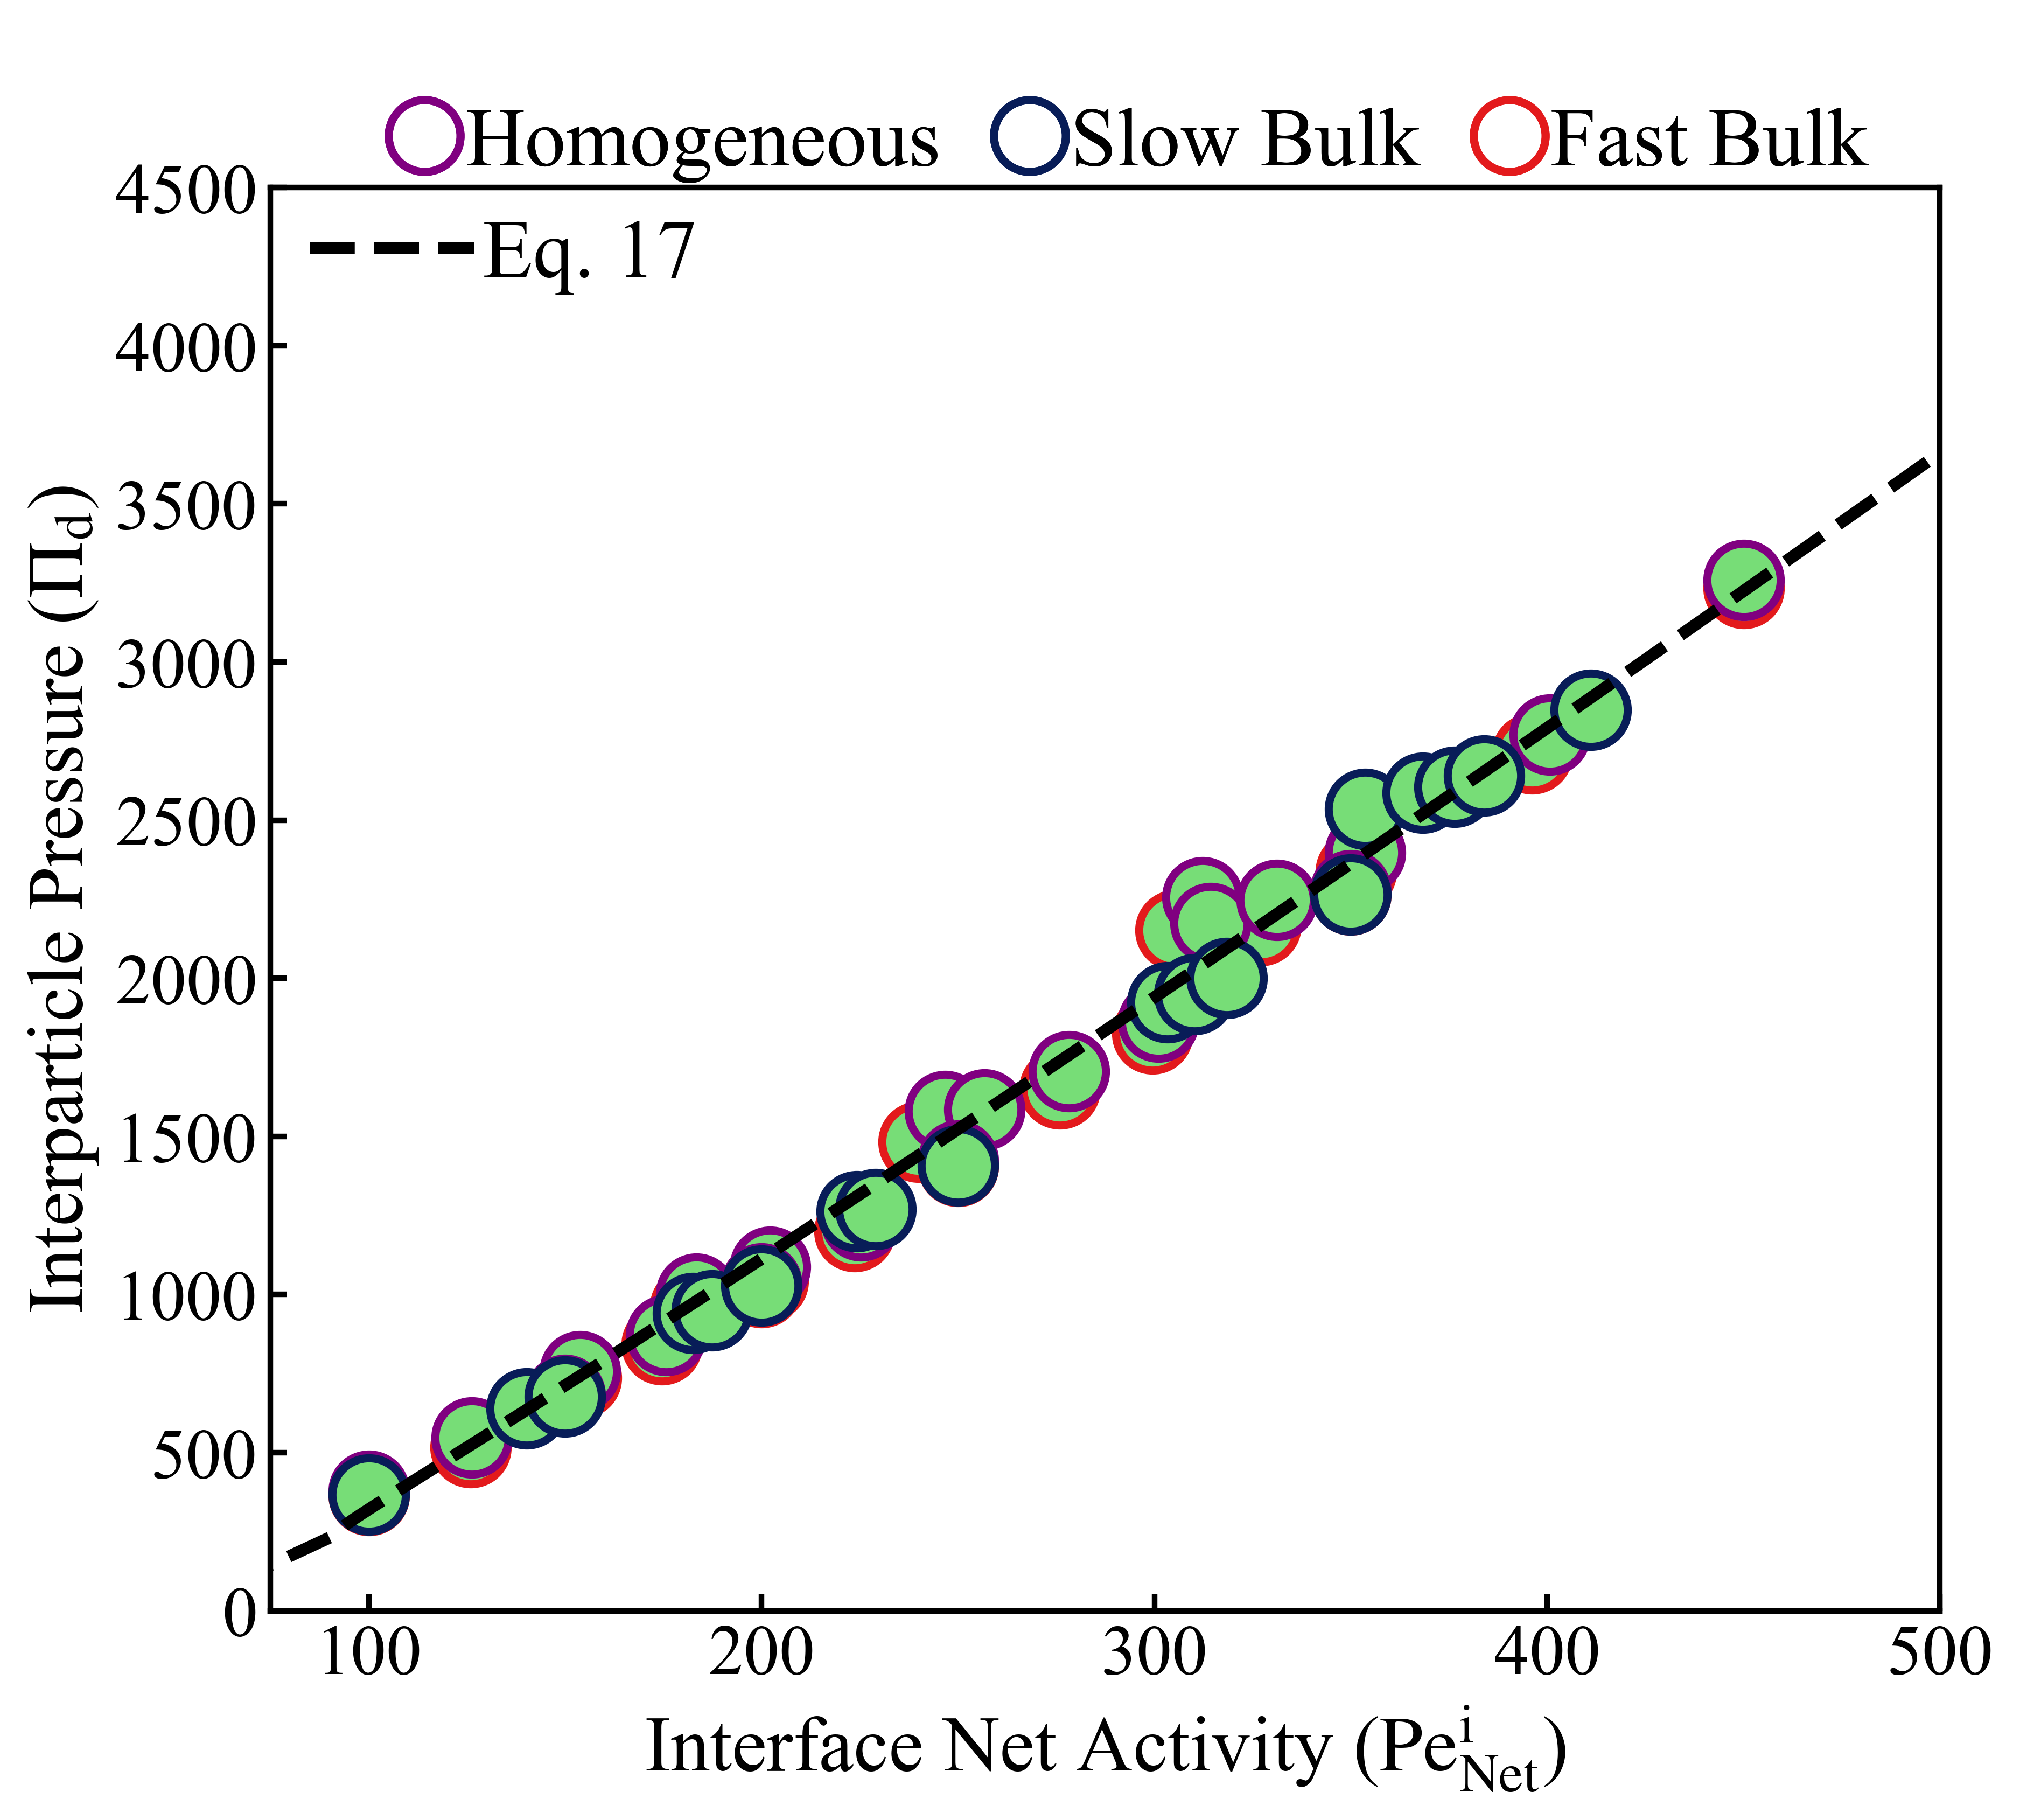

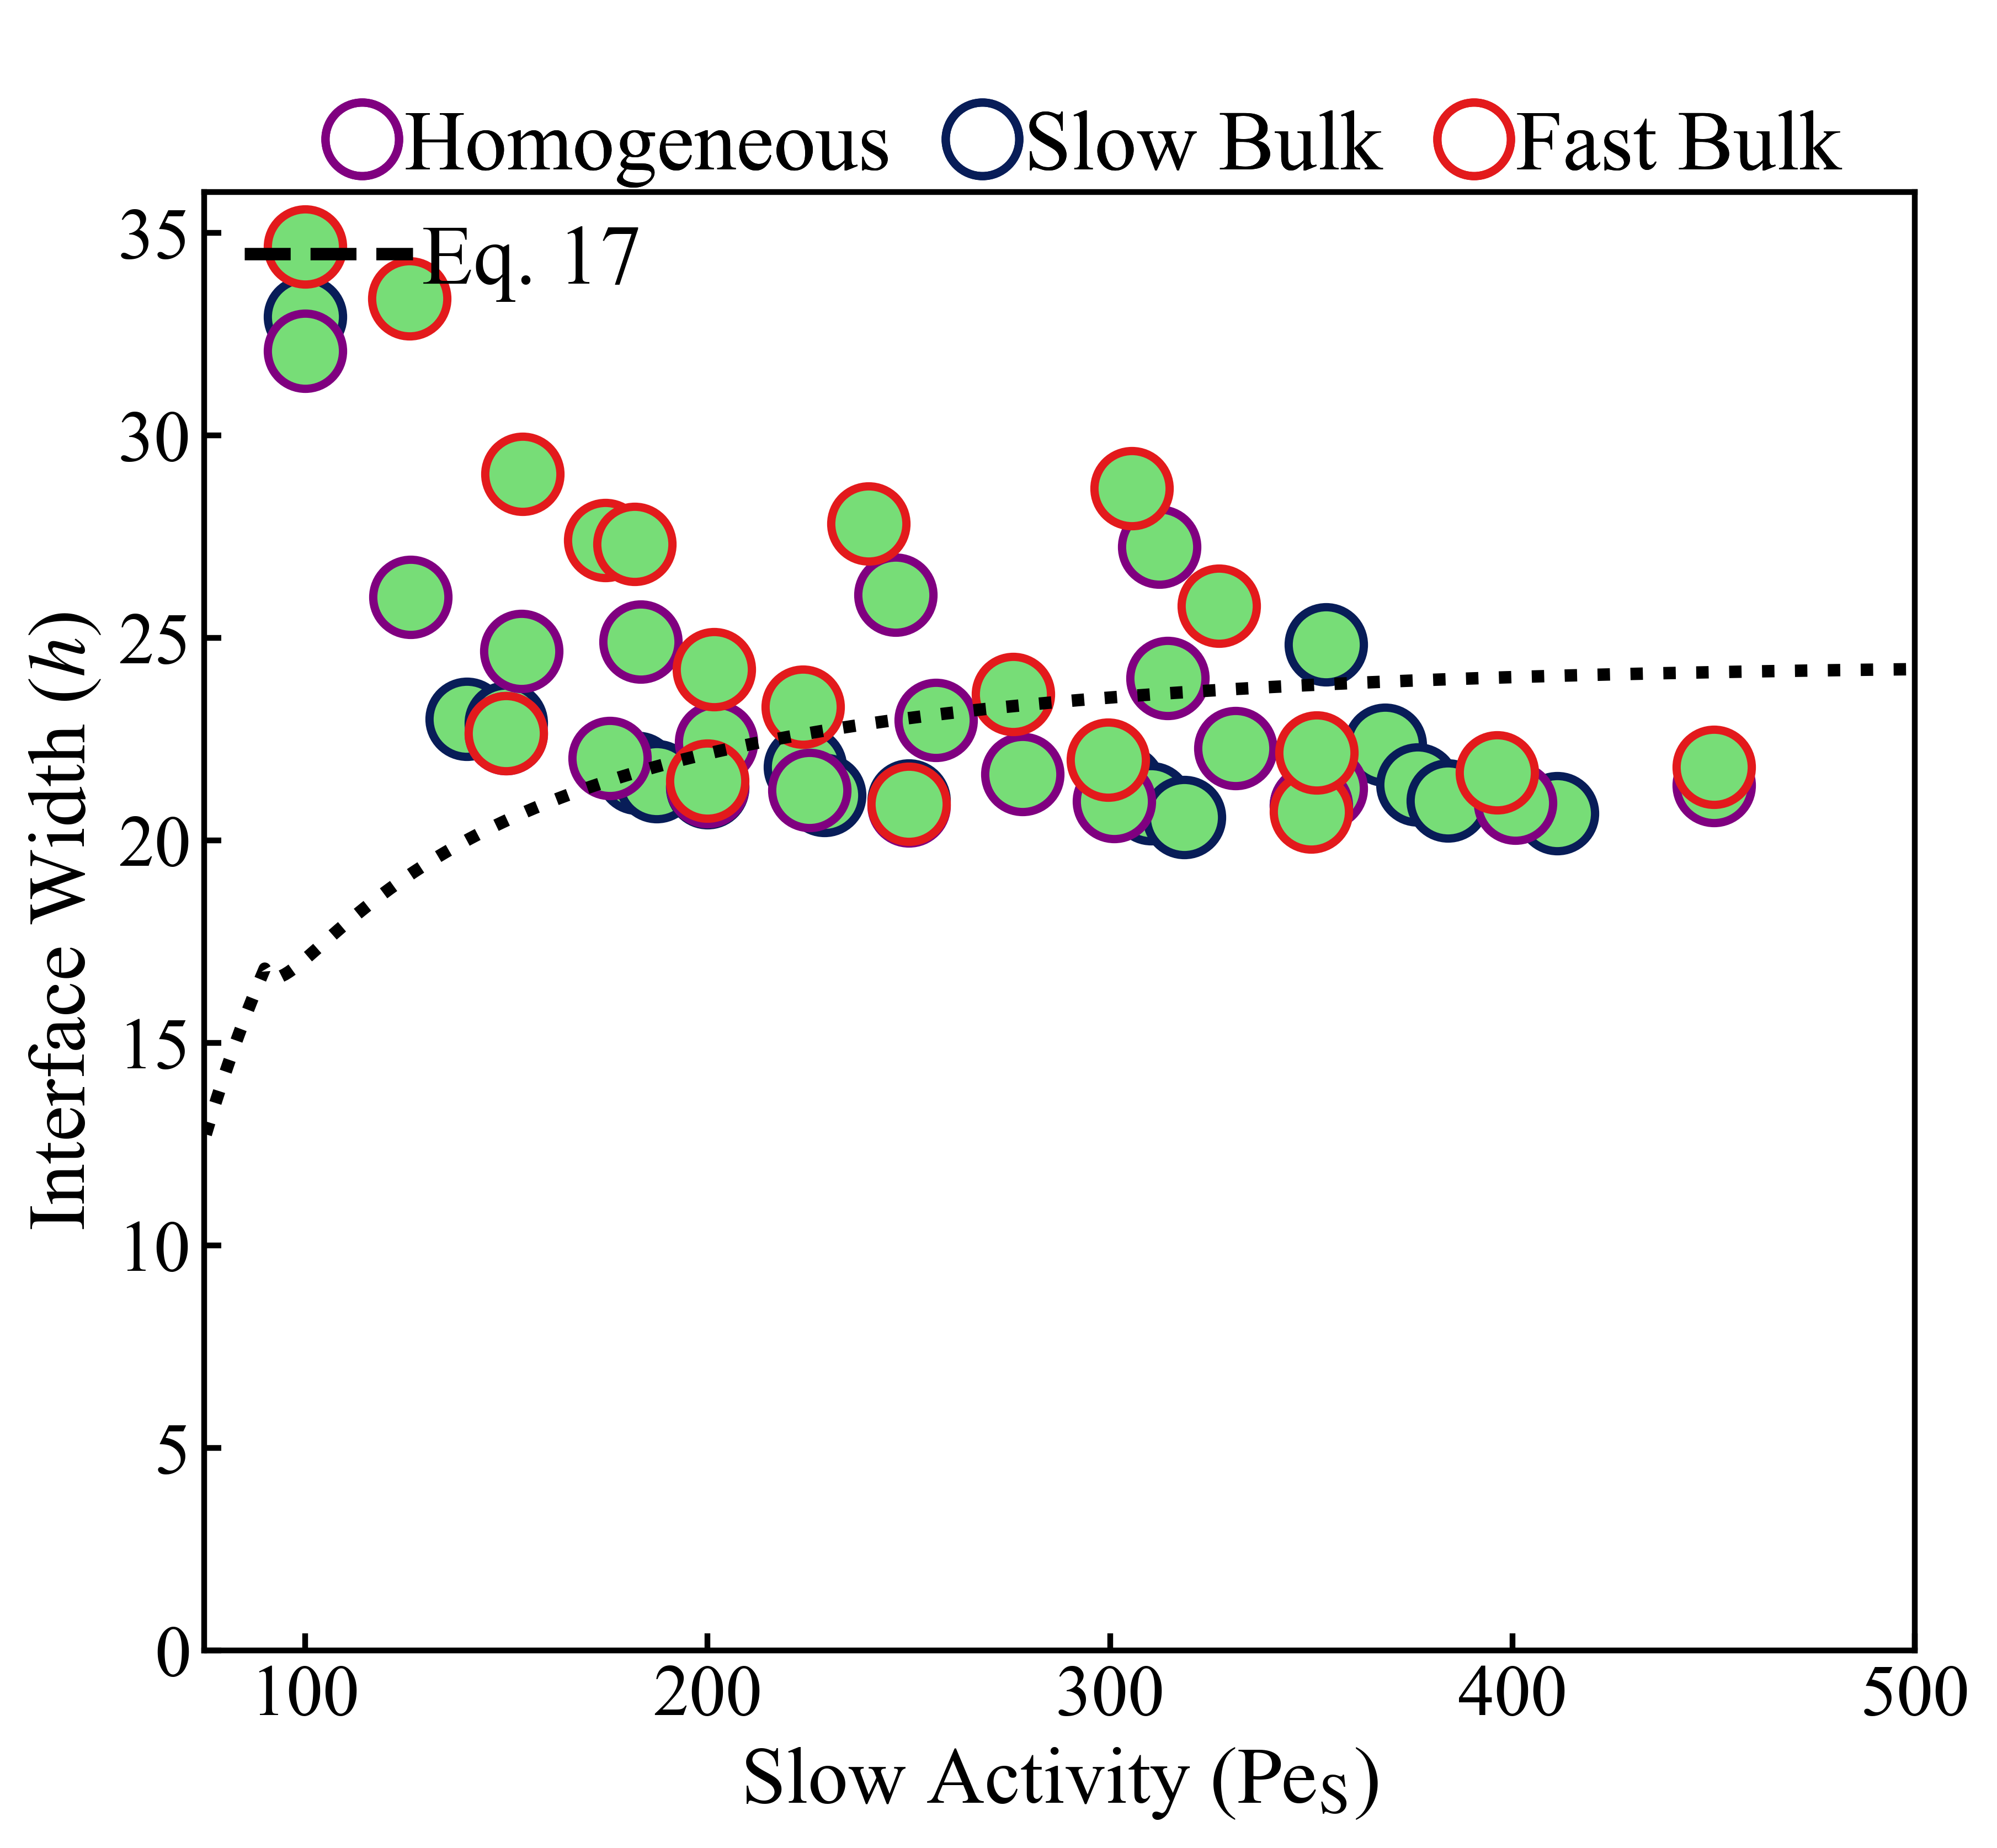

In [69]:
fast = np.where((interpart_type==0) & (interpart_peA >50))[0]
rand = np.where((interpart_type==1) & (interpart_peA >50))[0]
slow = np.where((interpart_type==2) & (interpart_peB >50))[0]

fast_leg=[]
mkSz = [0.8, 0.8]
msz=10
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor='purple',
                      markerfacecolor='None', 
                      label='Homogeneous', markersize=(2.4*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=slowCol,
                      markerfacecolor='None', 
                      label='Slow Bulk', markersize=(2.4*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=fastCol,
                      markerfacecolor='None', 
                      label='Fast Bulk', markersize=(2.4*msz * mkSz[0])))

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.plot(int_pe_net, avg_int_theory_arr, color='black', linestyle='dotted', linewidth=1.8*1.8)


#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
plt.plot(int_pe_net_theory, press_theory2, color='black', linestyle='--', linewidth=1.8*1.8)
plt.scatter(int_pe_net[slow], interpart_press[slow], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
plt.scatter(int_pe_net[rand], interpart_press[rand], edgecolor='purple',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
plt.scatter(int_pe_net[fast], interpart_press[fast], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 4500])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Interparticle Pressure ($\Pi_\mathrm{d}$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 17', markerfacecolor='dashed', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.09],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)

two_leg = ax1.legend(handles=fast_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.5, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(two_leg)


plt.show()


fast = np.where((interpart_type==0) & (interpart_peA >50))[0]
rand = np.where((interpart_type==1) & (interpart_peA >50))[0]
slow = np.where((interpart_type==2) & (interpart_peB >50))[0]

fast_leg=[]
mkSz = [0.8, 0.8]
msz=10

fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor='purple',
                      markerfacecolor='None', 
                      label='Homogeneous', markersize=(2.4*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=slowCol,
                      markerfacecolor='None', 
                      label='Slow Bulk', markersize=(2.4*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=fastCol,
                      markerfacecolor='None', 
                      label='Fast Bulk', markersize=(2.4*msz * mkSz[0])))

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, width_theory2, color='black', linestyle='dotted', linewidth=1.8*1.8)


#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, press_theory2, color='black', linestyle='--', linewidth=1.8*1.8)
plt.scatter(int_pe_net[fast], avg_width[fast], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
plt.scatter(int_pe_net[rand], avg_width[rand], edgecolor='purple',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
plt.scatter(int_pe_net[slow], avg_width[slow], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 36])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Interface Width ($h$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Slow Activity ($\mathrm{Pe}_\mathrm{S}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 17', markerfacecolor='dashed', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.09],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)

two_leg = ax1.legend(handles=fast_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.5, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(two_leg)


plt.show()


74
74


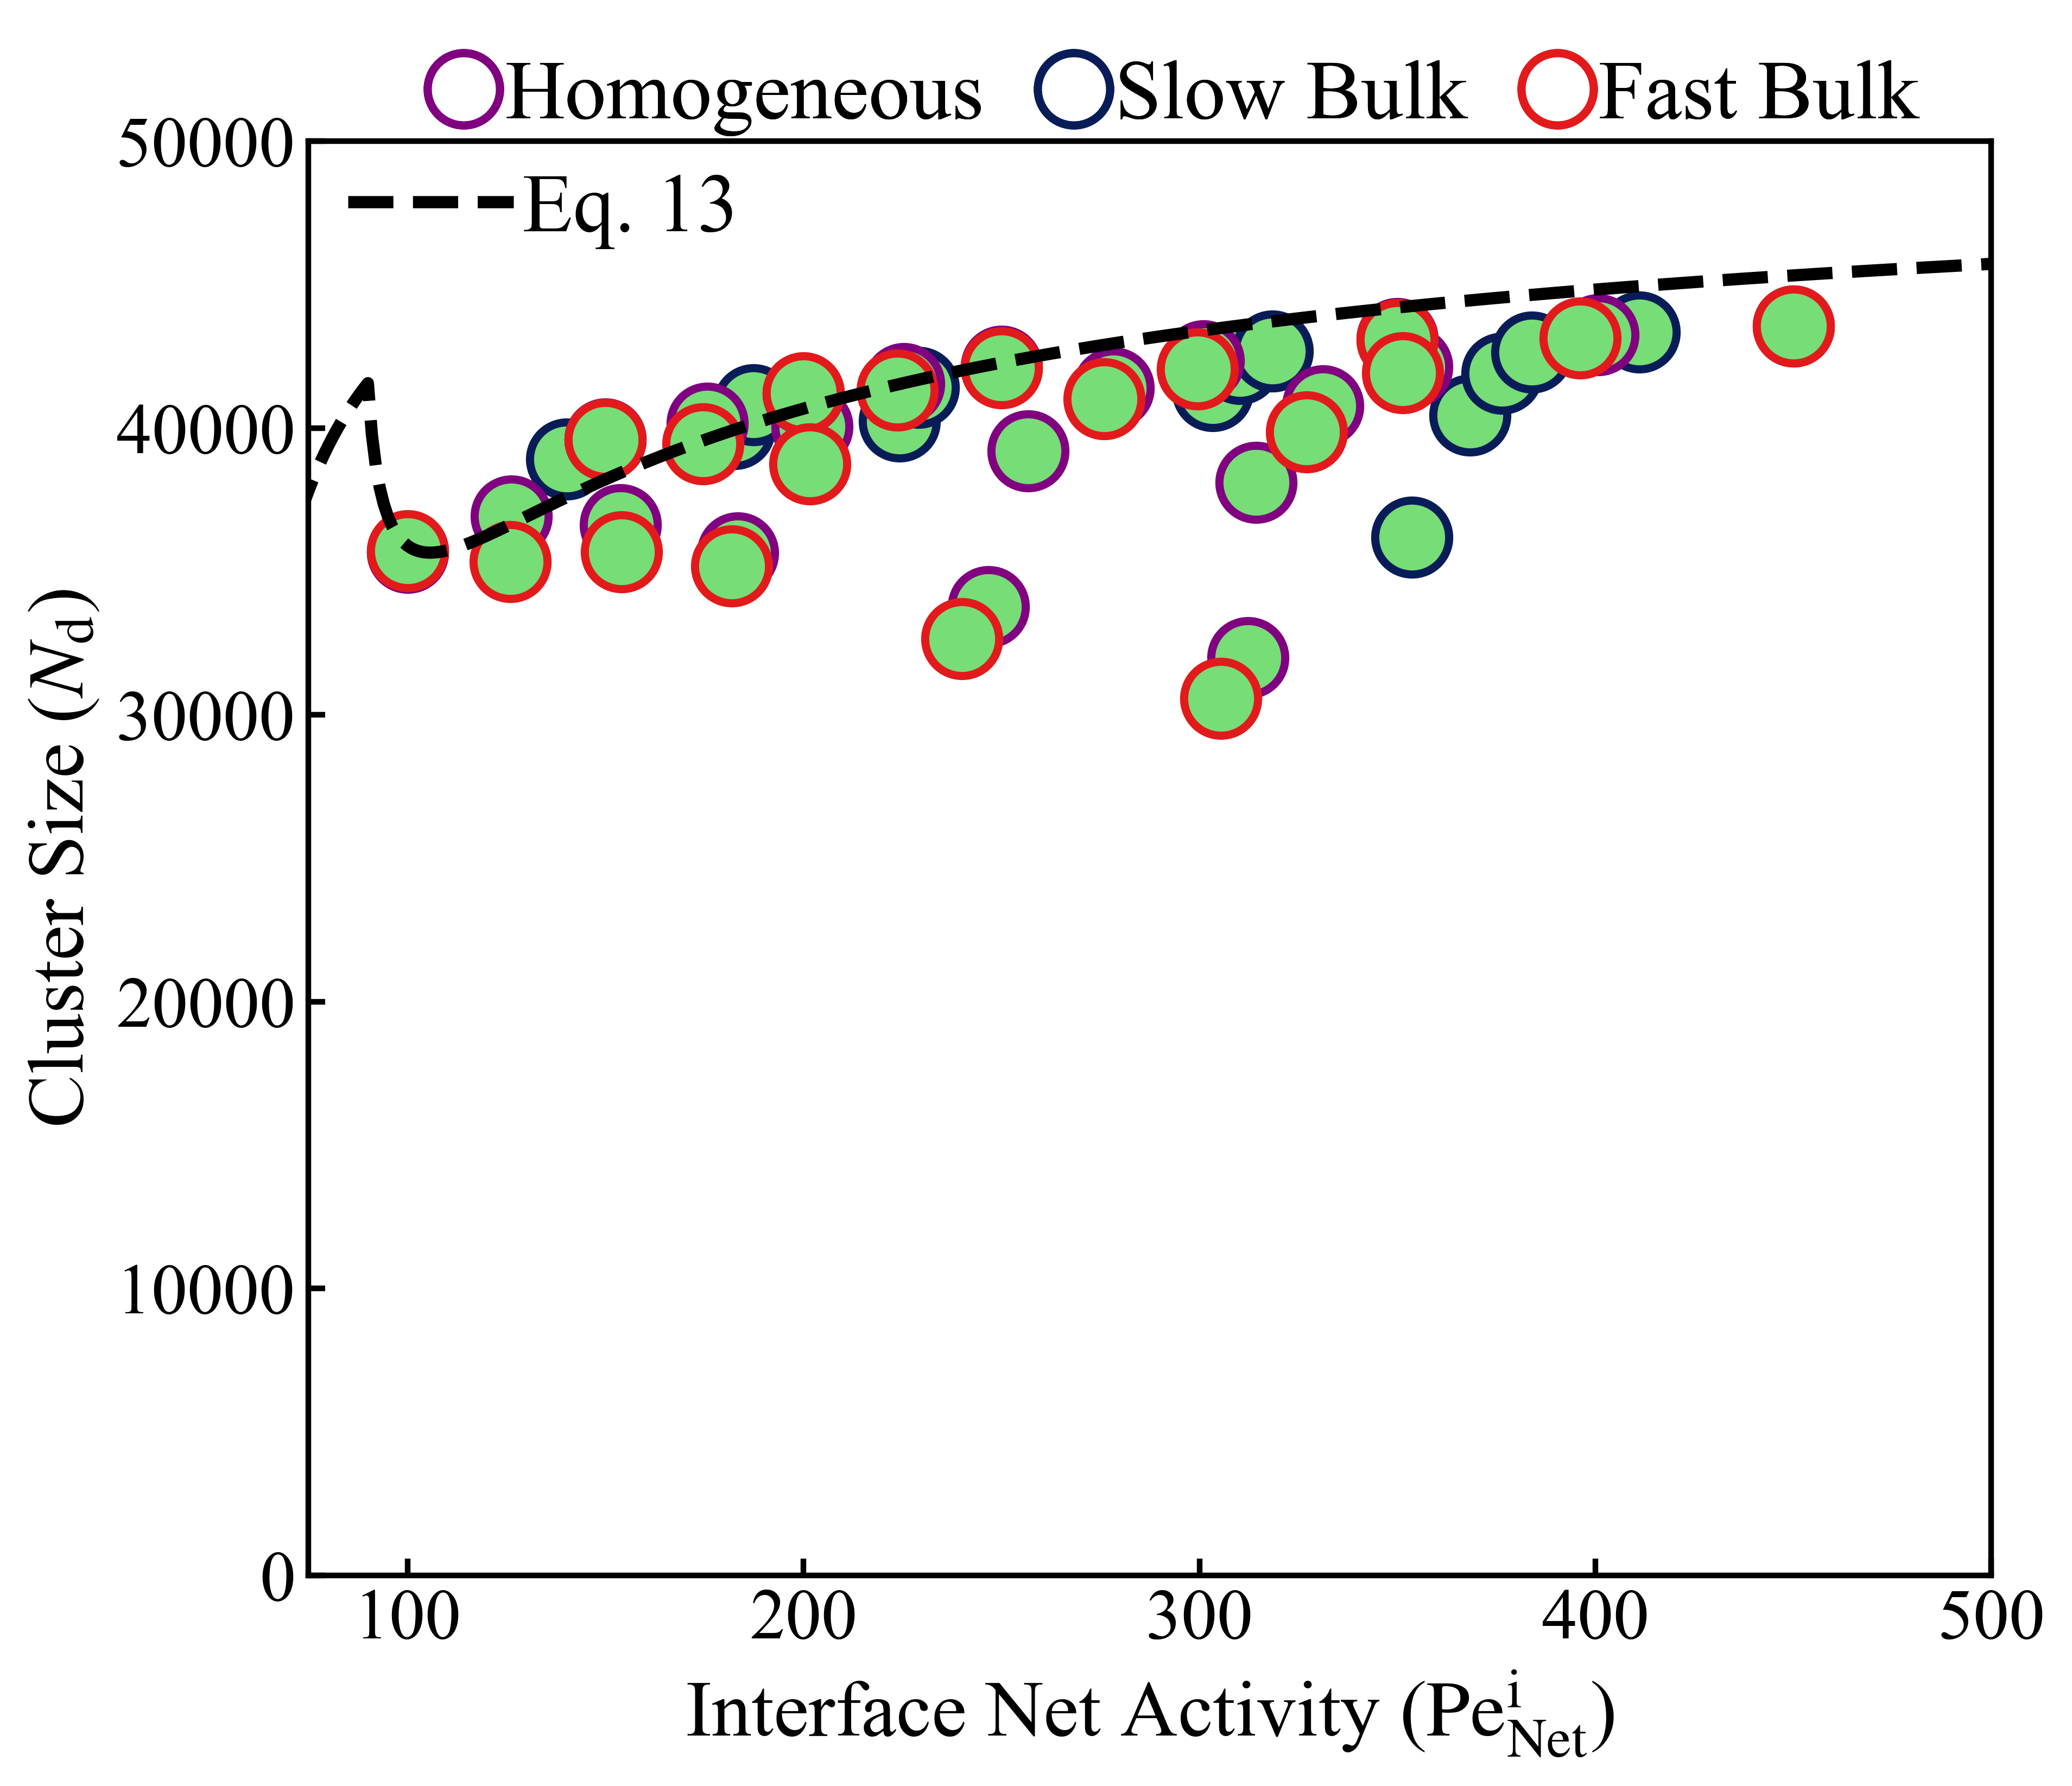

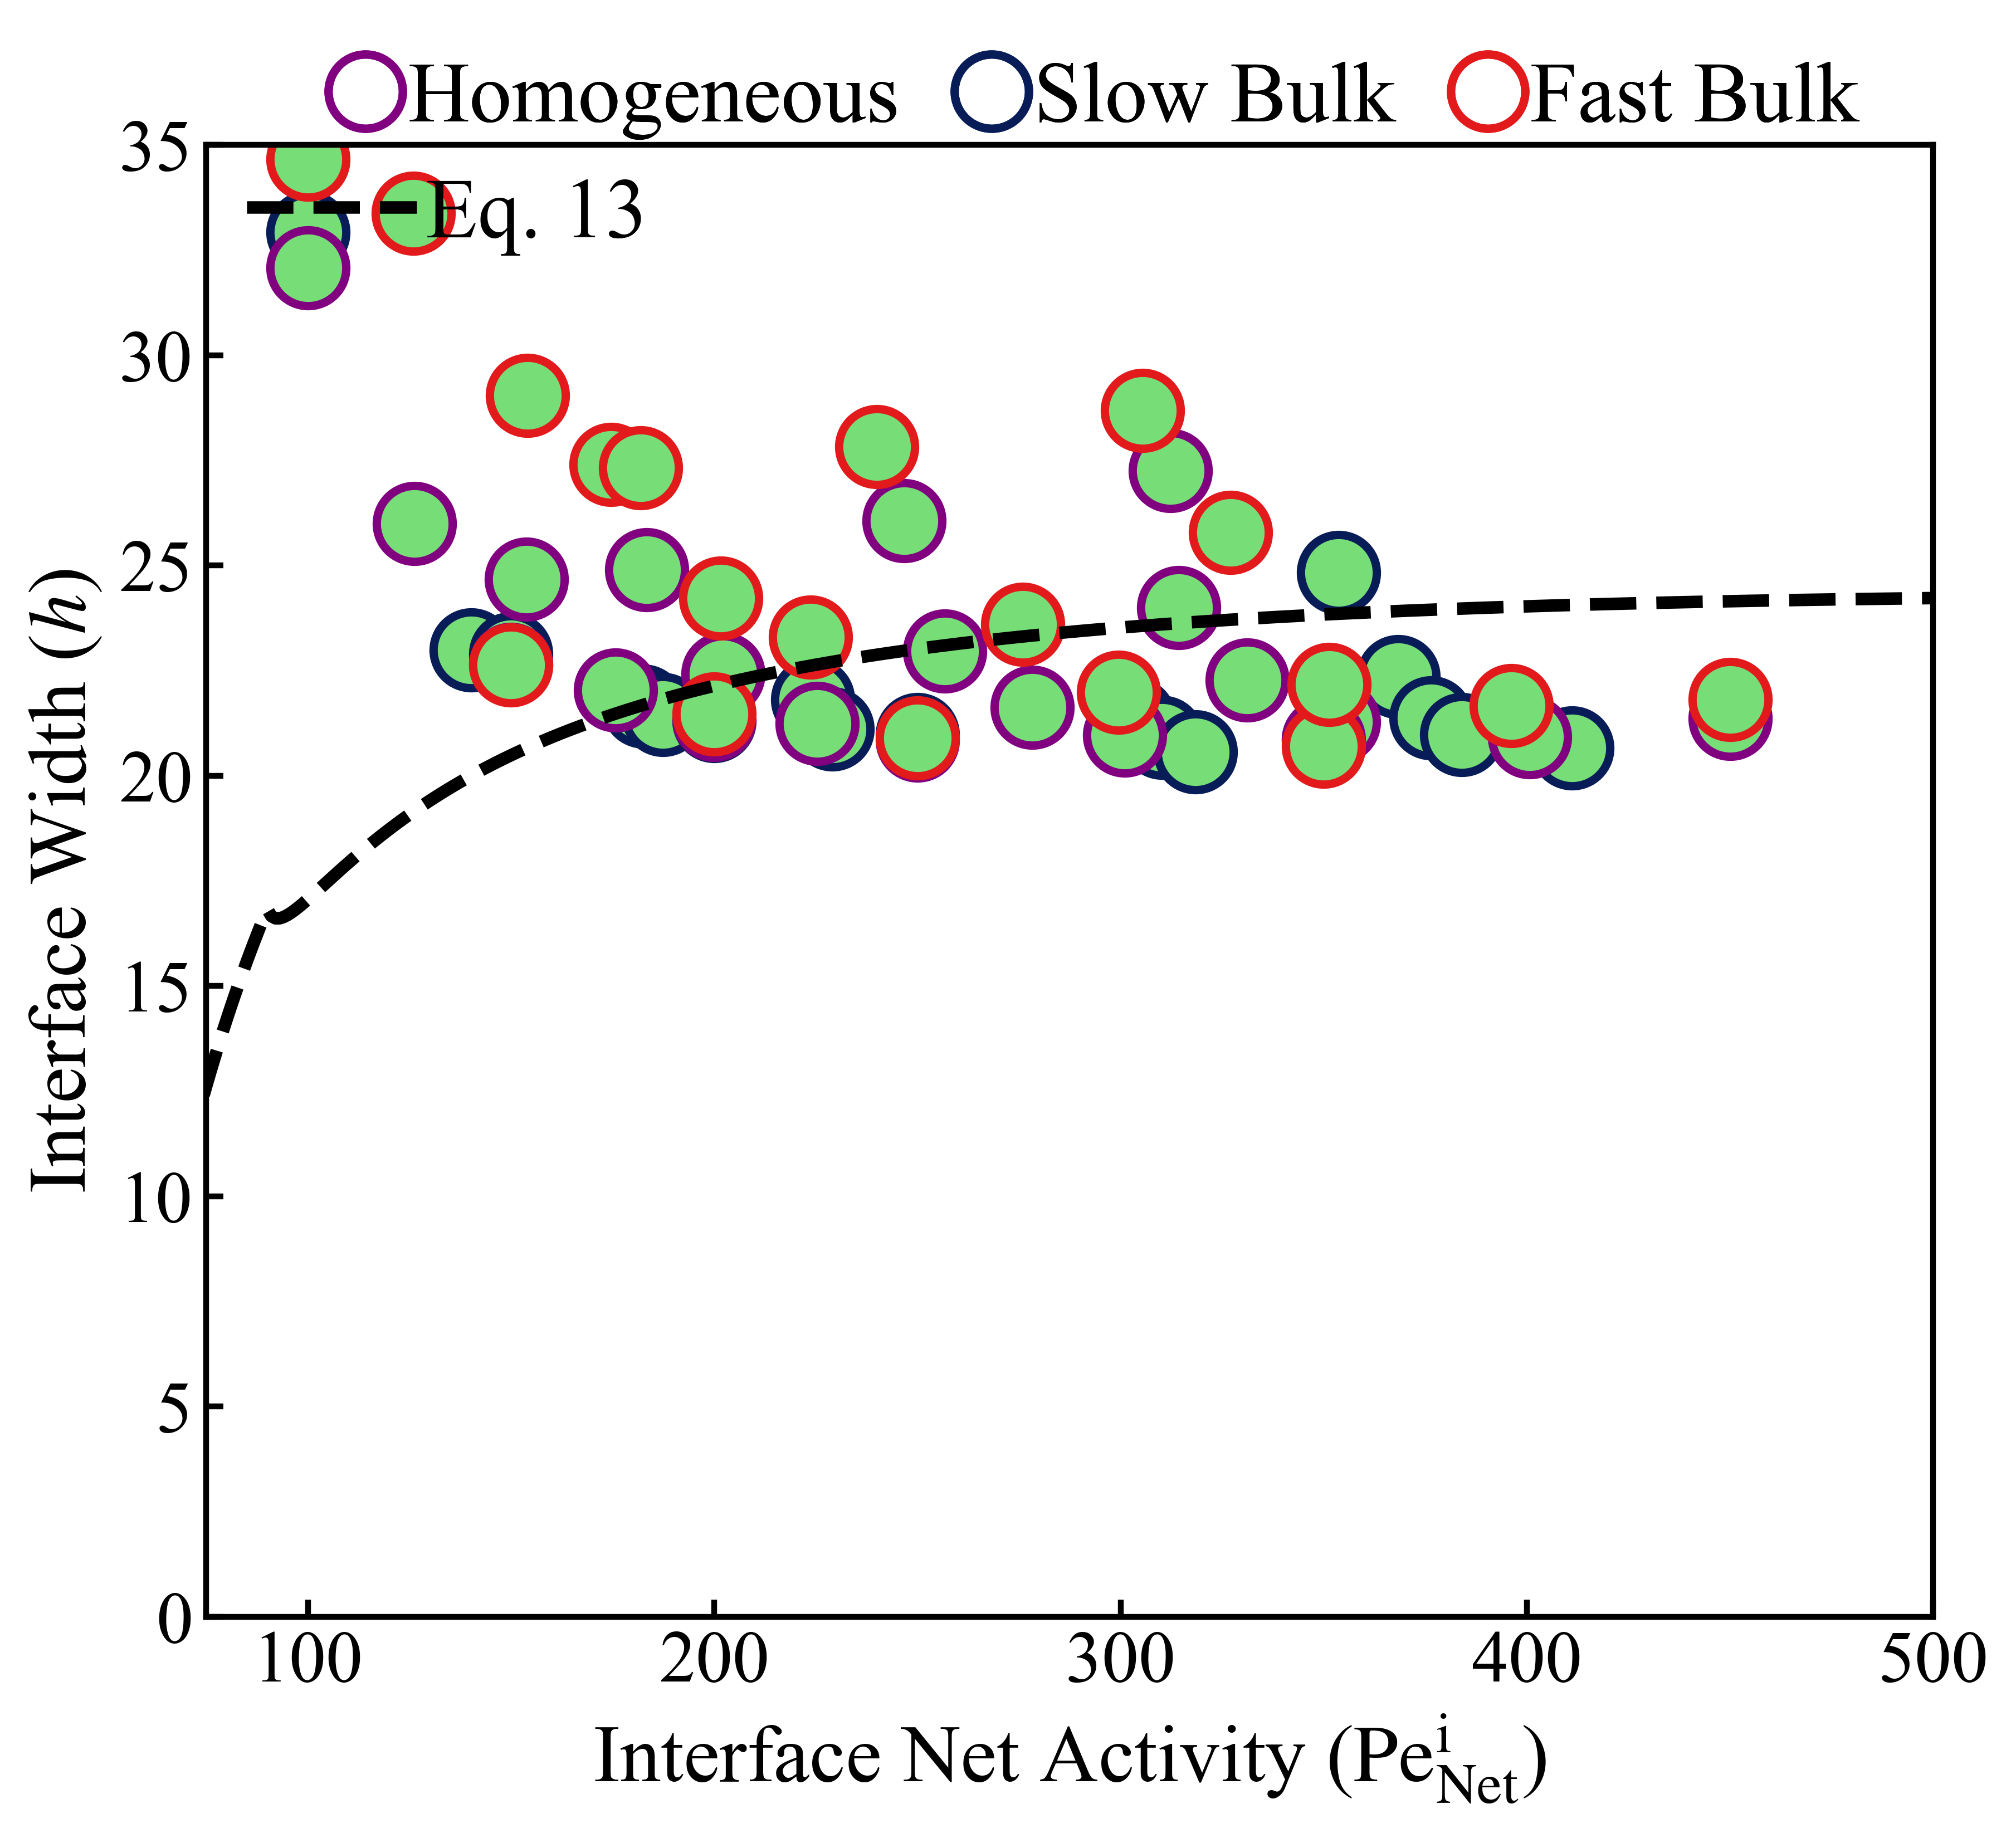

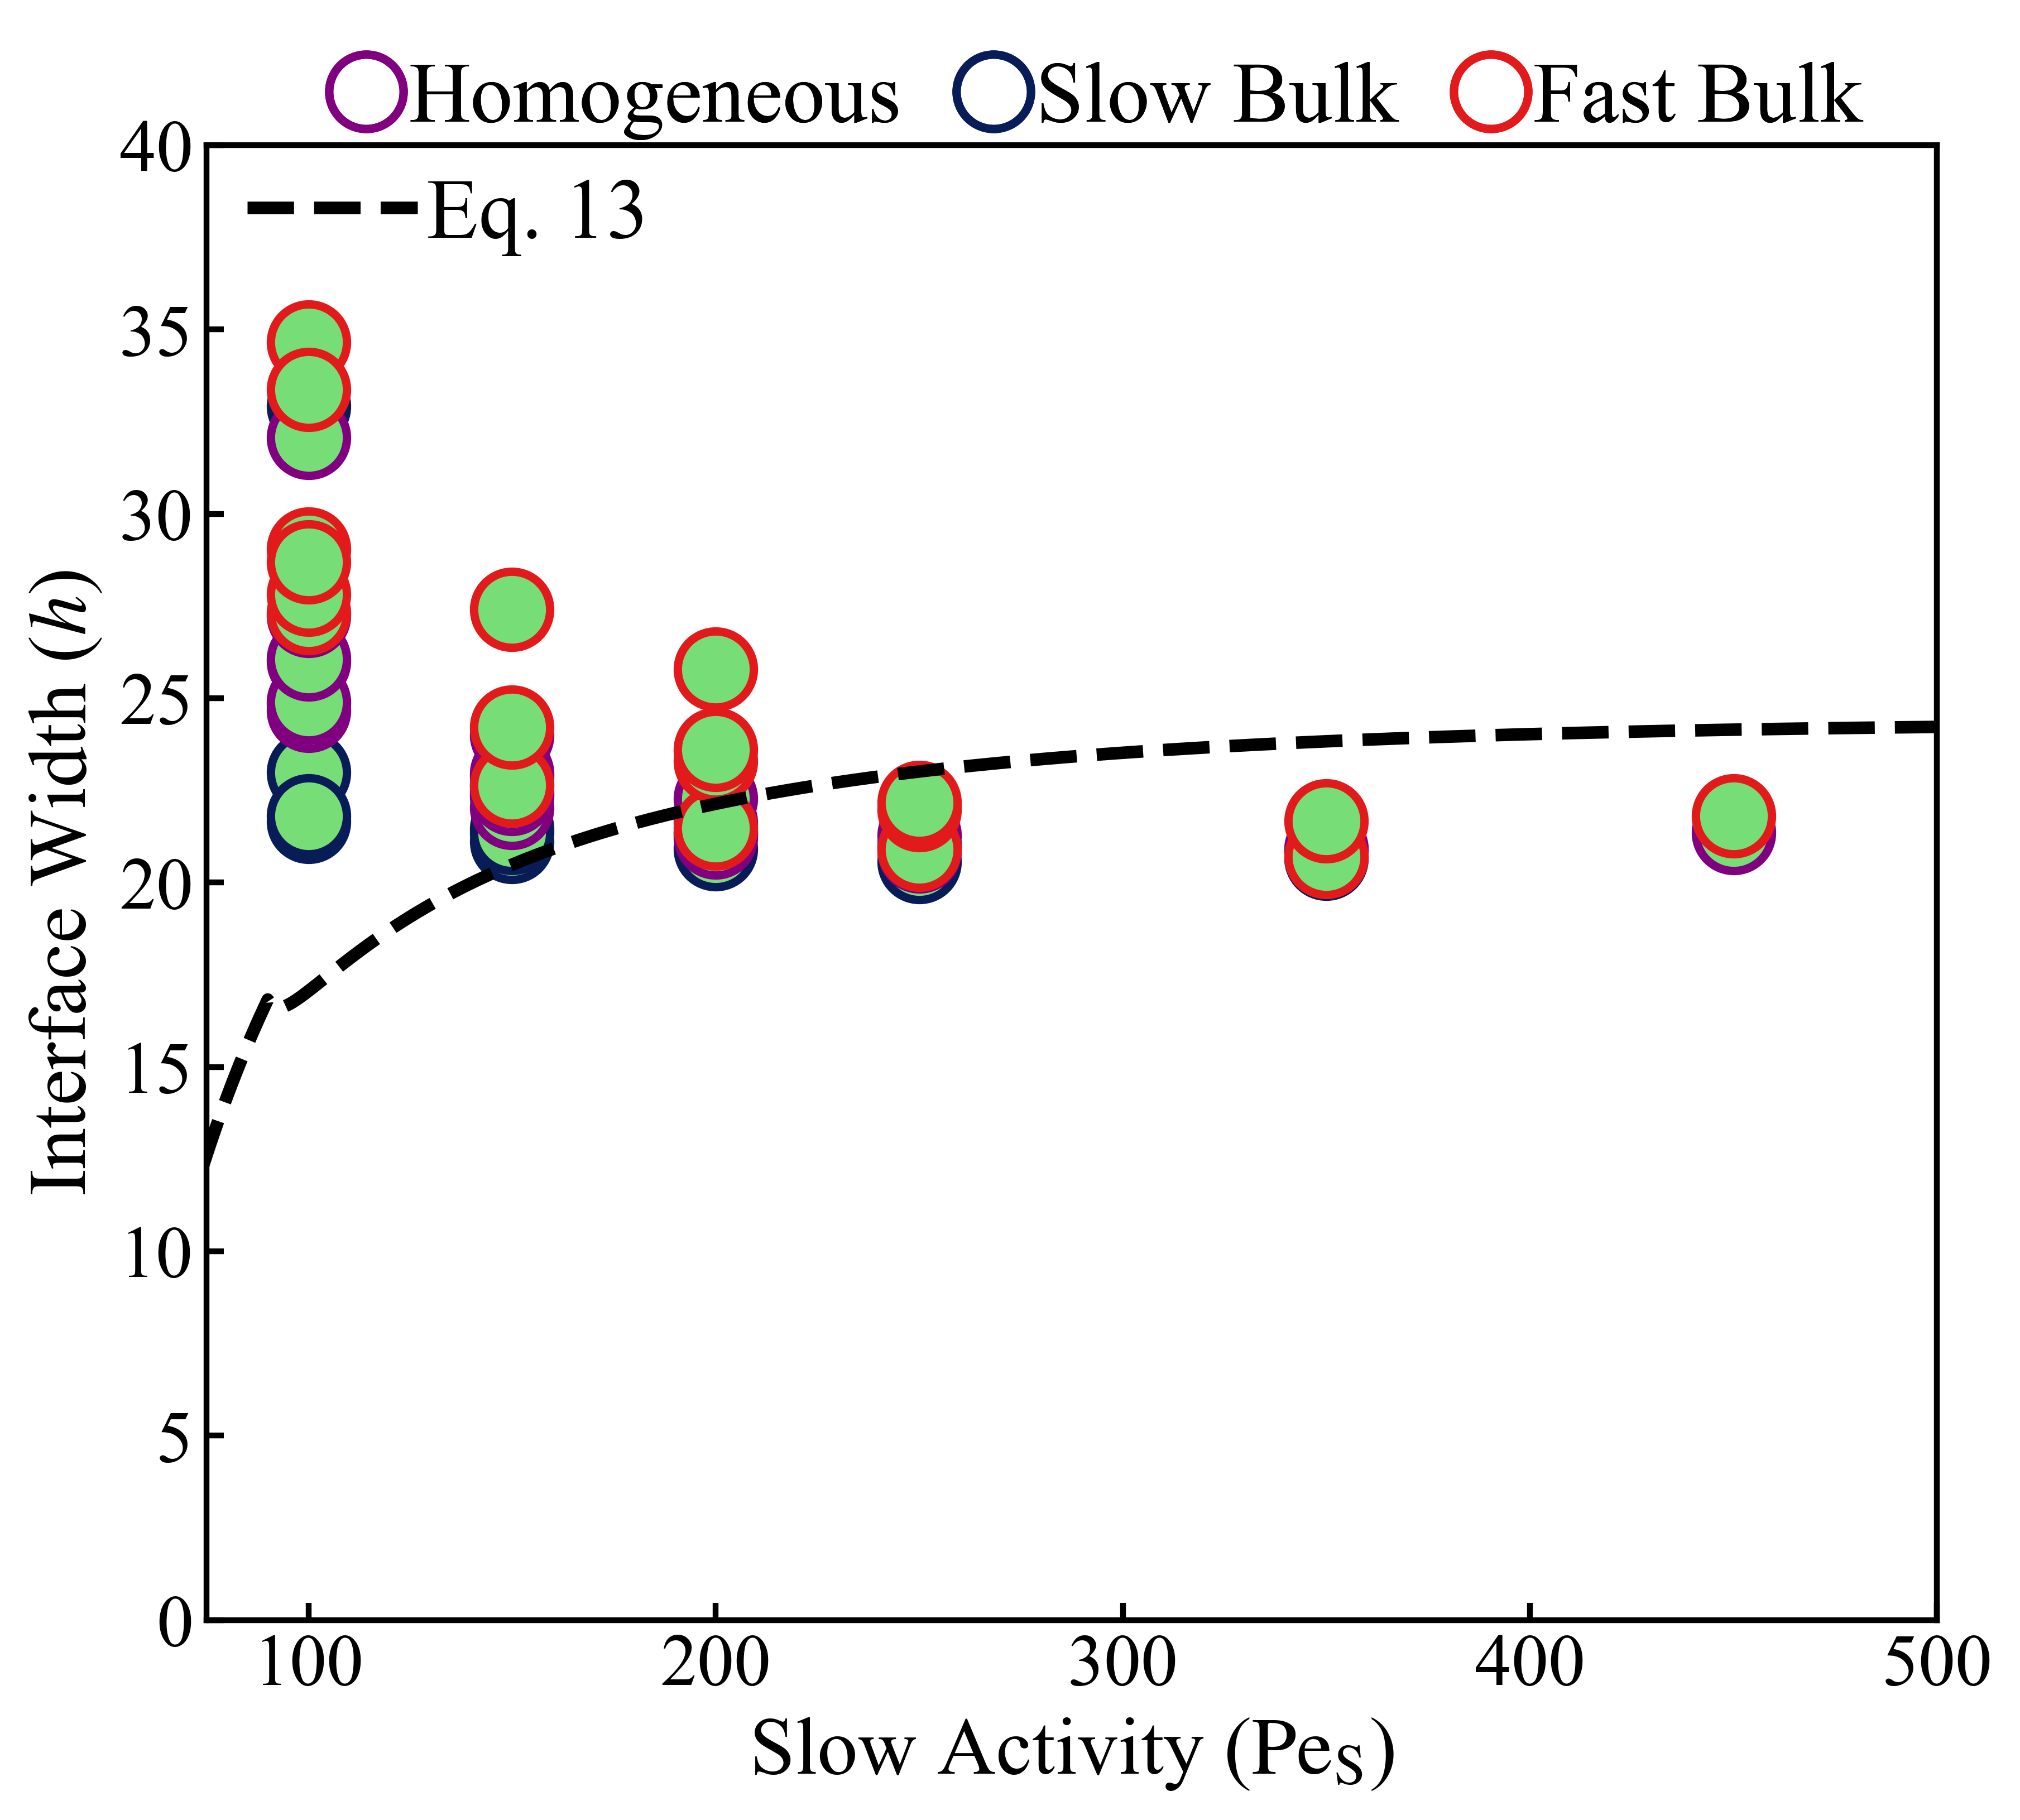

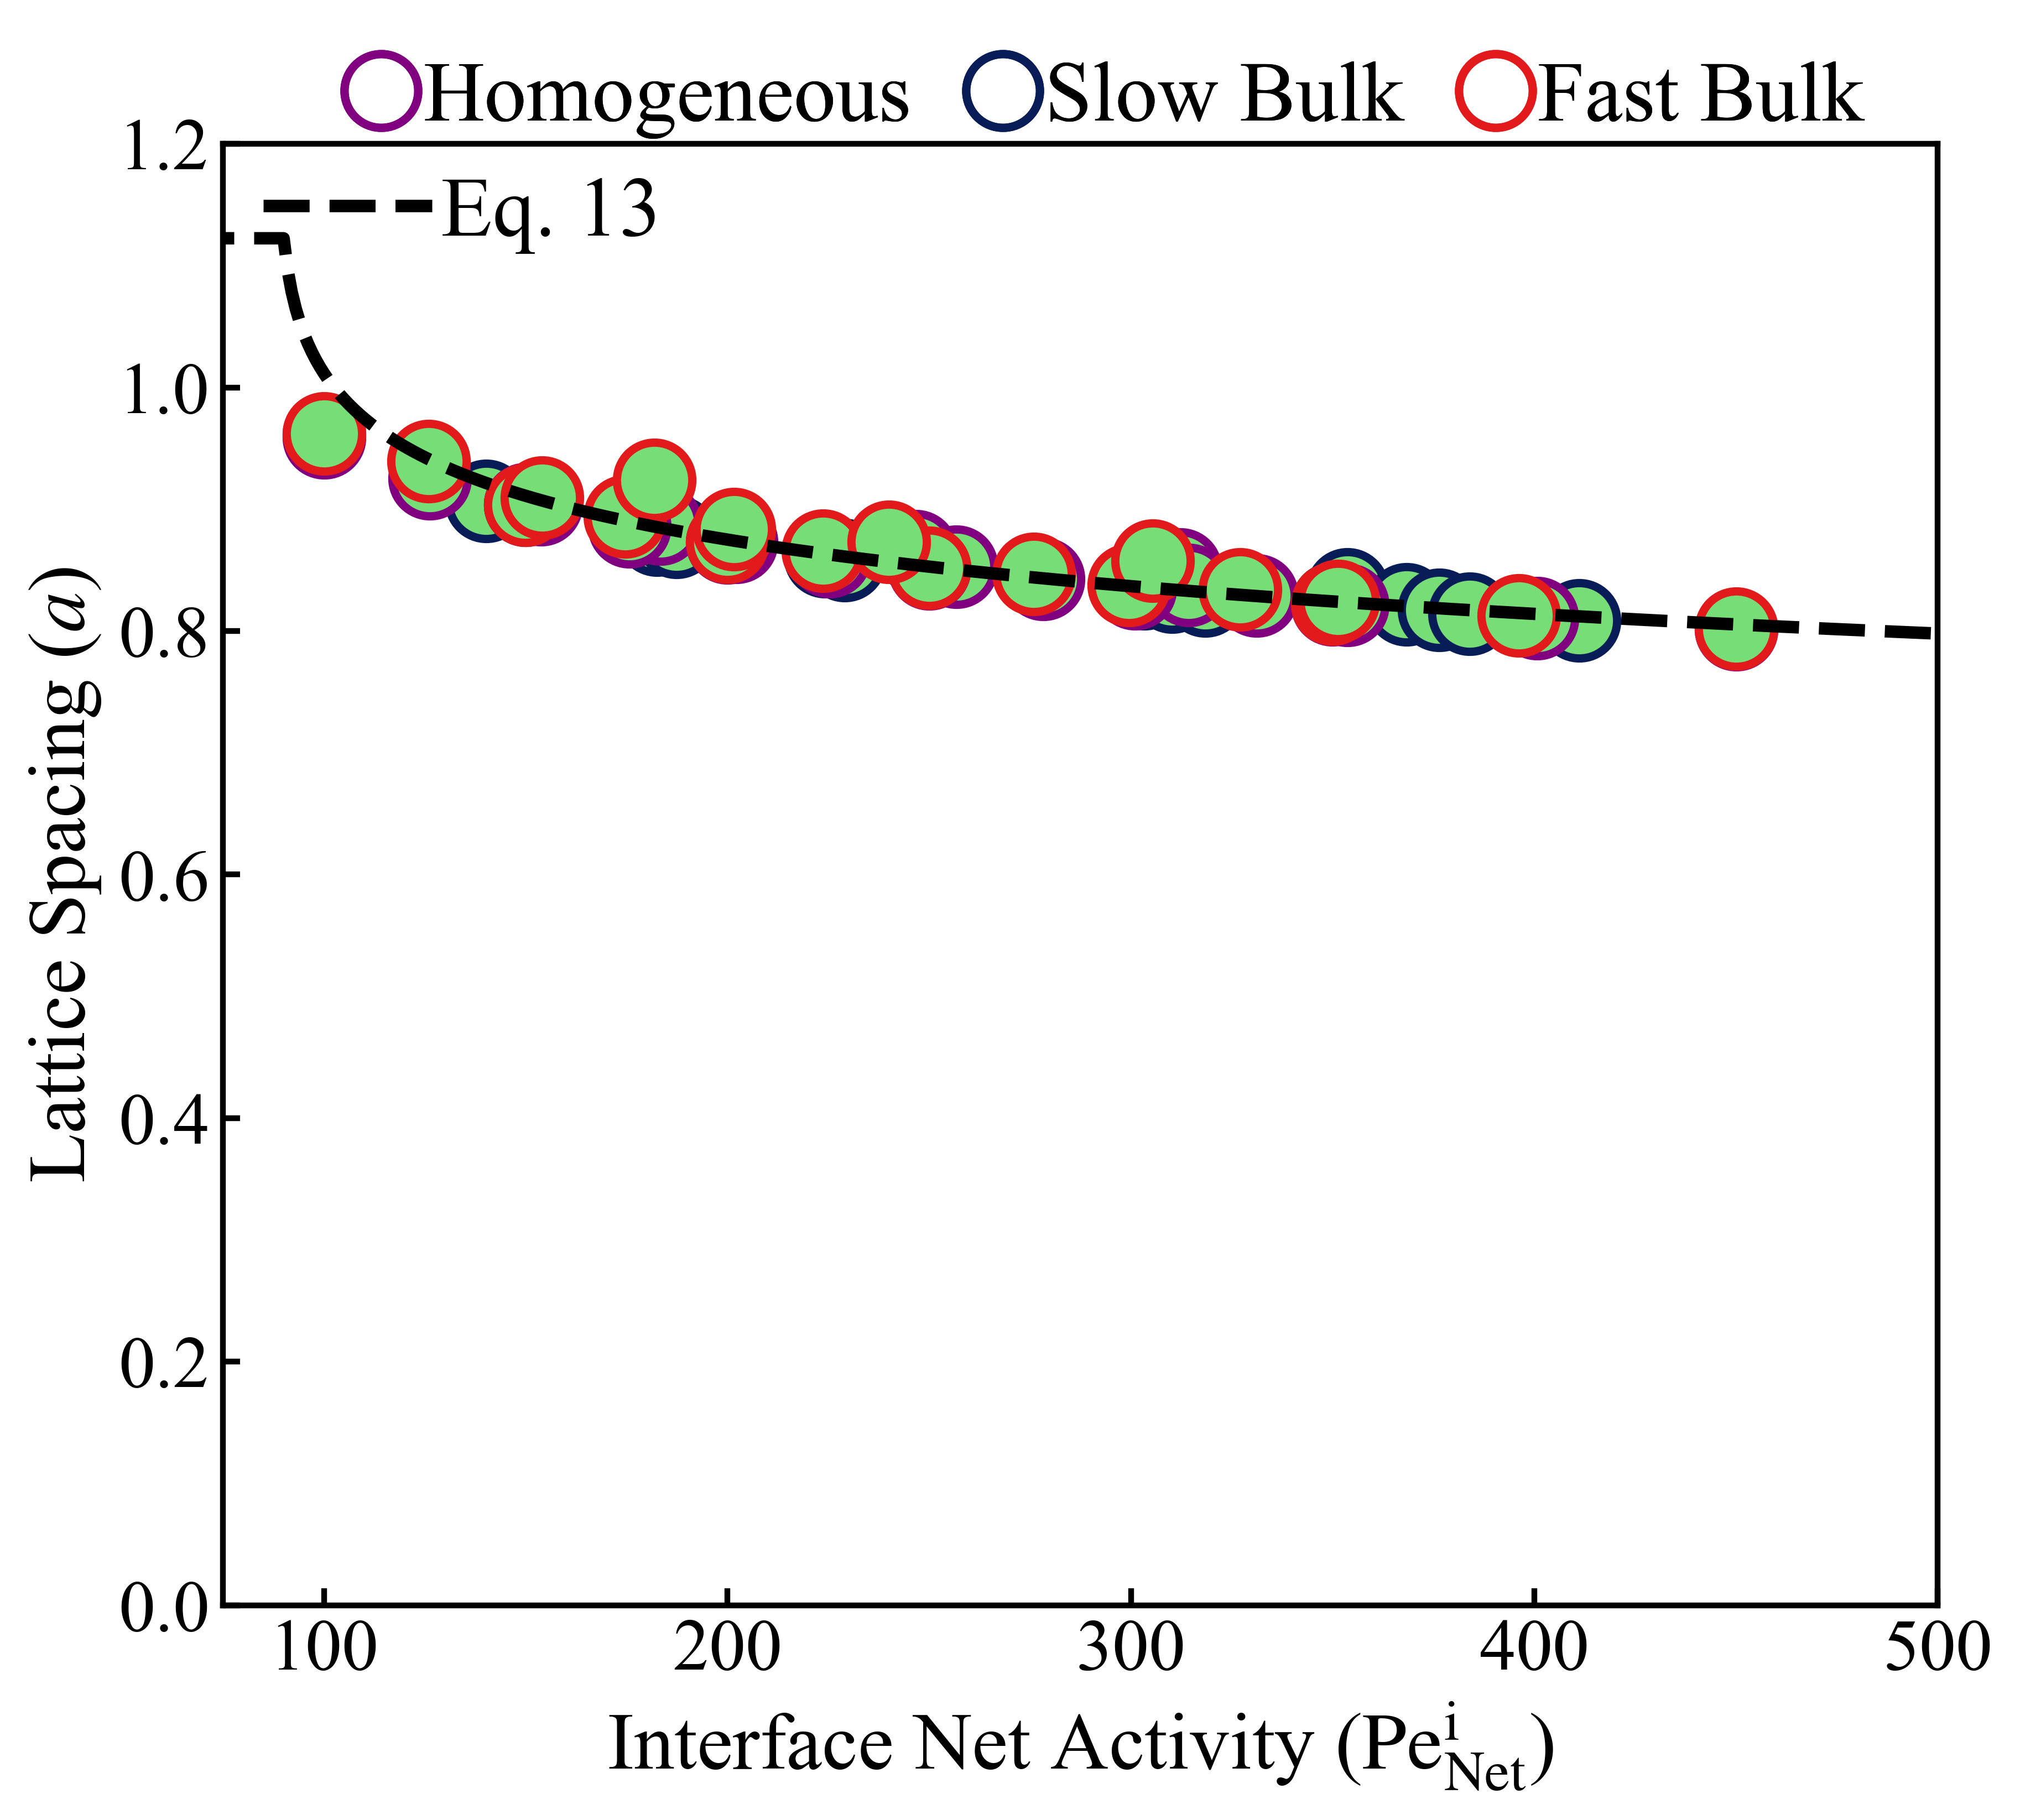

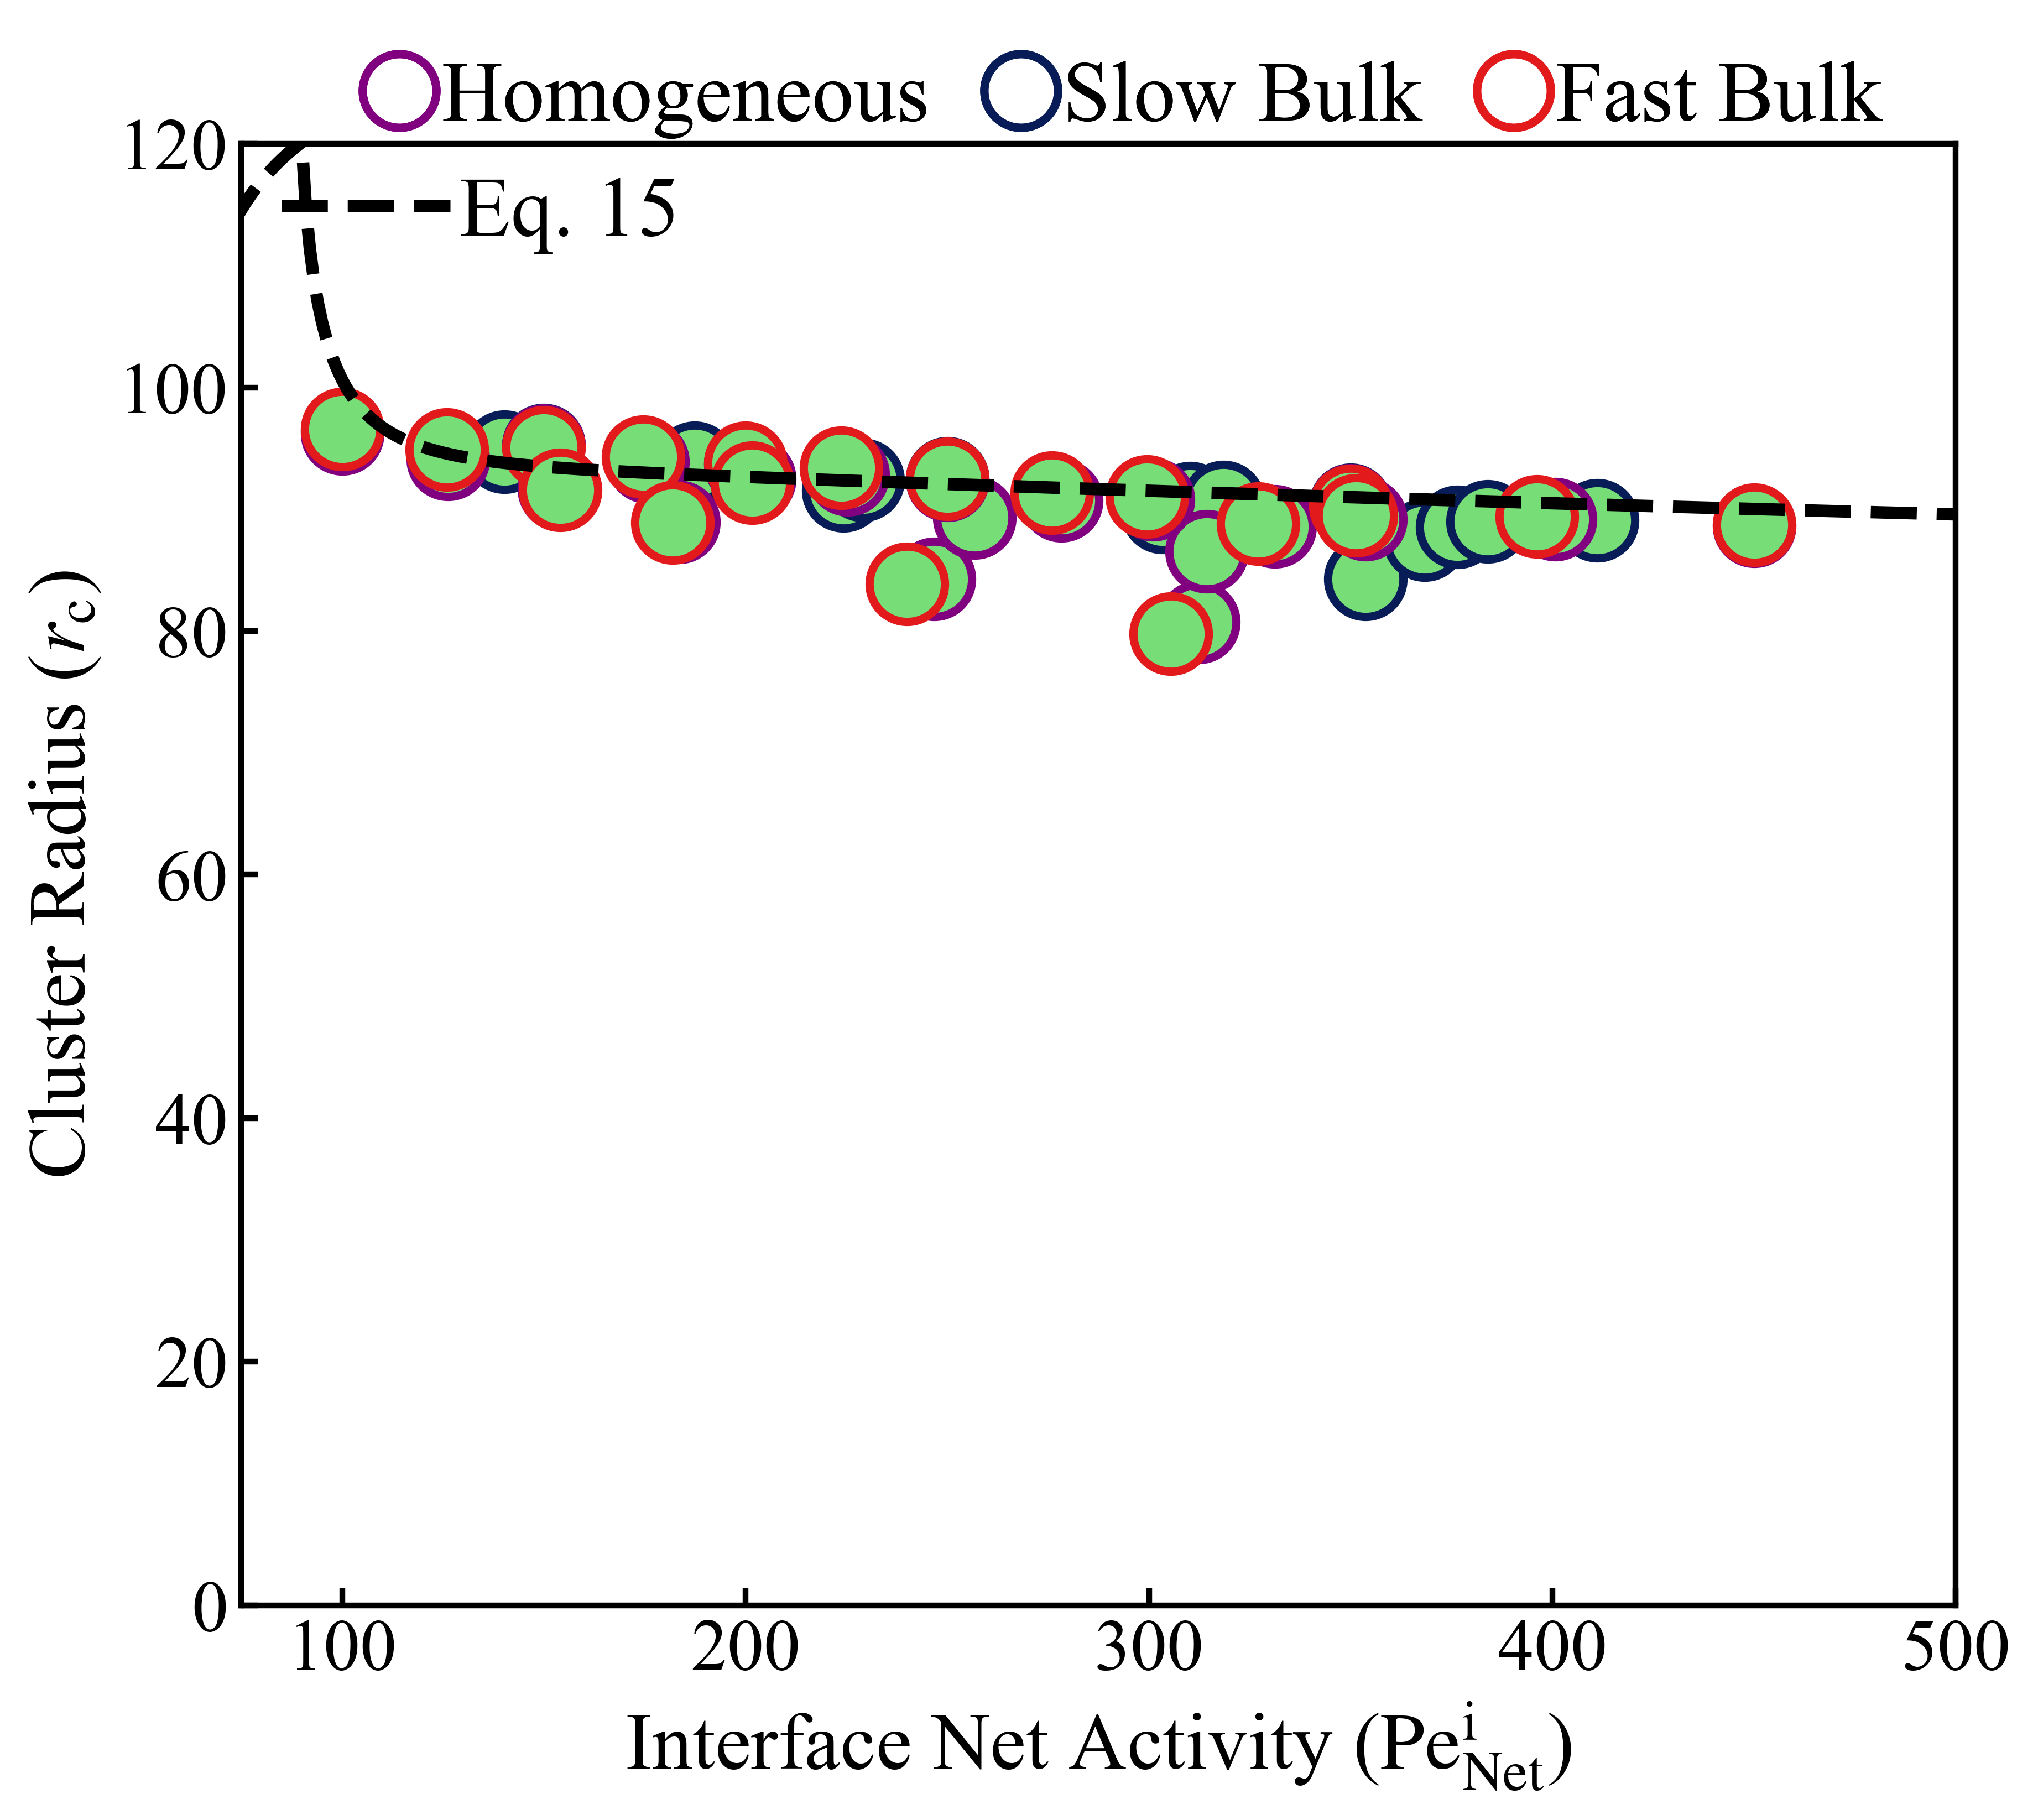

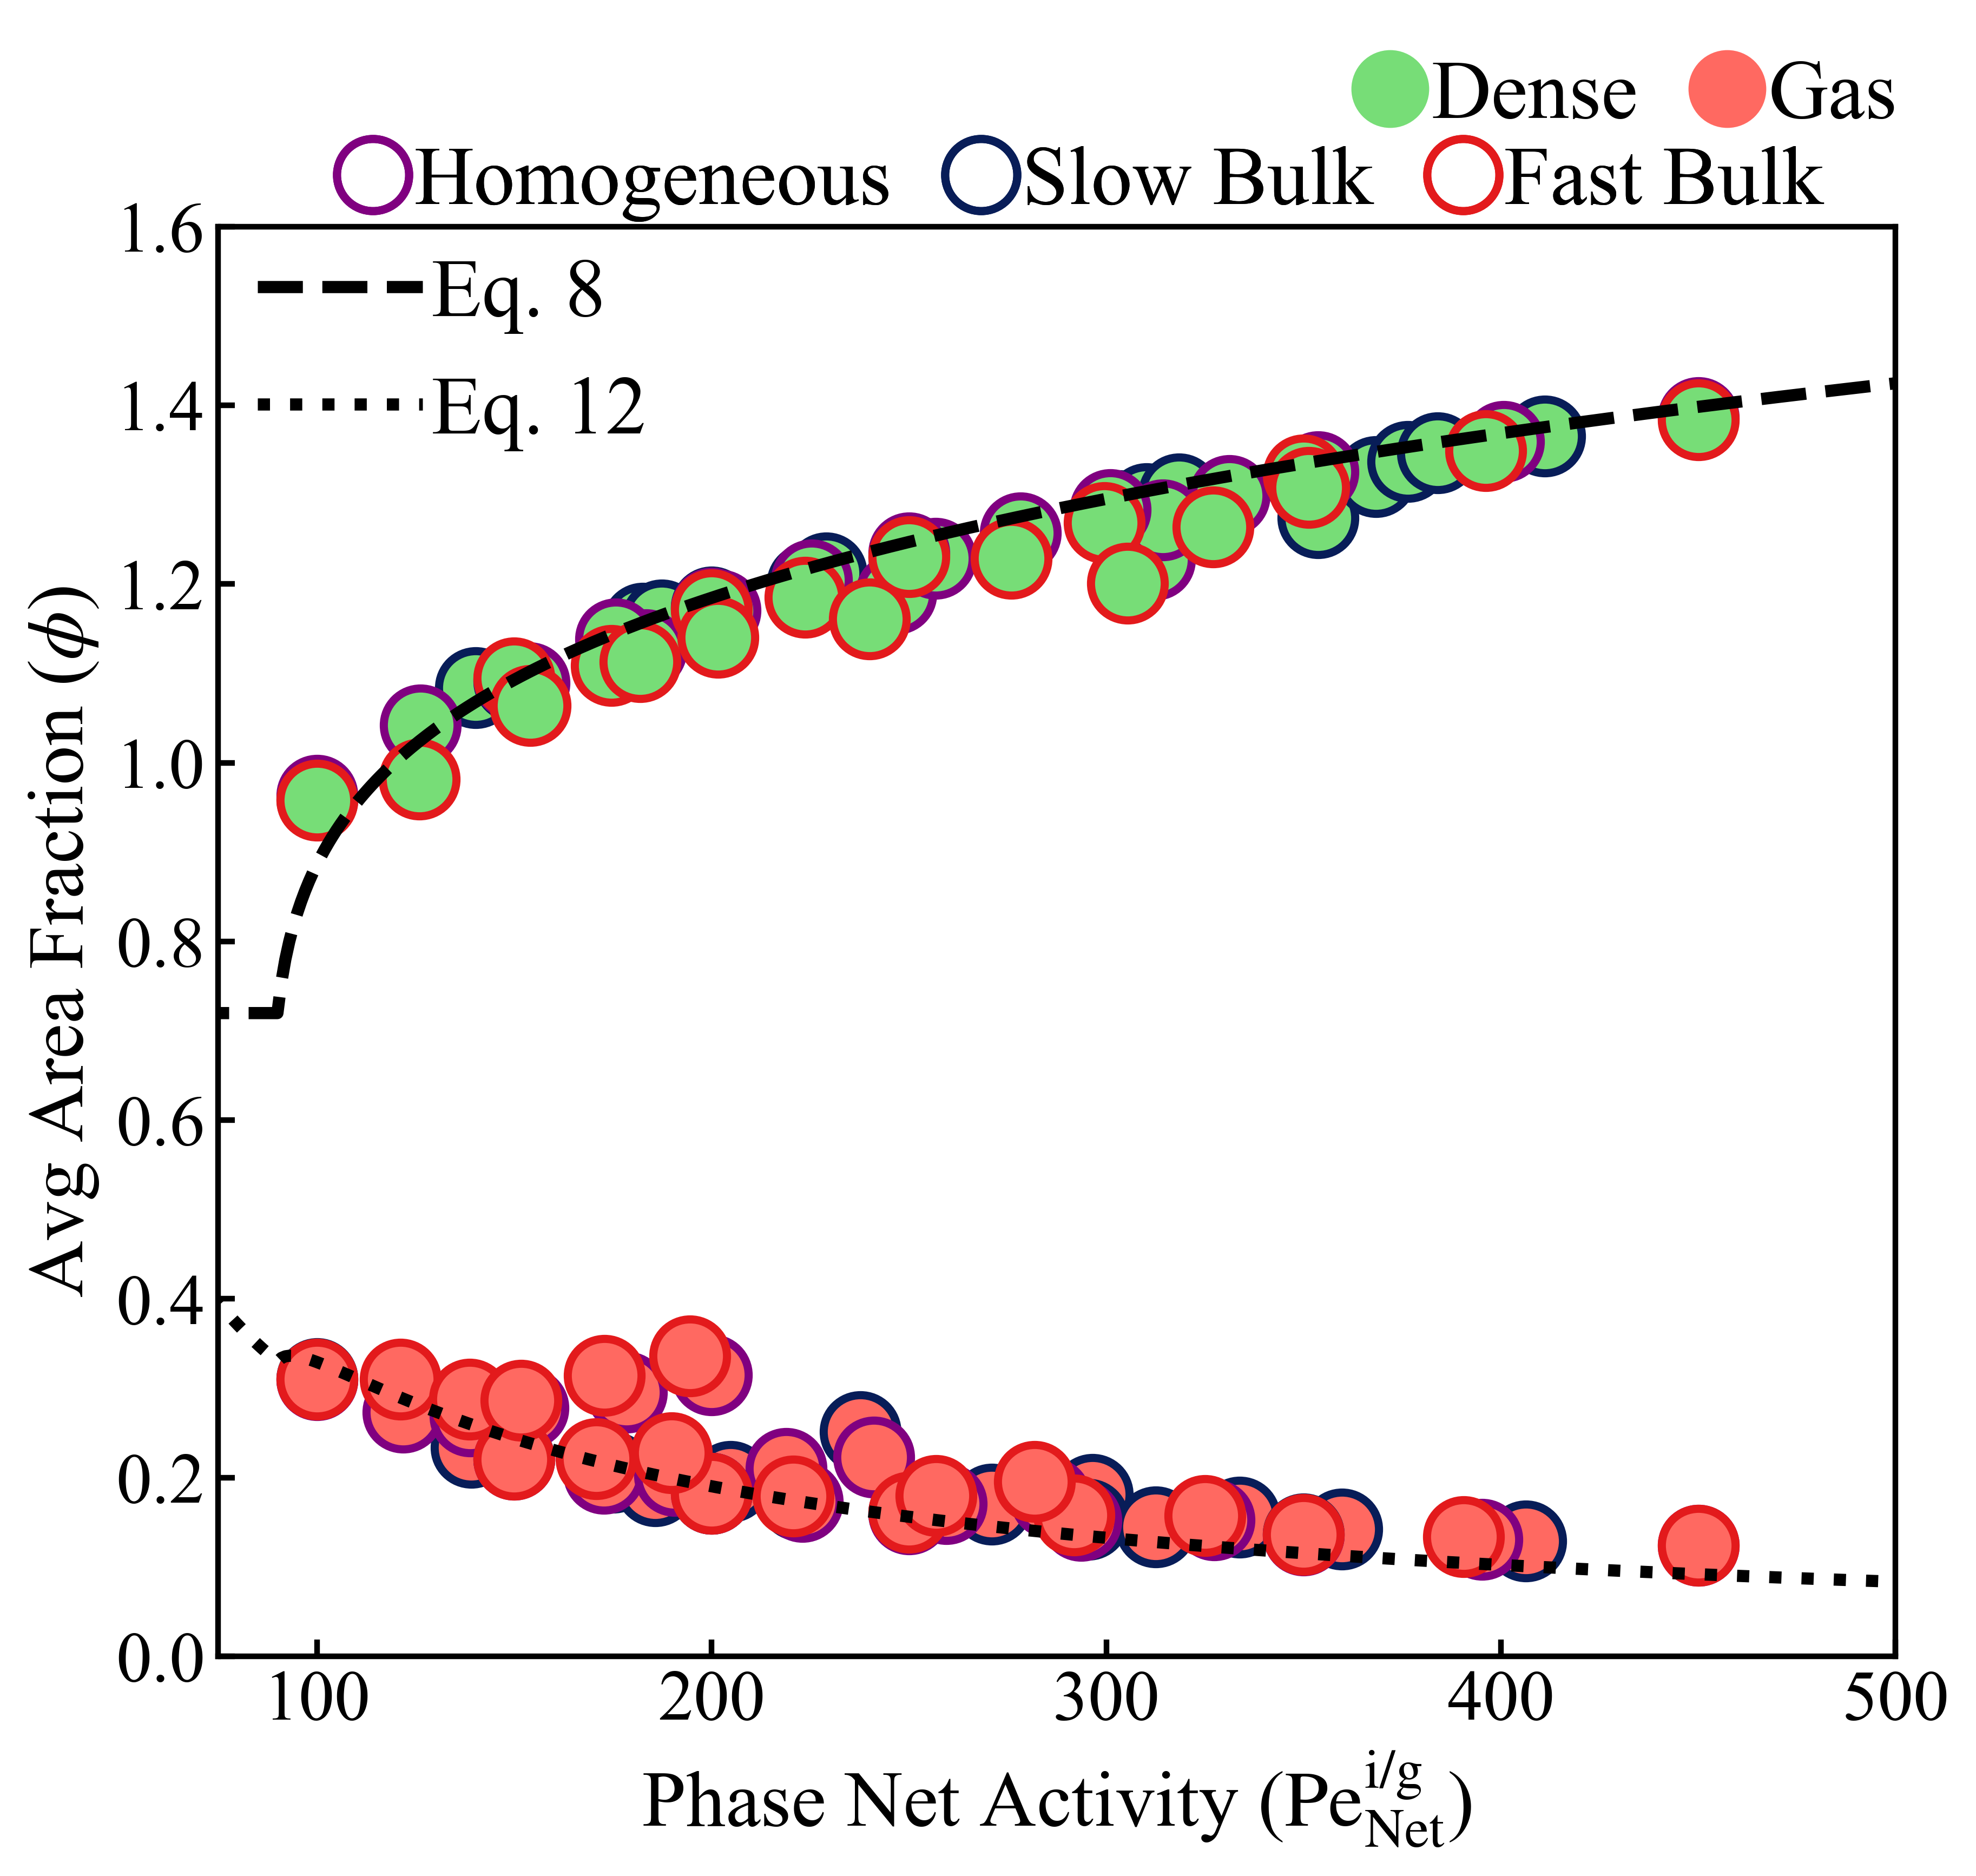

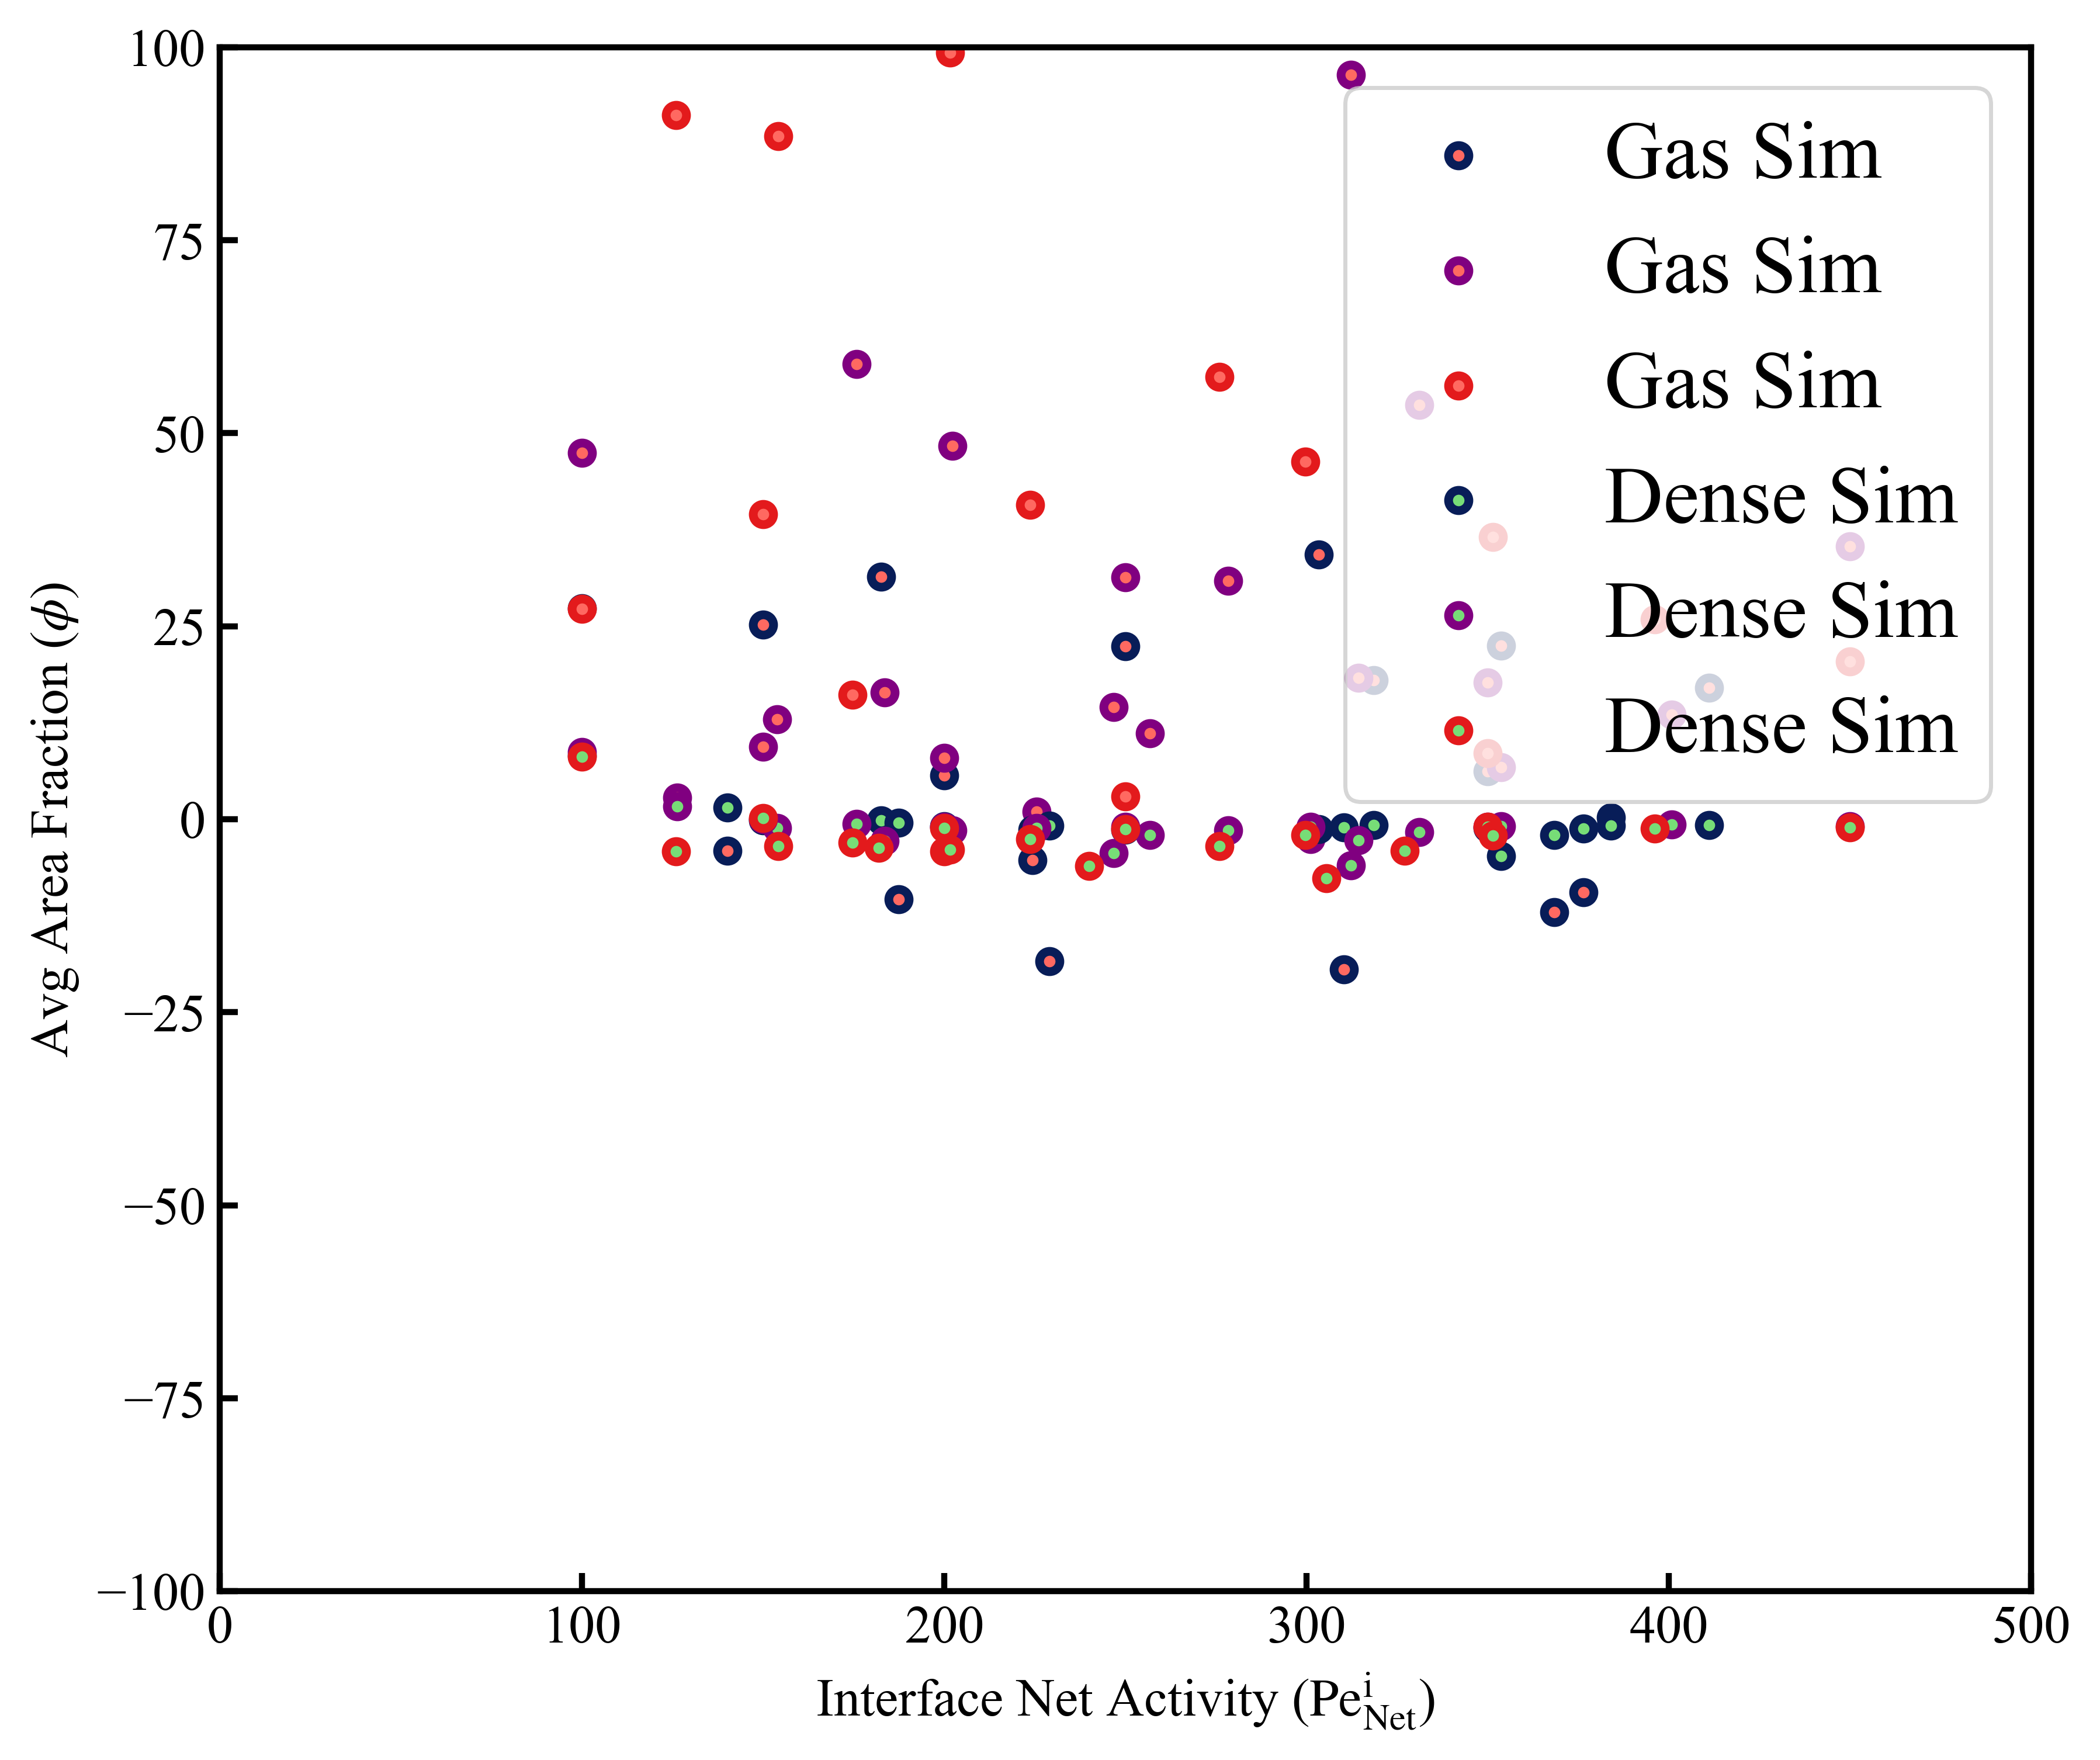

40.95774589404668
60.411876044113754
33.249670399710006
51.76083844275301
38.98964293883198
50.95003484704482
nan
nan


In [73]:
yellow = ("#fdfd96")
green = ("#77dd77")
red = ("#ff6961")
purple = ("#cab2d6")
print(len(int_pe_net))
print(len(avg_clust))

fast = np.where((interpart_type==0) & (interpart_peA >50))[0]
rand = np.where((interpart_type==1) & (interpart_peA >50))[0]
slow = np.where((interpart_type==2) & (interpart_peB >50))[0]
fig, ax1 = plt.subplots(figsize=(8,7))
fast_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor='purple',
                      markerfacecolor='None', 
                      label='Homogeneous', markersize=(2.4*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=slowCol,
                      markerfacecolor='None', 
                      label='Slow Bulk', markersize=(2.4*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=fastCol,
                      markerfacecolor='None', 
                      label='Fast Bulk', markersize=(2.4*msz * mkSz[0])))

#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, clust_theory2, color='black', linestyle='dashed', linewidth=1.8*1.8)

plt.scatter(int_pe_net[fast], avg_clust[fast], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[rand], avg_clust[rand], edgecolor='purple',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[slow], avg_clust[slow], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 50000])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Cluster Size ($N_\mathrm{d}$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 13', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

two_leg = ax1.legend(handles=fast_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.5, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(two_leg)


plt.show()




fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, width_theory2, color='black', linestyle='dashed', linewidth=1.8*1.8)
plt.scatter(int_pe_net[fast], avg_width[fast], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2,s=msz*55*0.7)
plt.scatter(int_pe_net[rand], avg_width[rand], edgecolor='purple',facecolor=green,  linewidth = 1.8*1.2,s=msz*55*0.7)
plt.scatter(int_pe_net[slow], avg_width[slow], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2,s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 35])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Interface Width ($h$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 13', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)


two_leg = ax1.legend(handles=fast_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.5, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(two_leg)

plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, width_theory2, color='black', linestyle='dashed', linewidth=1.8*1.8)

plt.scatter(interpart_peA[fast], avg_width[fast], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(interpart_peA[rand], avg_width[rand], edgecolor='purple',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(interpart_peB[slow], avg_width[slow], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 40])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Interface Width ($h$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Slow Activity ($\mathrm{Pe}_\mathrm{S}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 13', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

two_leg = ax1.legend(handles=fast_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.5, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(two_leg)


plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, lat_theory_mean_int_theory, color='black', linestyle='dashed', linewidth=1.8*1.8)

plt.scatter(int_pe_net[fast], all_lat_time_mean[fast], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[rand], all_lat_time_mean[rand], edgecolor='purple',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[slow], all_lat_time_mean[slow], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 1.2])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Lattice Spacing ($a$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 13', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)


two_leg = ax1.legend(handles=fast_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.5, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(two_leg)

plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, rad_theory2, color='black', linestyle='dashed', linewidth=1.8*1.8)

plt.scatter(int_pe_net[fast], avg_rad[fast], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[rand], avg_rad[rand], edgecolor='purple',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[slow], avg_rad[slow], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 120])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Cluster Radius ($r_\mathrm{c}$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 15', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)


two_leg = ax1.legend(handles=fast_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.5, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(two_leg)

plt.show()
    
fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.plot(gas_pe_net_gas, phi_gas_theory, color='black', linestyle='dotted', linewidth=1.8*1.8)

plt.plot(int_pe_net_theory, phi_gas_theory2, color='black', linestyle='dotted', linewidth=1.8*1.8)

plt.scatter(gas_pe_net[fast], phi_gas_sim[fast], edgecolor=slowCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
plt.scatter(gas_pe_net[rand], phi_gas_sim[rand], edgecolor='purple',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
plt.scatter(gas_pe_net[slow], phi_gas_sim[slow], edgecolor=fastCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

plt.scatter(int_pe_net[fast], avg_area2[fast] * (np.pi/4), edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
plt.scatter(int_pe_net[rand], avg_area2[rand] * (np.pi/4), edgecolor='purple',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
plt.scatter(int_pe_net[slow], avg_area2[slow] * (np.pi/4), edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 1.6])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Avg Area Fraction ($\phi$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Phase Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i/g}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Dense', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=red,
                      markerfacecolor=red,
                      label='Gas', markersize=(2.4*msz * mkSz[0])))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 8', markerfacecolor='none', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 12', markerfacecolor='none', markersize=msz, ls='dotted')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.09],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)

two_leg = ax1.legend(handles=fast_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.5, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(two_leg)


plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')

plt.scatter(int_pe_net[fast], 100*(phi_gas_sim[fast]-phi_gas_theory[fast])/phi_gas_theory[fast], edgecolor=slowCol,facecolor=red,  linewidth = 1.8*1.2, s=25.0, label='Gas Sim')
plt.scatter(int_pe_net[rand], 100*(phi_gas_sim[rand]-phi_gas_theory[rand])/phi_gas_theory[rand],edgecolor='purple',facecolor=red,  linewidth = 1.8*1.2, s=25.0, label='Gas Sim')
plt.scatter(int_pe_net[slow], 100*(phi_gas_sim[slow]-phi_gas_theory[slow])/phi_gas_theory[slow], edgecolor=fastCol,facecolor=red,  linewidth = 1.8*1.2, s=25.0, label='Gas Sim')

plt.scatter(int_pe_net[fast], 100*(avg_area2[fast] * (np.pi/4) - phi_dense_theory[fast])/phi_dense_theory[fast], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=25.0, label='Dense Sim')
plt.scatter(int_pe_net[rand], 100*(avg_area2[rand] * (np.pi/4) - phi_dense_theory[rand])/phi_dense_theory[rand], edgecolor='purple',facecolor=green,  linewidth = 1.8*1.2, s=25.0, label='Dense Sim')
plt.scatter(int_pe_net[slow], 100*(avg_area2[slow] * (np.pi/4) - phi_dense_theory[slow])/phi_dense_theory[slow], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=25.0, label='Dense Sim')

ax1.set_xlim([0,500.0])
ax1.set_ylim([-100, 100])
plt.ylabel(r'Avg Area Fraction ($\phi$)')
plt.xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)')
plt.legend(loc = 'upper right')

plt.show()

error = 100*(phi_gas_sim-phi_gas_theory)/phi_gas_theory
avg_error = np.mean(error)
sumi=0
for i in range(0, len(error)):
    sumi+= (error[i]-avg_error)**2
std = (sumi/len(error))**0.5
print(avg_error)
print(std)

error = 100*(phi_gas_sim-phi_gas_theory3)/phi_gas_theory3
avg_error = np.mean(error)
sumi=0
for i in range(0, len(error)):
    sumi+= (error[i]-avg_error)**2
std = (sumi/len(error))**0.5
print(avg_error)
print(std)

error = 100*(phi_gas_sim-phi_gas_theory4)/phi_gas_theory4
avg_error = np.mean(error)
sumi=0
for i in range(0, len(error)):
    sumi+= (error[i]-avg_error)**2
std = (sumi/len(error))**0.5
print(avg_error)
print(std)

error = 100*(phi_gas_sim-phi_gas_theory5)/phi_gas_theory5
avg_error = np.mean(error)
sumi=0
for i in range(0, len(error)):
    sumi+= (error[i]-avg_error)**2
std = (sumi/len(error))**0.5
print(avg_error)
print(std)







In [ ]:

for x in range(0, len(int_pe_net_theory2)):
    print(x)
    for y in range(0, len(int_pe_net_theory2)):
        if int_pe_net_theory2[x]<= int_pe_net_theory2[y]:
            int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])+1))
            
            for z in range(0, len(int_pe_net_theory_temp)):
                
                lat_theory_mean_int_val = conForRClust(int_pe_net_theory_temp[z]-50, 1.0)
                phi_dense_val = phi_cp / lat_theory_mean_int_val**2 
                phi_gas_val = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int_val * int_pe_net_theory_temp[z]) ** (-1))

                clust_val = 50000* (((phi_gas_val-0.6)*phi_dense_val)/(0.6*(phi_gas_val-phi_dense_val)))
                press_val = (int_pe_net_theory_temp[z]-50) * 2 * np.sqrt(3) * 1.874 /lat_theory_mean_int_val
                rad_val =  ((clust_val / (4*phi_cp))**0.5) * lat_theory_mean_int_val
                width_val = (np.sqrt(3)/(2*0.5)) * (press_val/int_pe_net_theory_temp[z]) * lat_theory_mean_int_val**2 * 3.0
                peNet = 0.5 * float(int_pe_net_theory2[x]) + 0.5 * float(int_pe_net_theory2[y])
                #int_pe_net_val = 

                dens_temp = densProbability(radius_arr_temp, peNet, int_pe_net_theory2[x])
                align_temp = alignProbability(radius_arr_temp, peNet, int_pe_net_theory2[x])

                press = dens_temp * align_temp * int_pe_net_theory_temp[z]
                press_int = 0
                for m in range(1, len(press)):
                    press_int += ((press[m-1]+press[m])/2)*(radius_arr_temp[m]-radius_arr_temp[m-1]) * rad_val
                press_theory_val_arr = np.append(press_theory_val_arr, press_int)
                int_pe_net_theory_arr = np.append(int_pe_net_theory_arr, int_pe_net_theory_temp[z])

int_pe_net_final_arr = np.array([])
press_theory_max_arr = np.array([])
press_theory_min_arr = np.array([])
for z in range(0, len(int_pe_net_theory_arr)):
    if int_pe_net_theory_arr[z] not in int_pe_net_final_arr:
        loc = np.where(int_pe_net_theory_arr==int_pe_net_theory_arr[z])[0]
        press_theory_max_arr = np.append(press_theory_max_arr, np.max(press_theory_val_arr[loc]))
        press_theory_min_arr = np.append(press_theory_min_arr, np.min(press_theory_val_arr[loc]))
        int_pe_net_final_arr = np.append(int_pe_net_final_arr, int_pe_net_theory_arr[z])

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.plot(int_pe_net, avg_int_theory_arr, color='black', linestyle='dotted', linewidth=1.8*1.8)
ax1.fill_between(int_pe_net_final_arr, press_theory_min_arr, press_theory_max_arr, color='black', alpha=0.2)

plt.scatter(int_pe_net[fast], align_press_arr[fast], edgecolor=fastCol,facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[rand], align_press_arr[rand], edgecolor='purple',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[slow], align_press_arr[slow], edgecolor=slowCol,facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
plt.plot(int_pe_net_theory, press_theory2, color='black', linestyle='--', linewidth=1.8*1.8)
plt.plot(int_pe_net_final_arr, press_theory_min_arr, linestyle='dotted', color='black', linewidth=1.8*1.8)
plt.plot(int_pe_net_final_arr, press_theory_max_arr, linestyle='dotted', color='black', linewidth=1.8*1.8)
plt.scatter(int_pe_net[fast], interpart_press[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
plt.scatter(int_pe_net[rand], interpart_press[rand], edgecolor='purple',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
plt.scatter(int_pe_net[slow], interpart_press[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 4500])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Bulk', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=yellow,
                      markerfacecolor=yellow,
                      label='Interface', markersize=(2.4*msz * mkSz[0])))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 17', markerfacecolor='dashed', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 26', markerfacecolor='dotted', markersize=msz, ls='dotted')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.09],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)

two_leg = ax1.legend(handles=fast_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.5, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(two_leg)


plt.show()

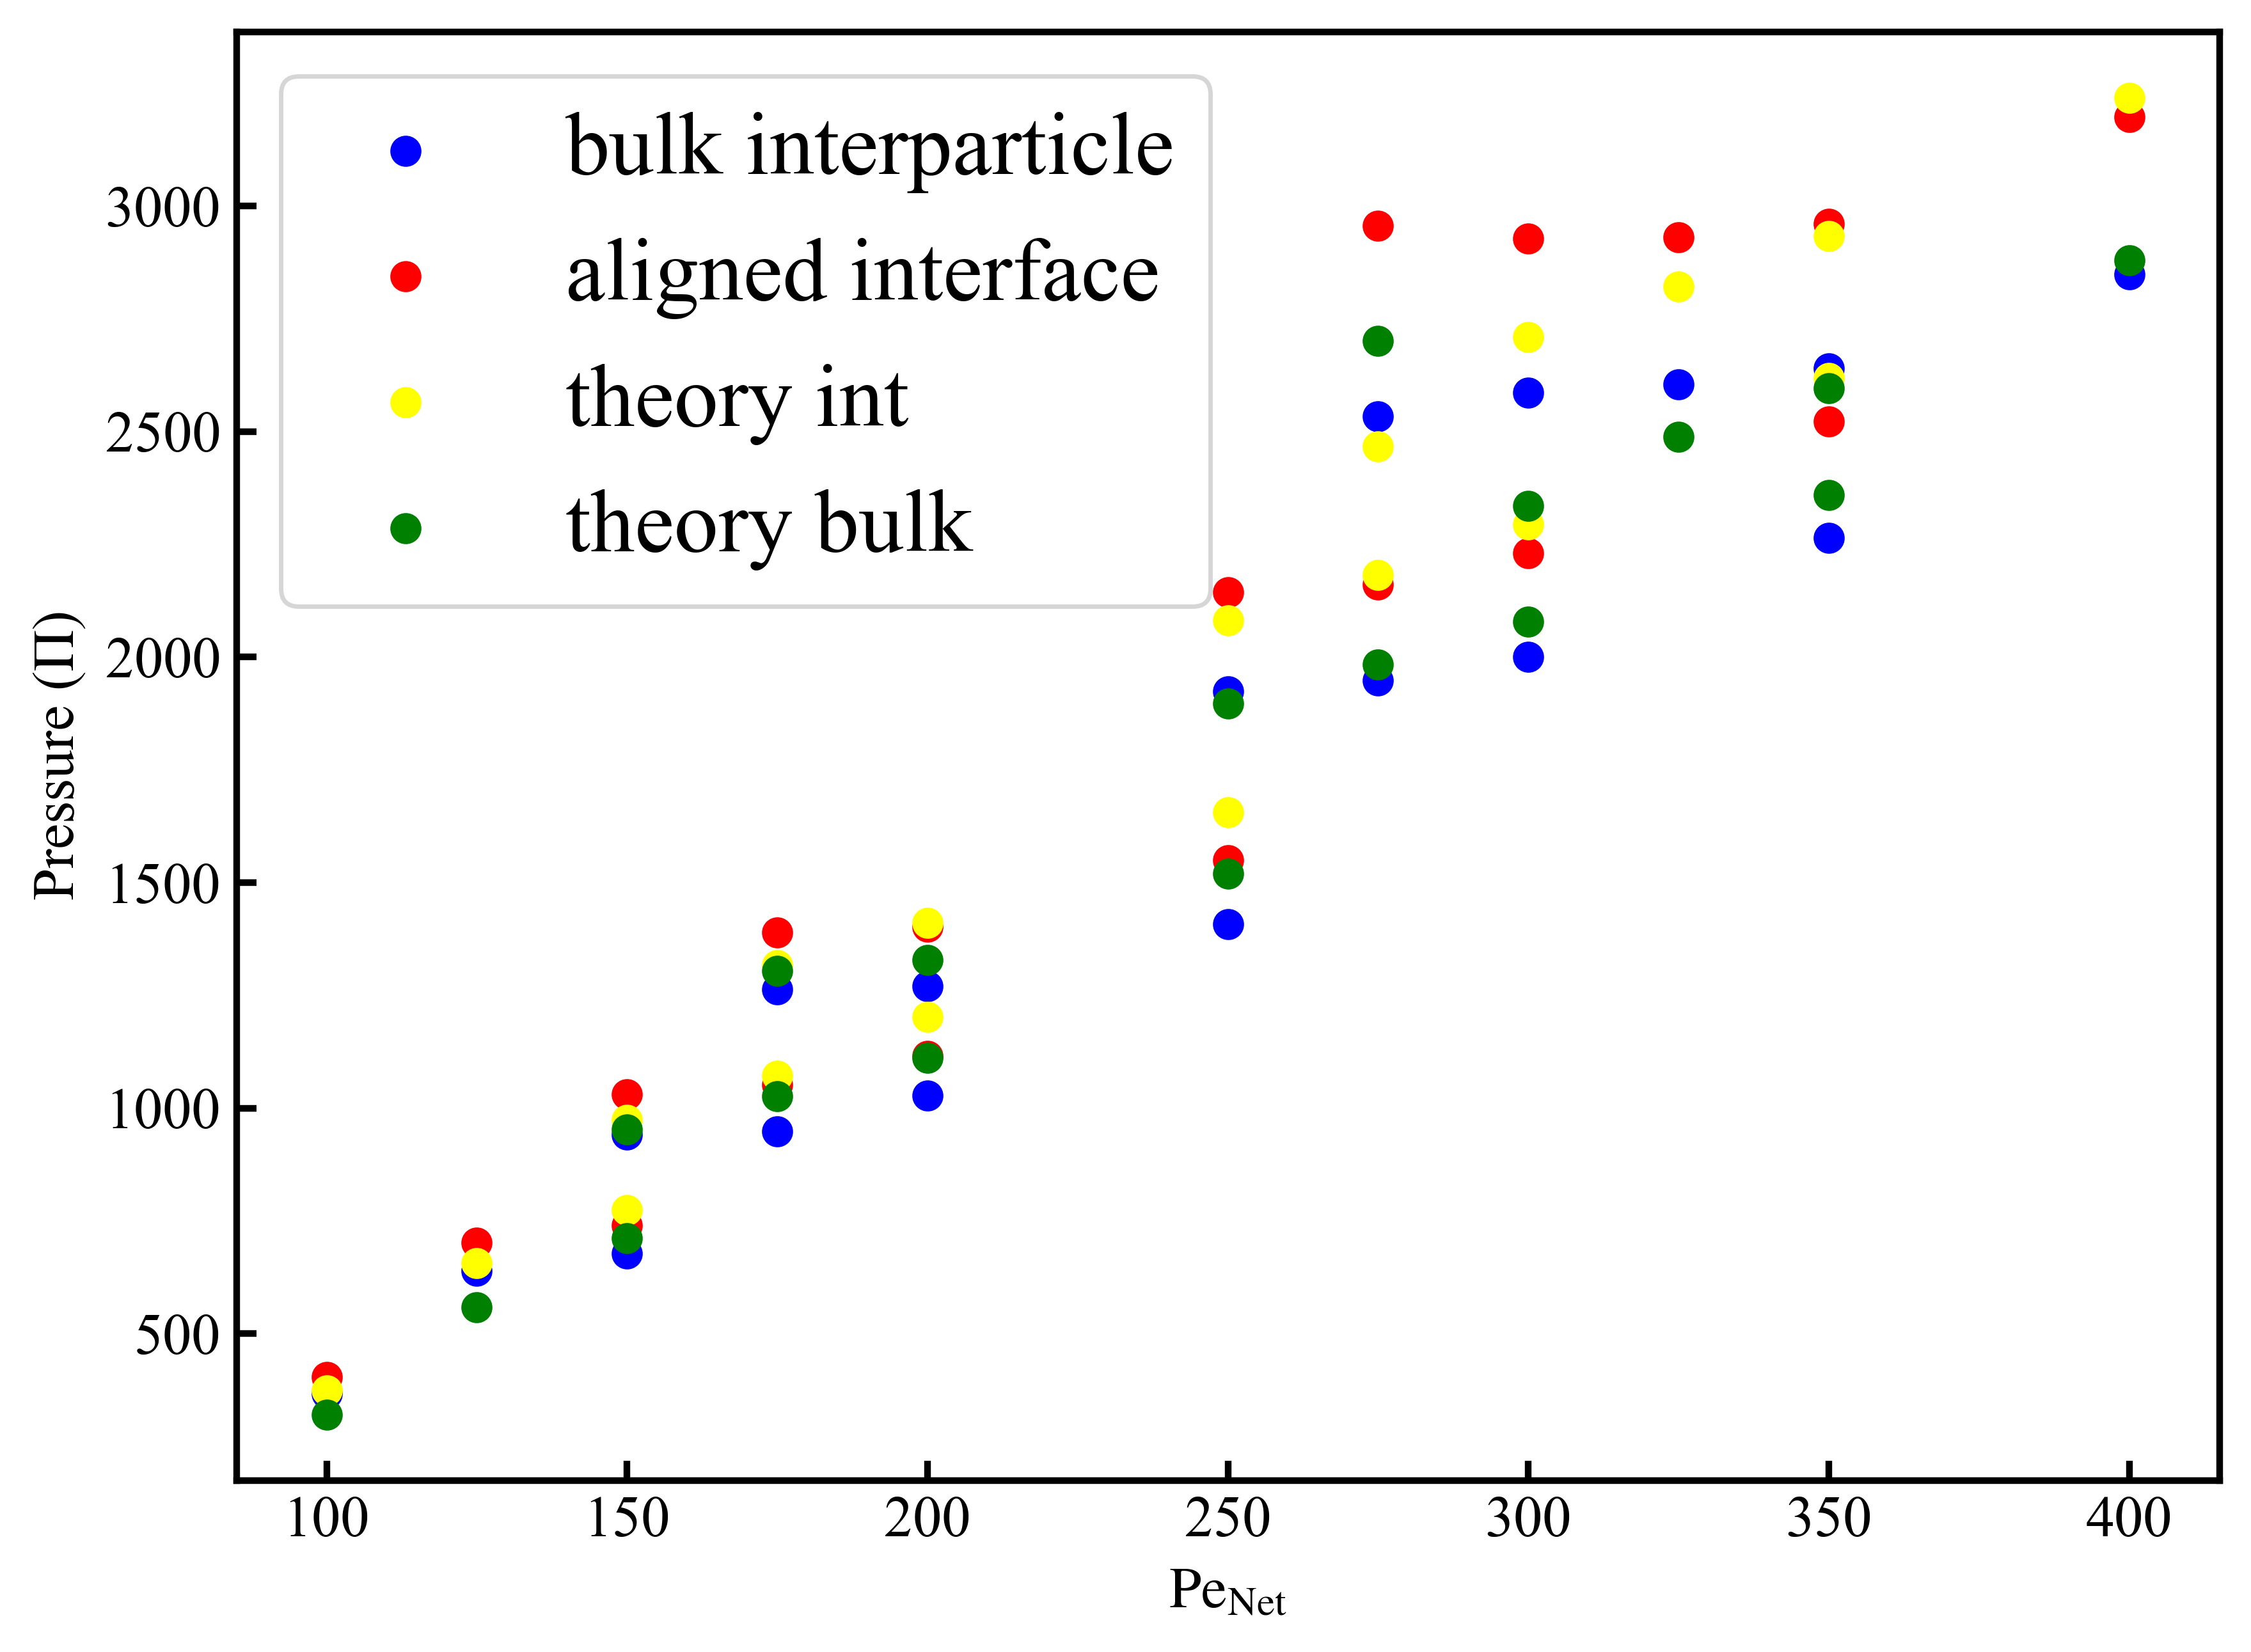

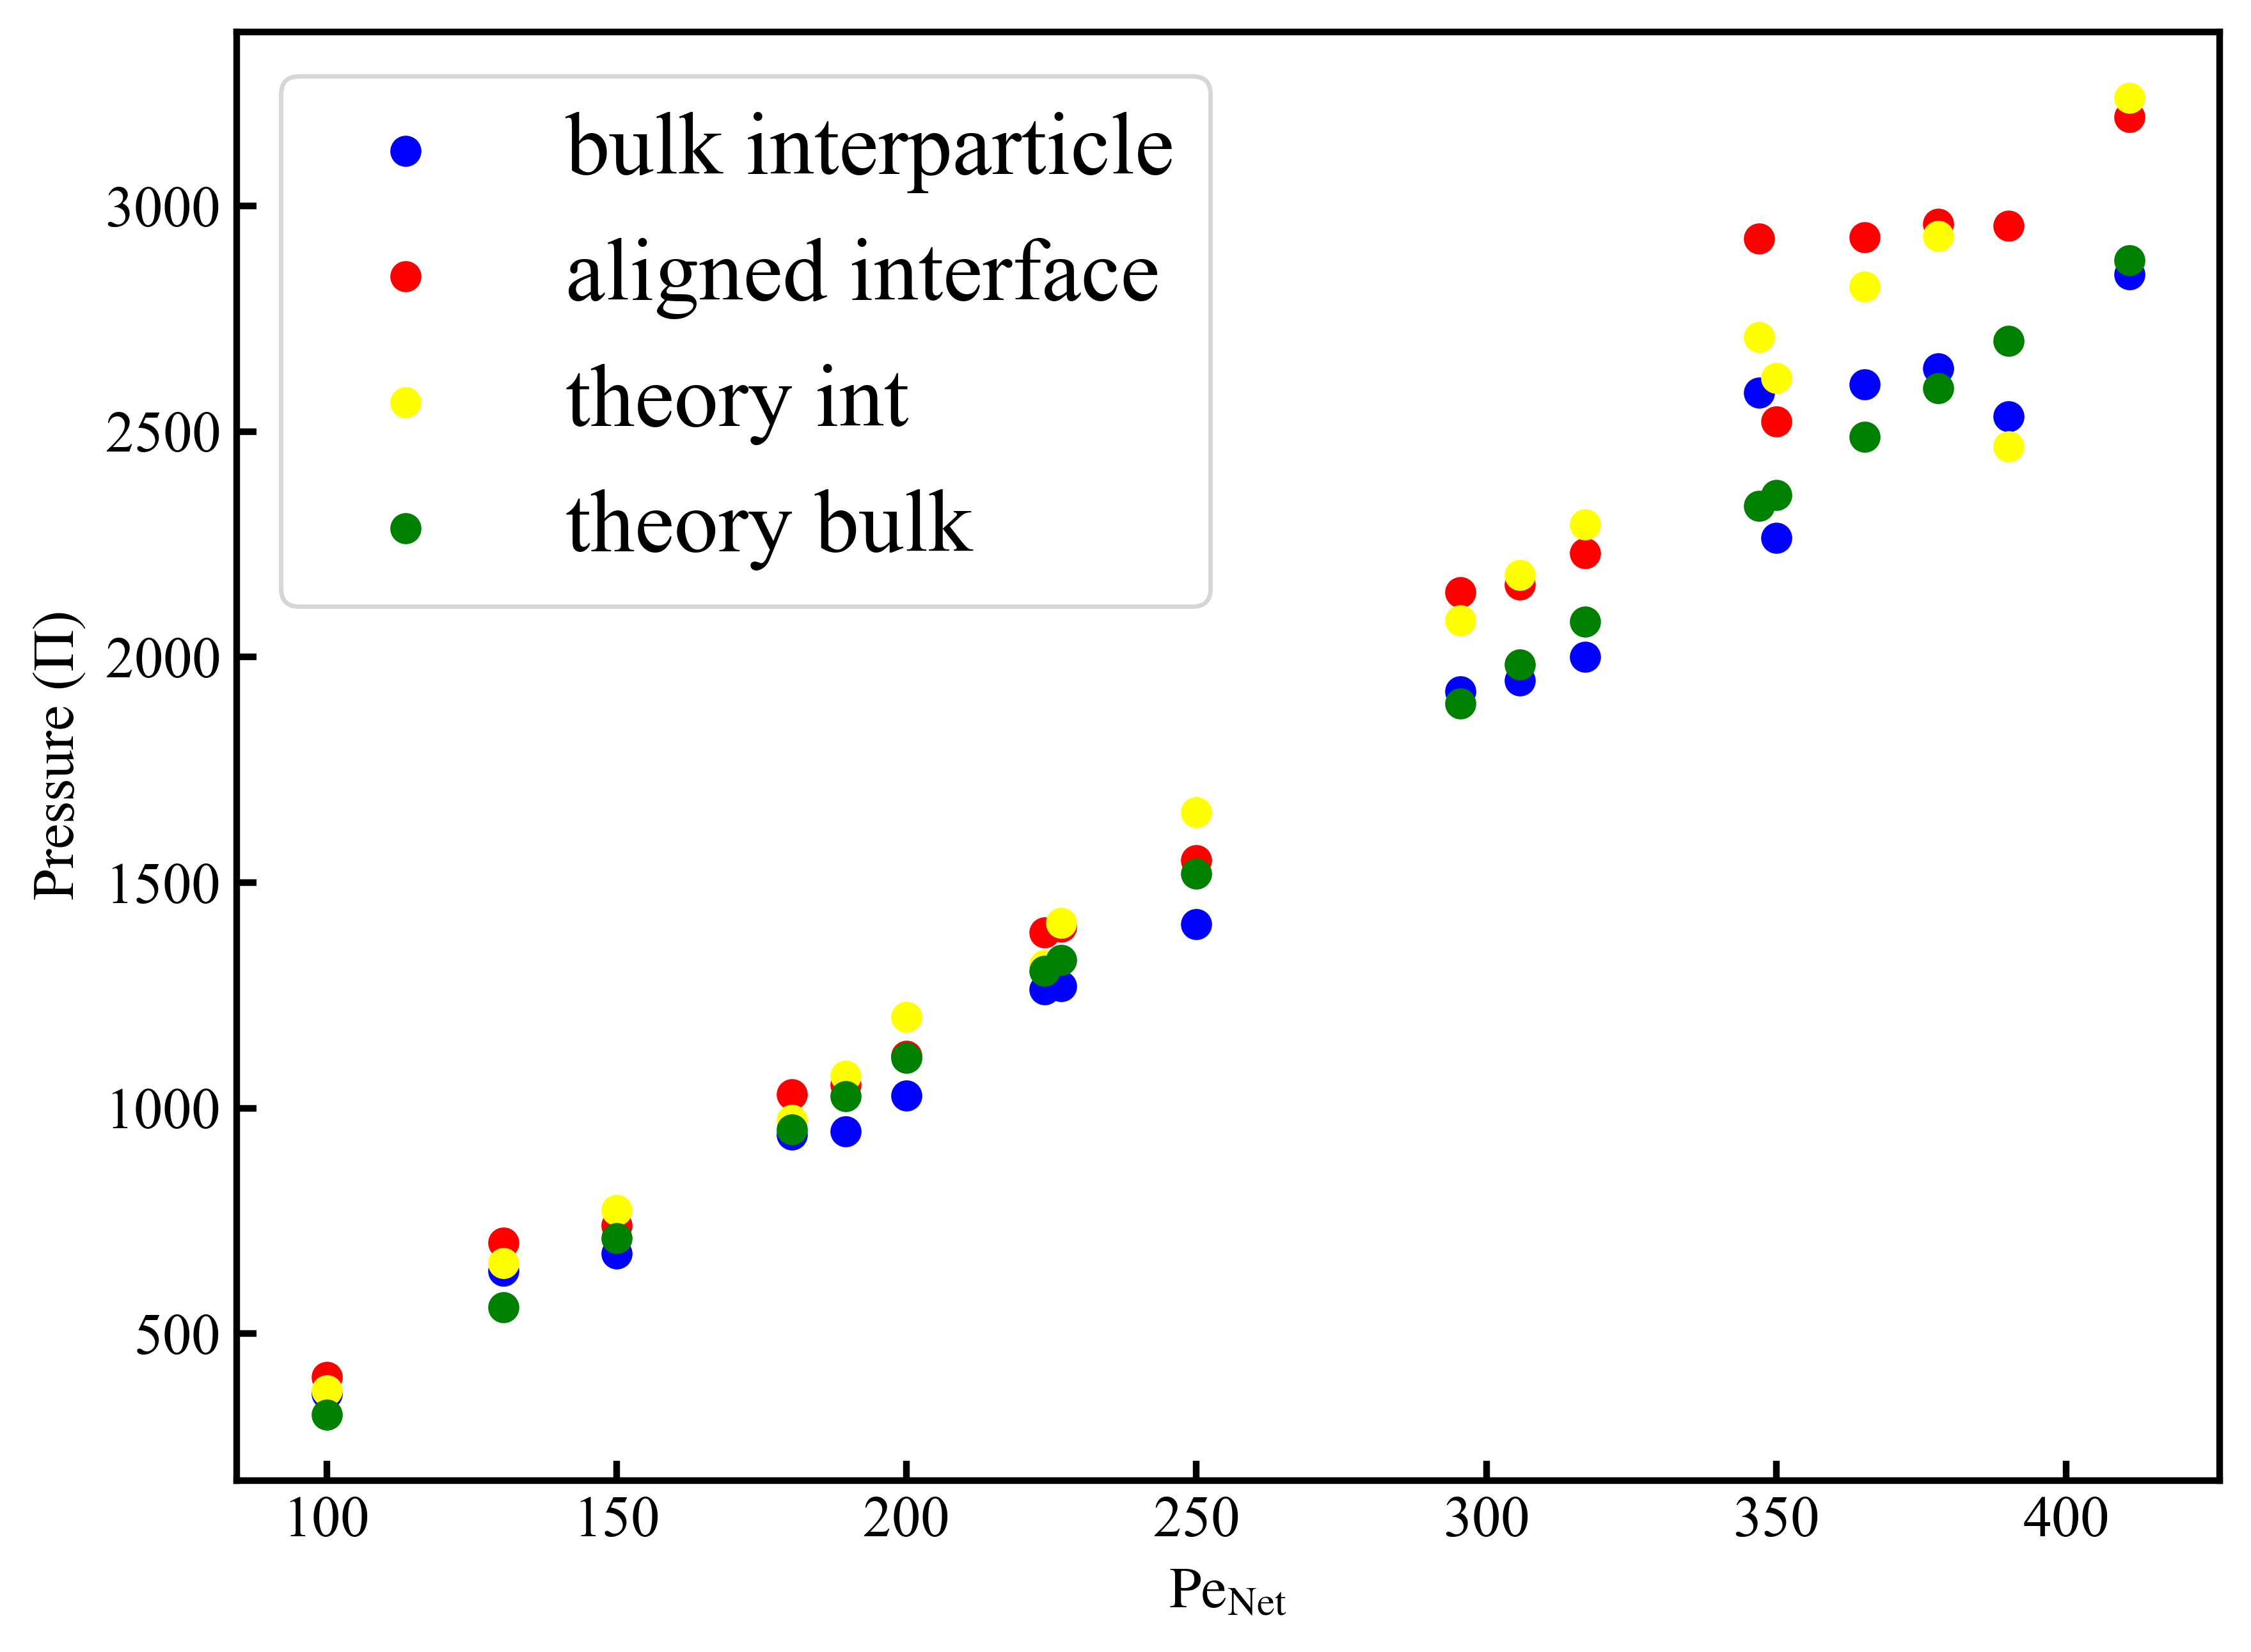

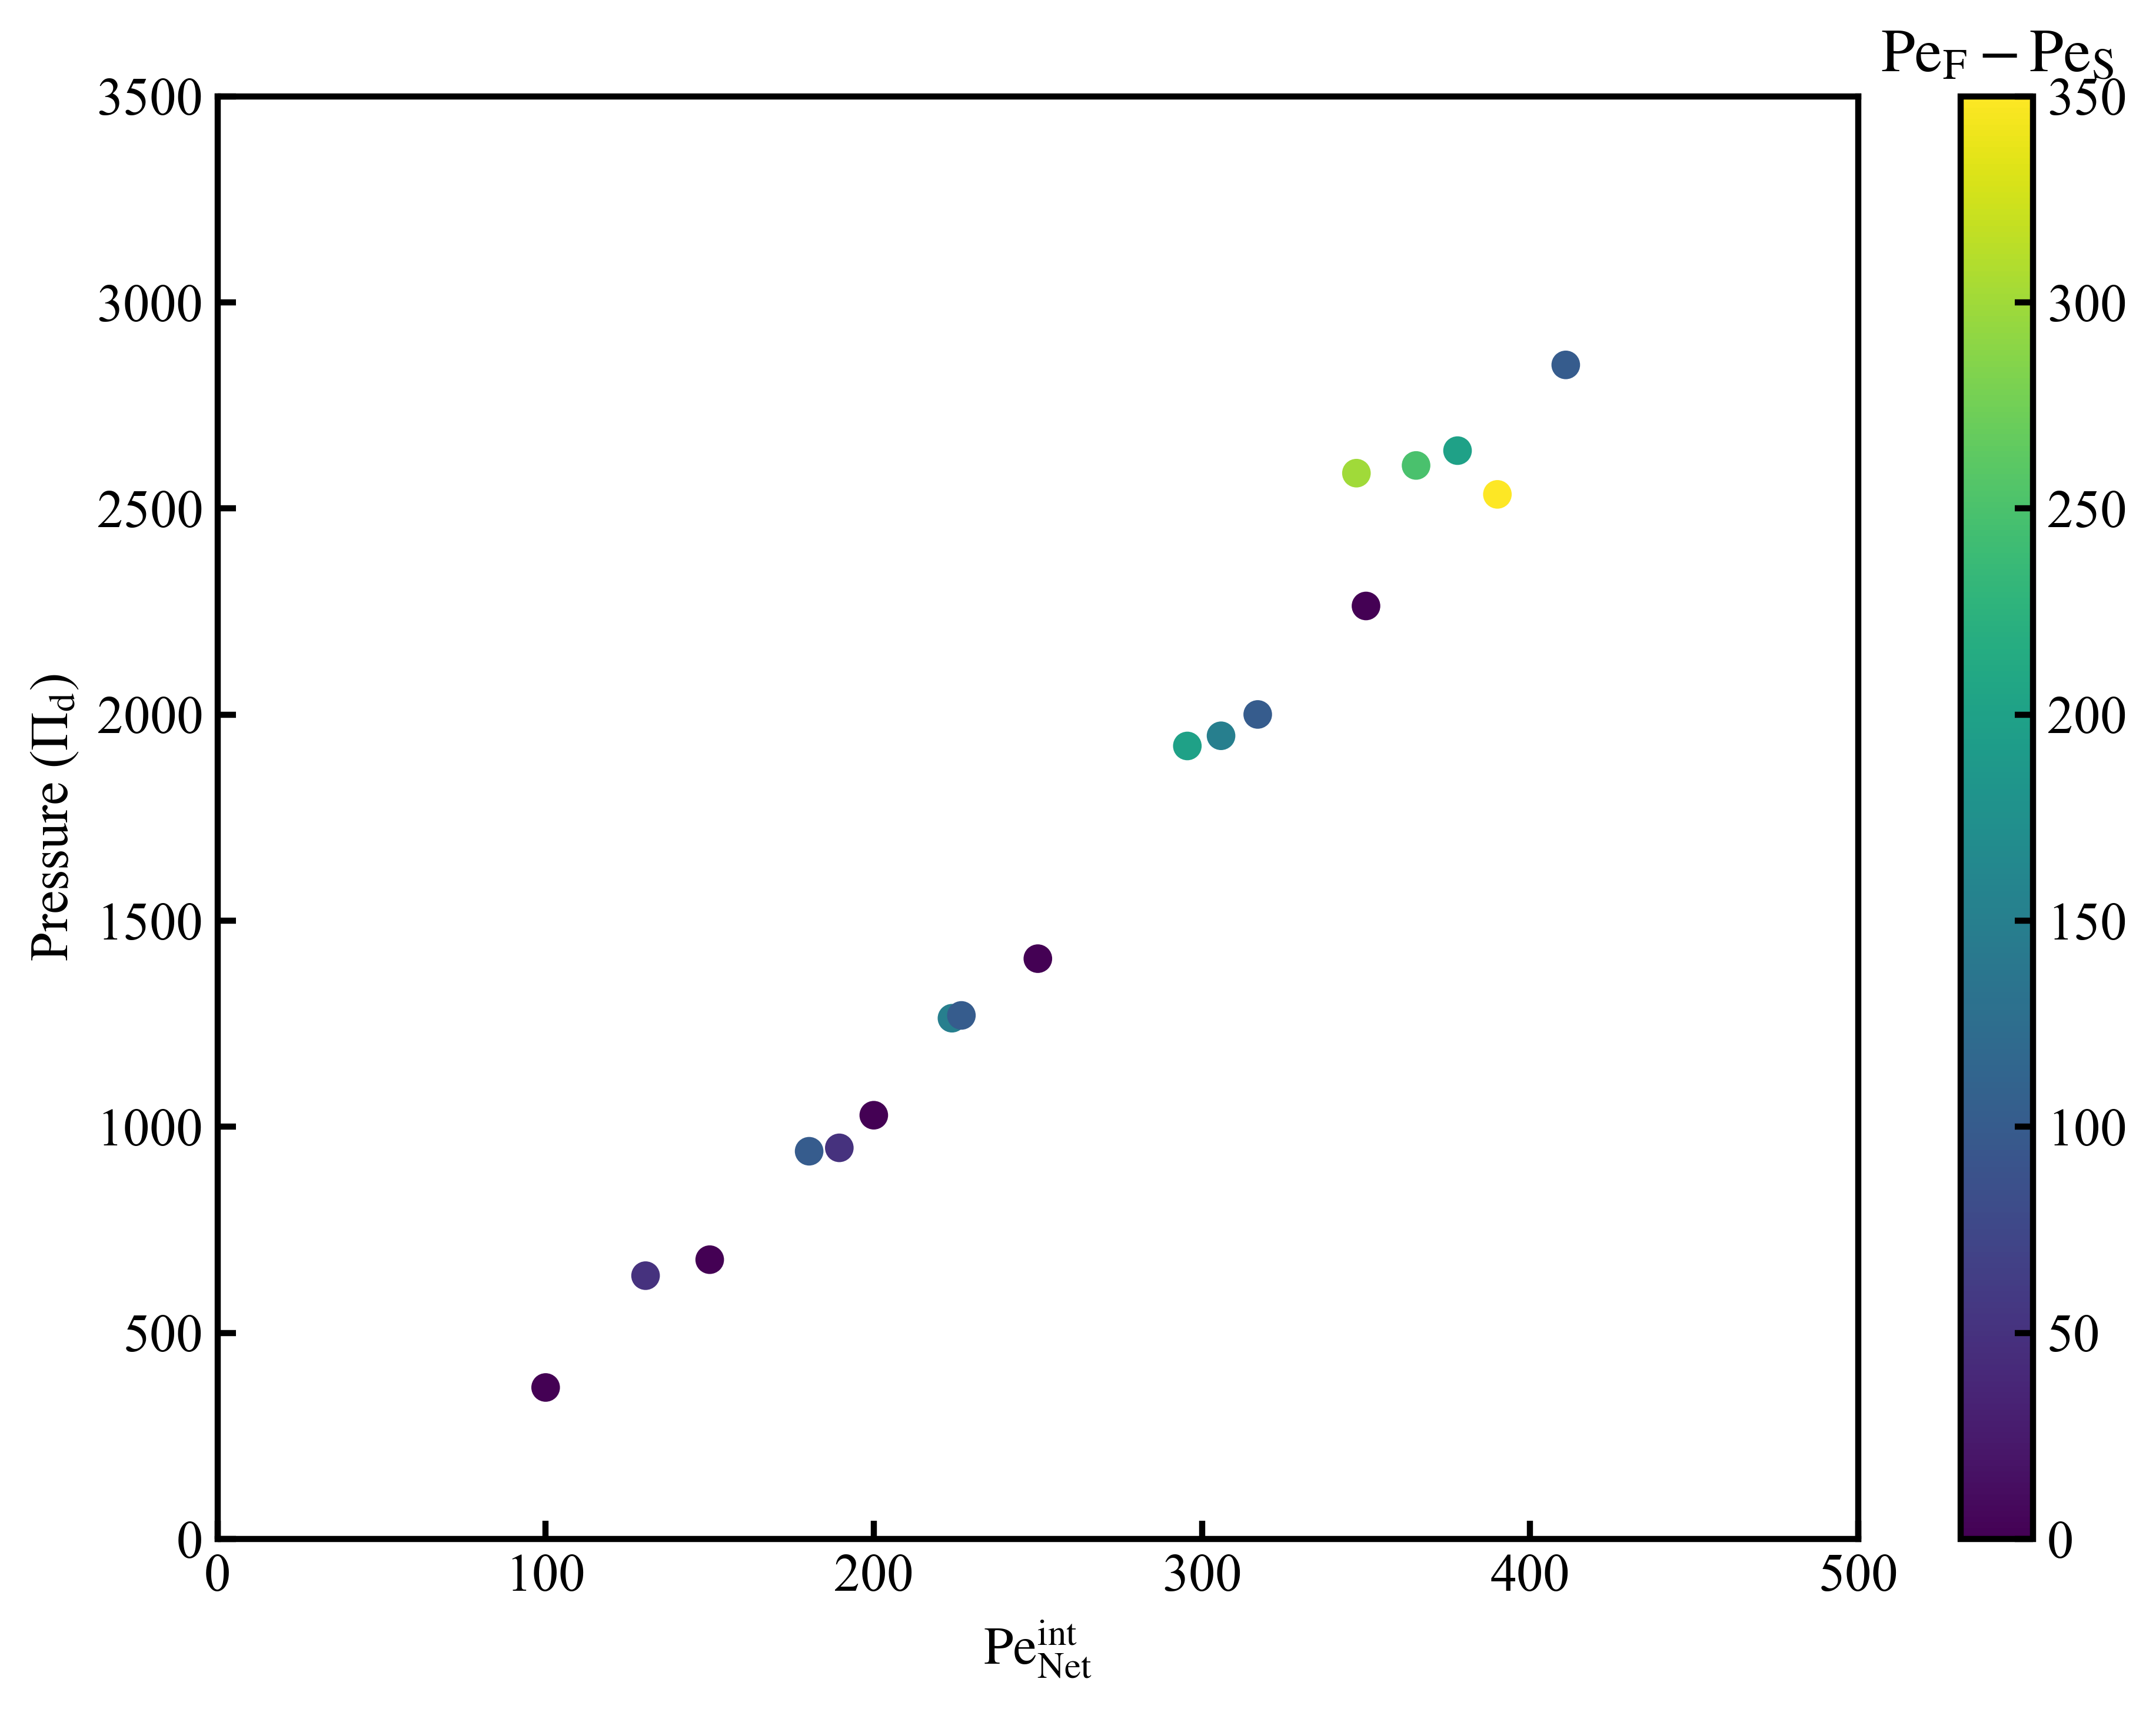

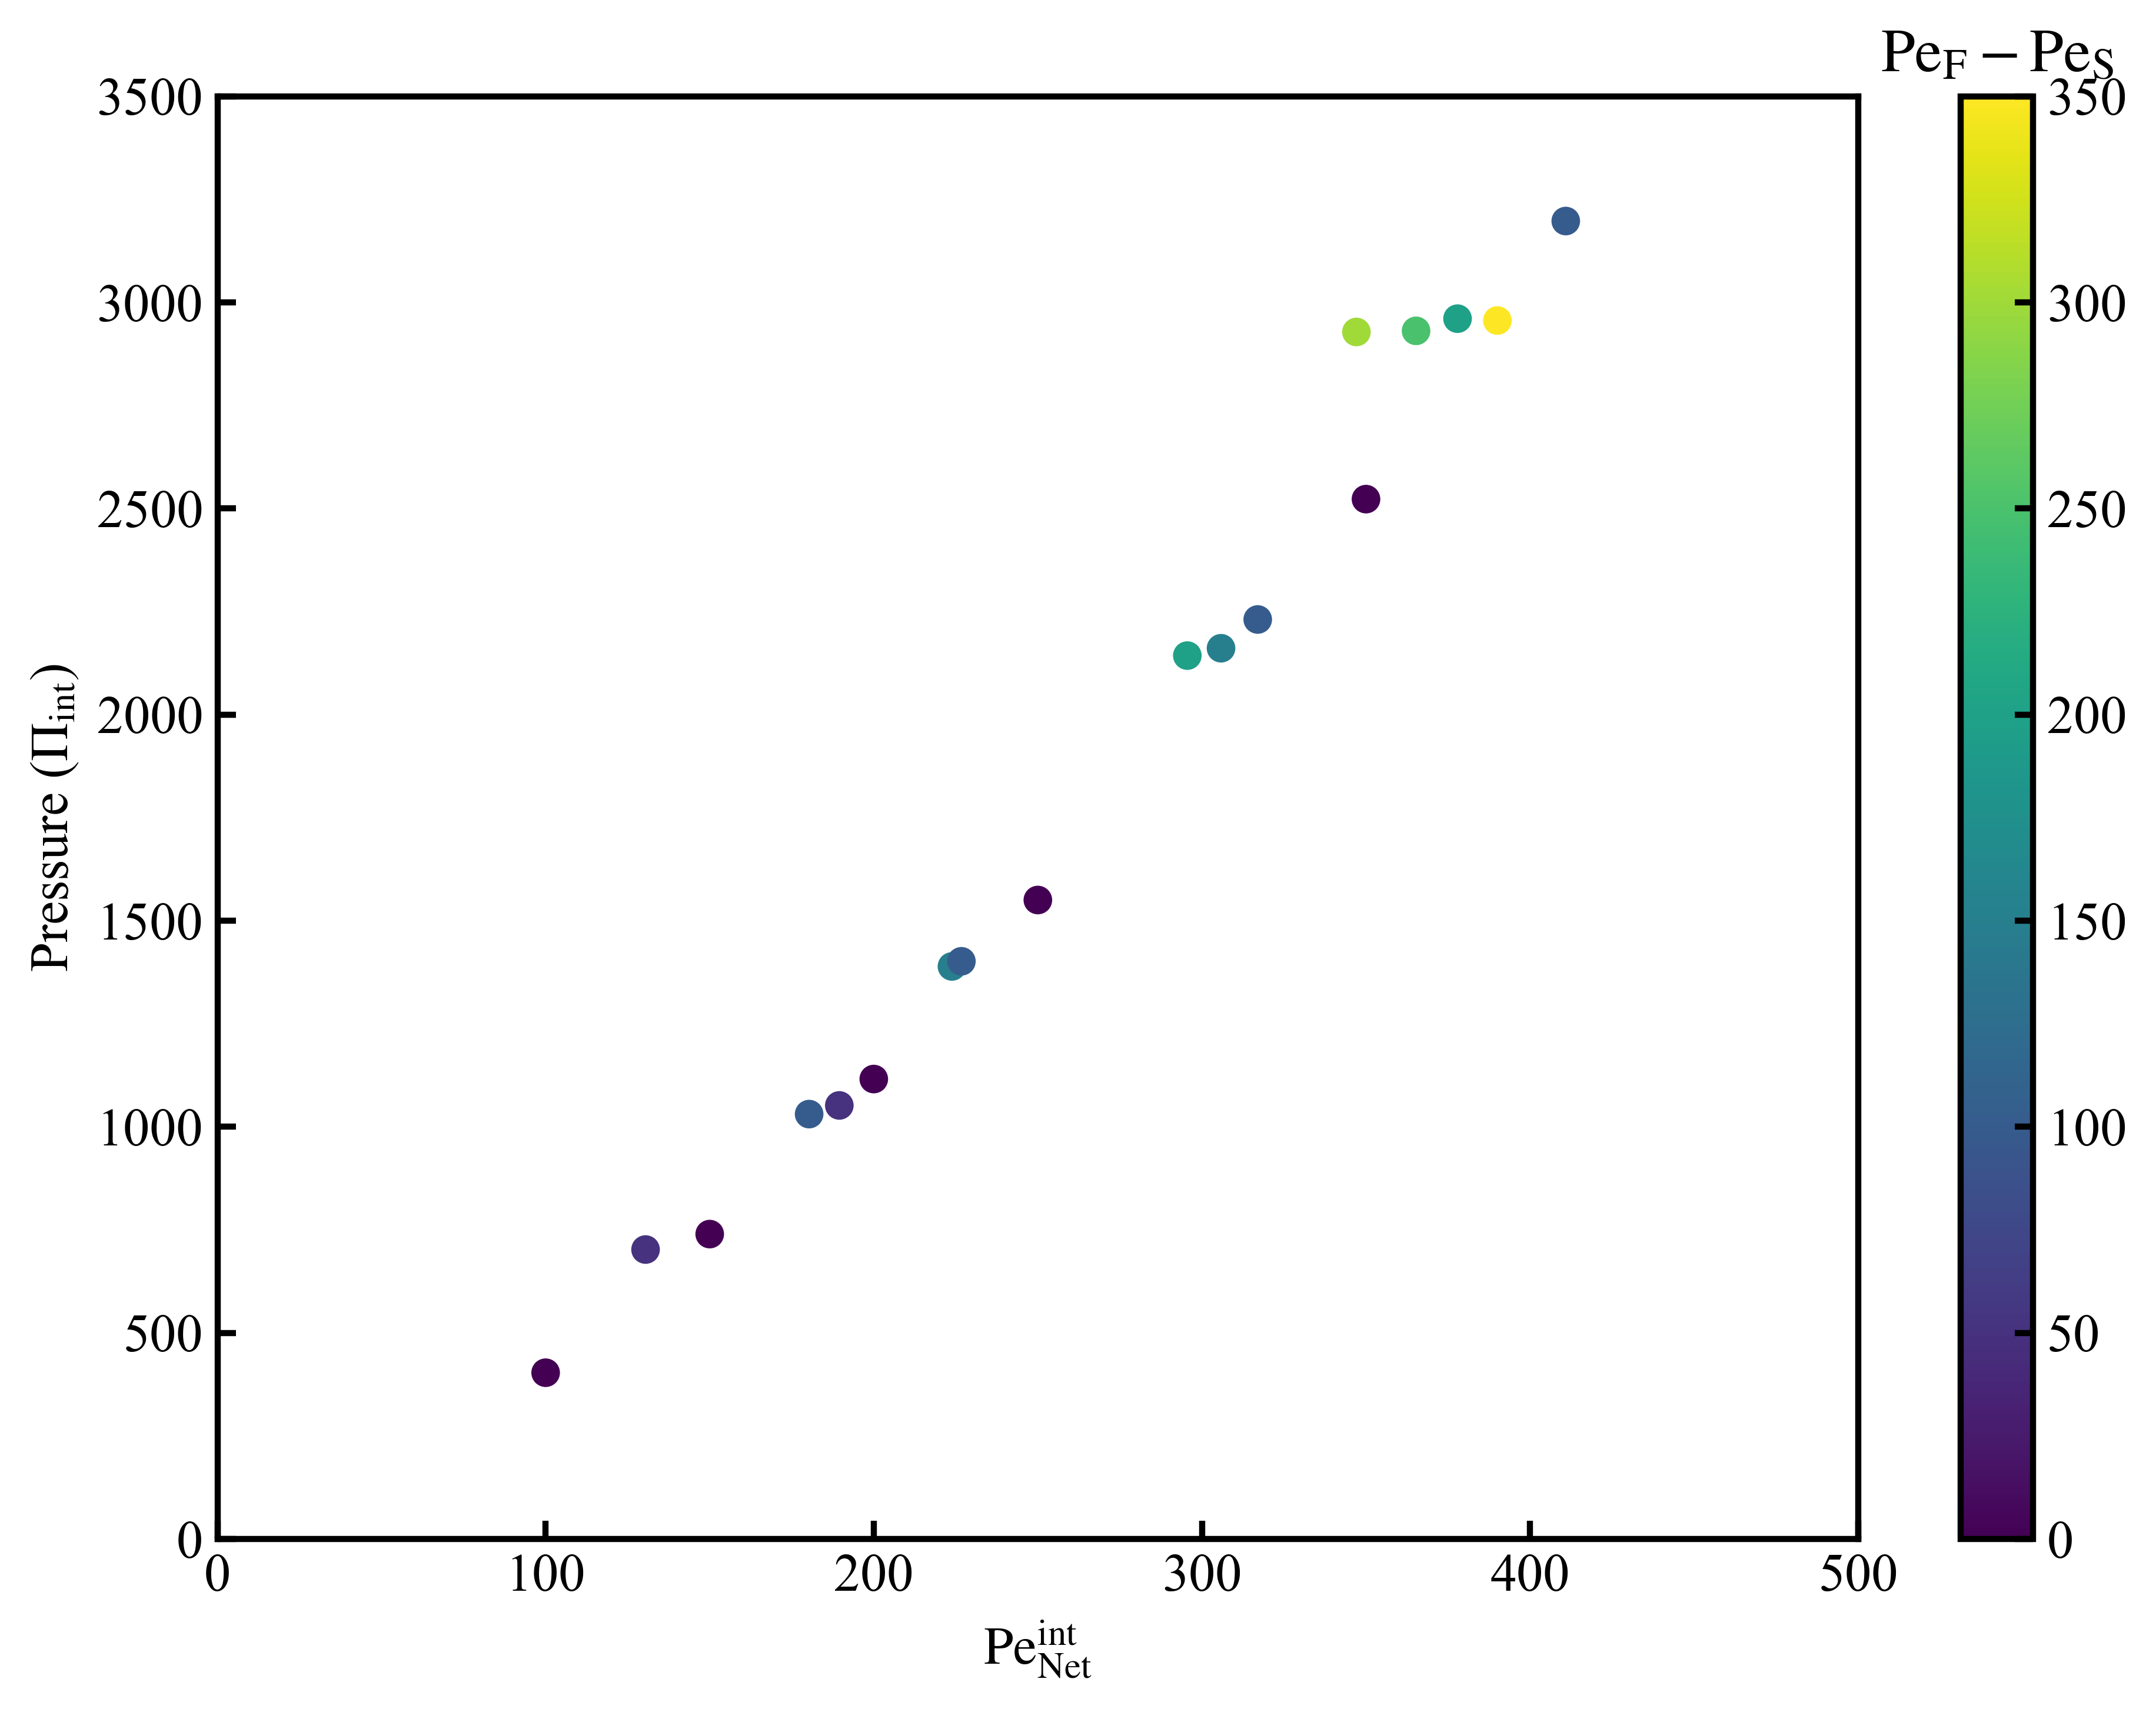

TypeError: 'AxesSubplot' object is not subscriptable

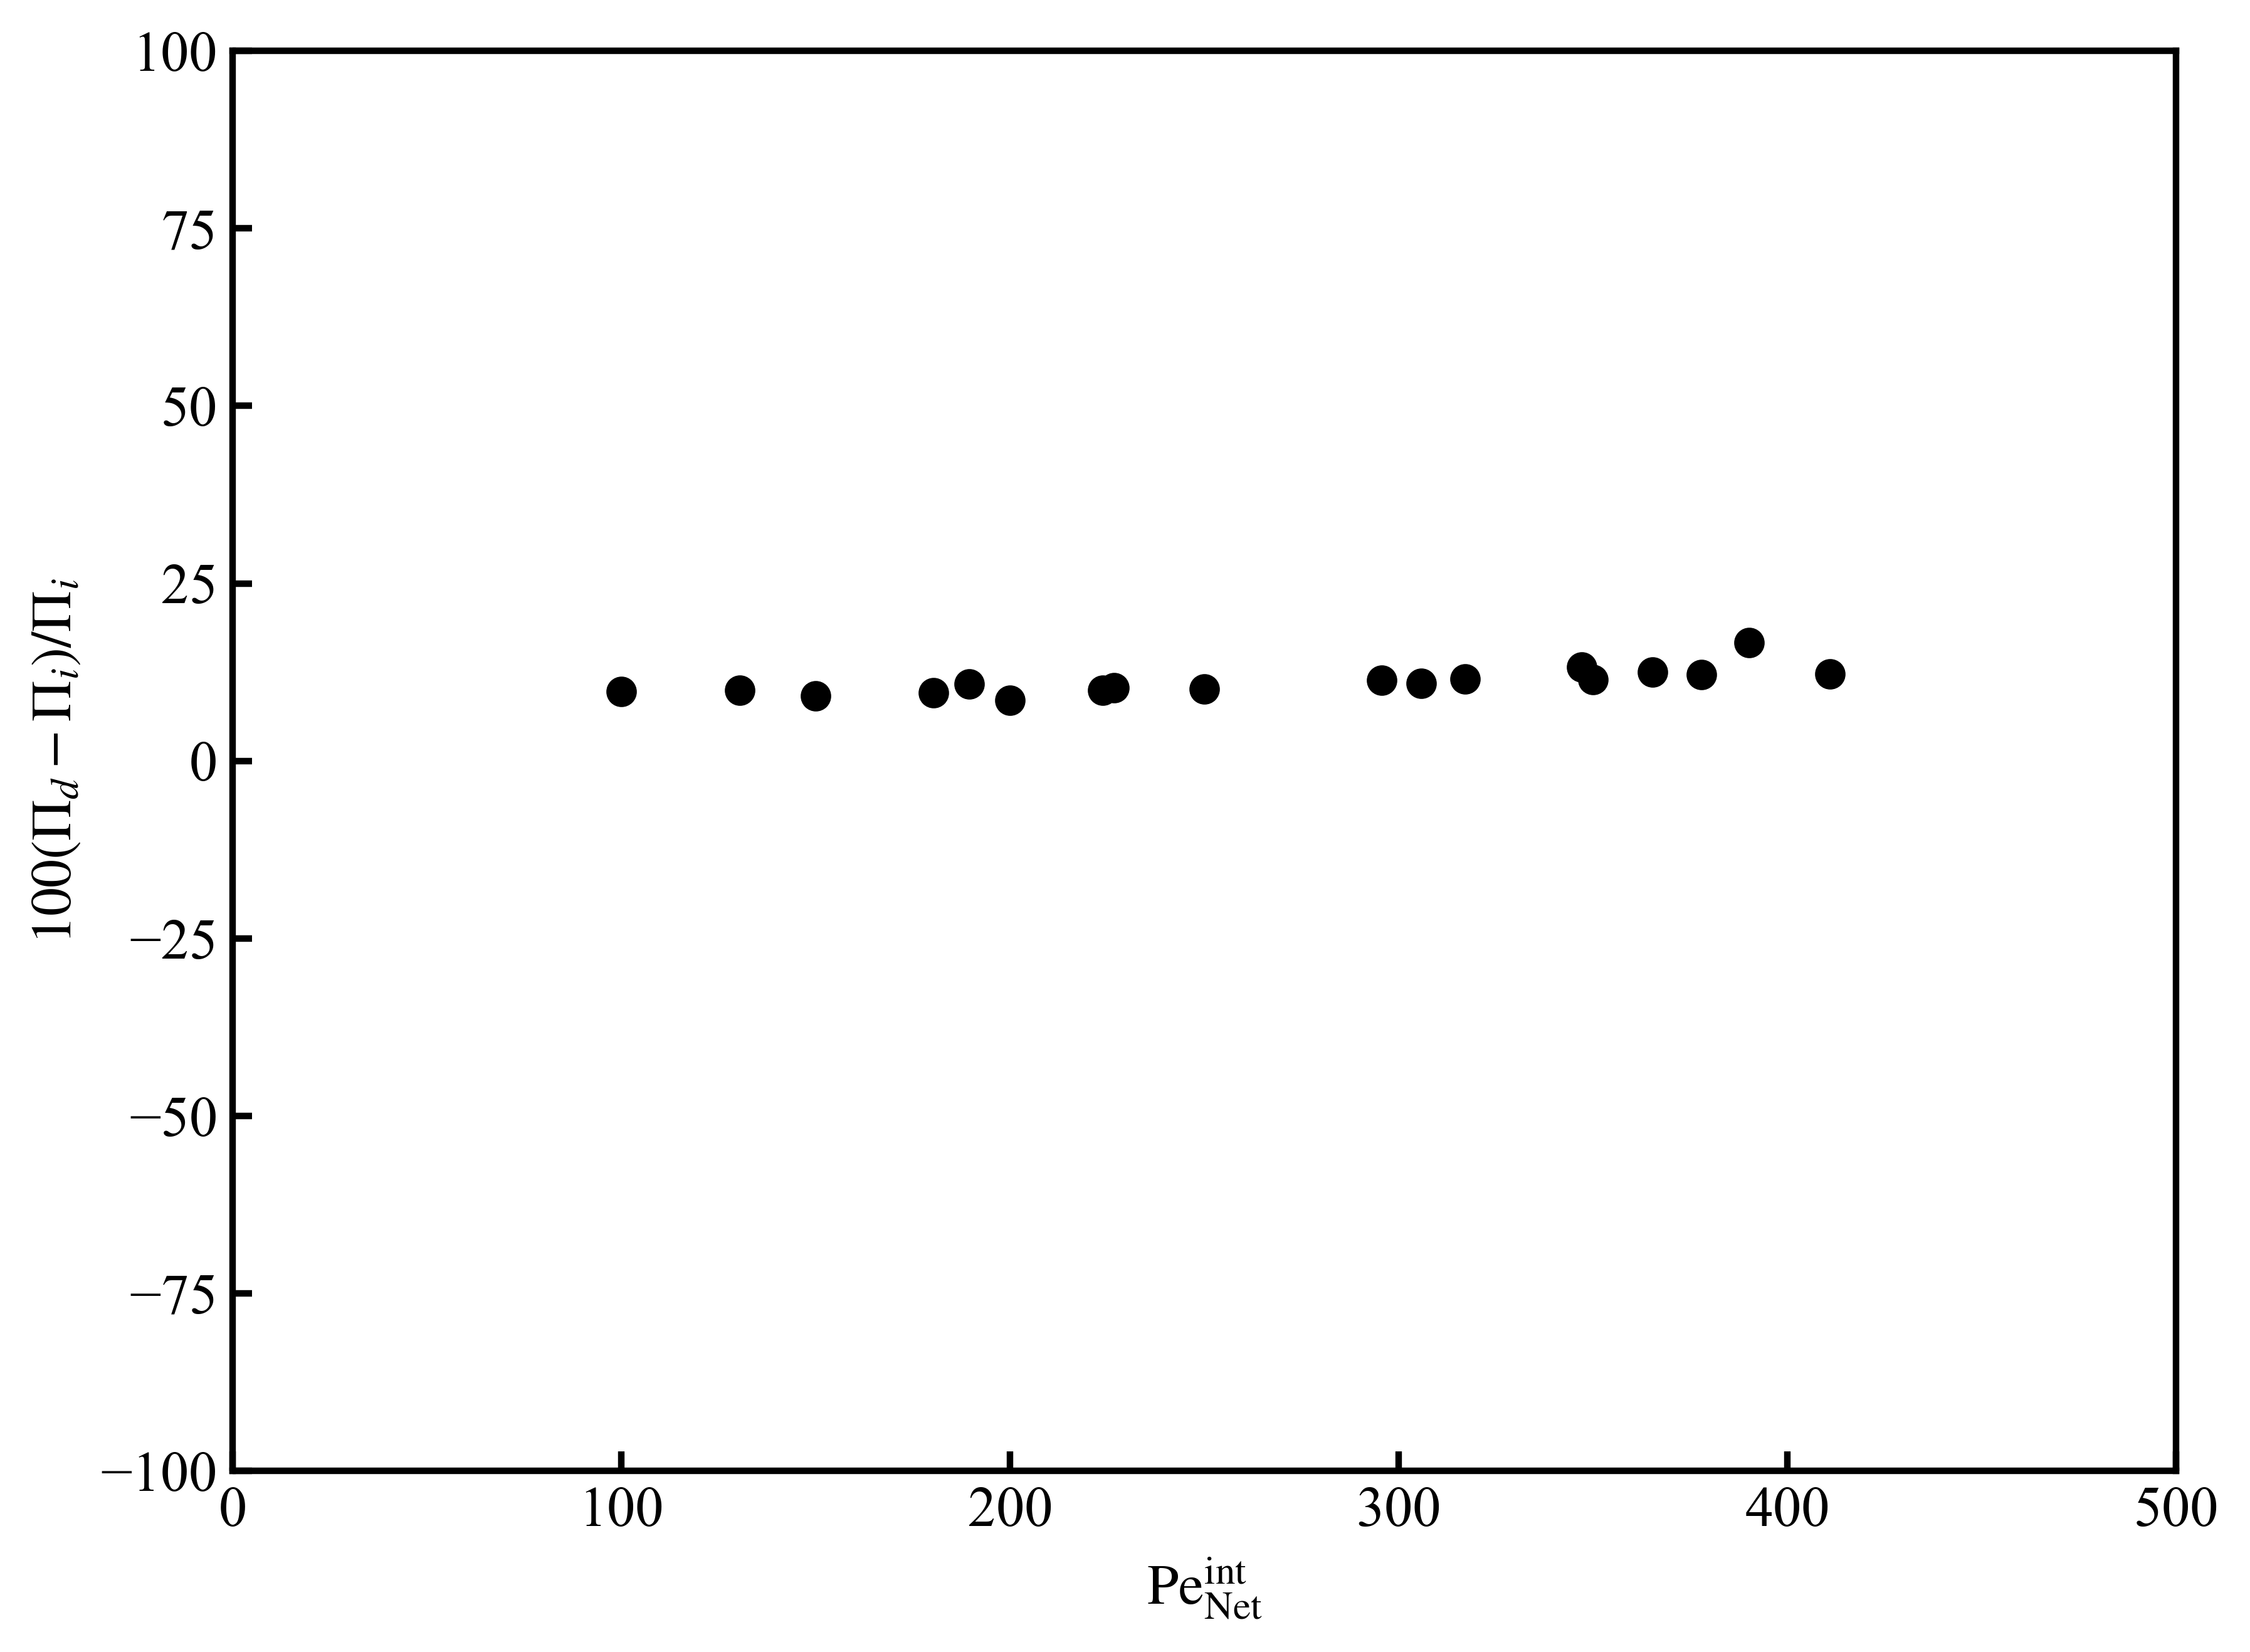

In [90]:
plt.figure(figsize=(8,6))
plt.scatter(interpart_peNet, interpart_press, c='blue', label='bulk interparticle')
plt.scatter(align_peNet, align_press_arr, c='red', label='aligned interface')
plt.scatter(interpart_peNet, avg_int_theory_arr, c='yellow', label='theory int')
plt.scatter(interpart_peNet, avg_bulk_theory_arr, c='green', label='theory bulk')
plt.ylabel(r'Pressure ($\Pi$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}$')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(int_pe_net, interpart_press, c='blue', label='bulk interparticle')
plt.scatter(int_pe_net, align_press_arr, c='red', label='aligned interface')
plt.scatter(int_pe_net, avg_int_theory_arr, c='yellow', label='theory int')
plt.scatter(int_pe_net, avg_bulk_theory_arr, c='green', label='theory bulk')
plt.ylabel(r'Pressure ($\Pi$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}$')
plt.legend()
plt.show()

import matplotlib
fig = plt.figure(figsize=(8,6))
im = plt.scatter(int_pe_net, interpart_press, c=pe_dif_arr, cmap='viridis', vmin=np.min(pe_dif_arr), vmax=np.max(pe_dif_arr))
norm= matplotlib.colors.Normalize(vmin=np.min(pe_dif_arr), vmax=np.max(pe_dif_arr))

sm = plt.cm.ScalarMappable(norm=norm, cmap = im.cmap)
sm.set_array([])
clb = fig.colorbar(sm)#ticks=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], ax=ax2)

clb.ax.set_title(r'$\mathrm{Pe}_\mathrm{F}-\mathrm{Pe}_\mathrm{S}$', fontsize=15)
plt.xlim(0, 500)
plt.ylim(0, 3500)
plt.ylabel(r'Pressure ($\Pi_\mathrm{d}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}^\mathrm{int}$')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
im = plt.scatter(int_pe_net, align_press_arr, c=pe_dif_arr, cmap='viridis', vmin=np.min(pe_dif_arr), vmax=np.max(pe_dif_arr))
norm= matplotlib.colors.Normalize(vmin=np.min(pe_dif_arr), vmax=np.max(pe_dif_arr))
sm = plt.cm.ScalarMappable(norm=norm, cmap = im.cmap)
sm.set_array([])
clb = fig.colorbar(sm)#ticks=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], ax=ax2)

clb.ax.set_title(r'$\mathrm{Pe}_\mathrm{F}-\mathrm{Pe}_\mathrm{S}$', fontsize=15)
            
plt.xlim(0, 500)
plt.ylim(0, 3500)

#plt.ylim(0, l_box)
#plt.axis('off')
plt.ylabel(r'Pressure ($\Pi_\mathrm{int}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}^\mathrm{int}$')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
im = plt.scatter(int_pe_net, ((align_press_arr-interpart_press)/interpart_press)*100, c='black')
 
plt.xlim(0, 500)
plt.ylim(-100, 100)

#plt.ylim(0, l_box)
#plt.axis('off')
plt.ylabel(r'$100(\Pi_d - \Pi_i)/\Pi_i$')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}^\mathrm{int}$')

# Make a simulation vs theory legend
leg_three = [Line2D([0], [0], lw=med*1.8, c='k', markeredgecolor='none', label=r'Eq. 6', markerfacecolor='none', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=med*1.8, c='k', markeredgecolor='none', label=r'Eq. 7', markerfacecolor='none', markersize=msz, ls='dotted')]

two_leg = ax[0].legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax[0].transAxes, bbox_to_anchor=[1.0, 1.03],
             fontsize=fsize*3.2, frameon=False, ncol=1)
ax[0].add_artist(two_leg)

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.scatter(int_pe_net, ((interpart_press-avg_bulk_theory_arr)/avg_bulk_theory_arr)*100, c=green, label='bulk')
plt.scatter(int_pe_net, ((align_press_arr-avg_int_theory_arr)/avg_int_theory_arr)*100, c=yellow, label='interface')

plt.xlim(0, 500)
plt.ylim(-100, 100)

#plt.ylim(0, l_box)
#plt.axis('off')
plt.ylabel(r'$100(\Pi_\mathrm{sim} - \Pi_\mathrm{theory})/\Pi_\mathrm{theory}$')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}^\mathrm{int}$')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()